# Coffee Chain Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import distribution_plots, heatmap_plots, horizontal_bar_plots, monthly_averages_plots

<Figure size 3600x1800 with 0 Axes>

## Data Loading and Preparation

In [2]:
chain_df=pd.read_csv('chain_data.zip', compression='zip')
chain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

In [3]:
chain_df.head()

Area Code  Cogs  DifferenceBetweenActualandTargetProfit       Date  \
0        303    51                                     -35  10/1/2012   
1        970    52                                     -24  10/1/2012   
2        409    43                                     -22  10/2/2012   
3        850    38                                     -15  10/3/2012   
4        562    72                                       6  10/4/2012   

   Inventory Margin  Margin   Market_size   Market  Marketing Product_line  \
0               503      71  Major Market  Central         46       Leaves   
1               405      71  Major Market  Central         17       Leaves   
2               419      64  Major Market    South         13       Leaves   
3               871      56  Major Market     East         10       Leaves   
4               650     110  Major Market     West         23       Leaves   

   ...     Product Profit  Sales       State Target_cogs  Target_margin  \
0  ...       Lemon     -5    122    Colorado          30             60   
1  ...        Mint     26    123    Colorado          30             60   
2  ...       Lemon     28    107       Texas          30             60   
3  ...  Darjeeling     35     94     Florida          40             60   
4  ...   Green Tea     56    182  California          20             60   

   Target_profit  Target_sales   Total_expenses     Type  
0             30             90              76    Decaf  
1             50             90              45    Decaf  
2             50             90              36    Decaf  
3             50            100              21  Regular  
4             50             80              54  Regular  

[5 rows x 21 columns]

In [4]:
# Check for duplicates
chain_df.duplicated().sum()

0

In [5]:
# create a copy of the data so as not to corrupt the original
data=chain_df.copy()

### Column Categories

#### 1. Identificatin Columns
- Area Code
- Date
- State

#### 2. Sales and Revenue Metrics
- Cogs
- Profit
- Sales
- Inventory Margin
- Margin 

#### 3. Target Metrics
- Target_cogs
- Target_profit
- Target_sales
- Target_margin

#### 4. Marketing and Product Information
- Market_size
- Market
- Marketing 
- Product_line
- Product_type
- Product

#### 5. Expense and Cost Metrics
- Total_expense
- DifferenceBetweenActualandTargetProfit

#### 6. Type Information
- Type

### Prepare the data 

In [6]:
# Change the column names
data.columns = data.columns.str.lower()

# convert Date object to datetime
data=data.assign(
    date=lambda x: pd.to_datetime(x.date)
)

# add a month column
data=data.assign(
    month=lambda x: x.date.dt.strftime('%Y-%m'),
    revenue= lambda x: x.cogs+x.profit 
)
data=data.set_index('date')
data=data.loc[(data.index >= '2013-01-01') & (data.index <= '2014-12-31')]

## Exploratory Data Analysis 

#### (1). Sales and Profit Analysis

##### (a). Sales

In [30]:
# Total Sales
print(f'{data.sales.sum():,.2f}')

123,880.00


In [31]:
print(data[['sales']].describe().T)

       count       mean         std   min    25%    50%     75%    max
sales  730.0  169.69863  134.170273  23.0  87.25  128.0  197.75  815.0


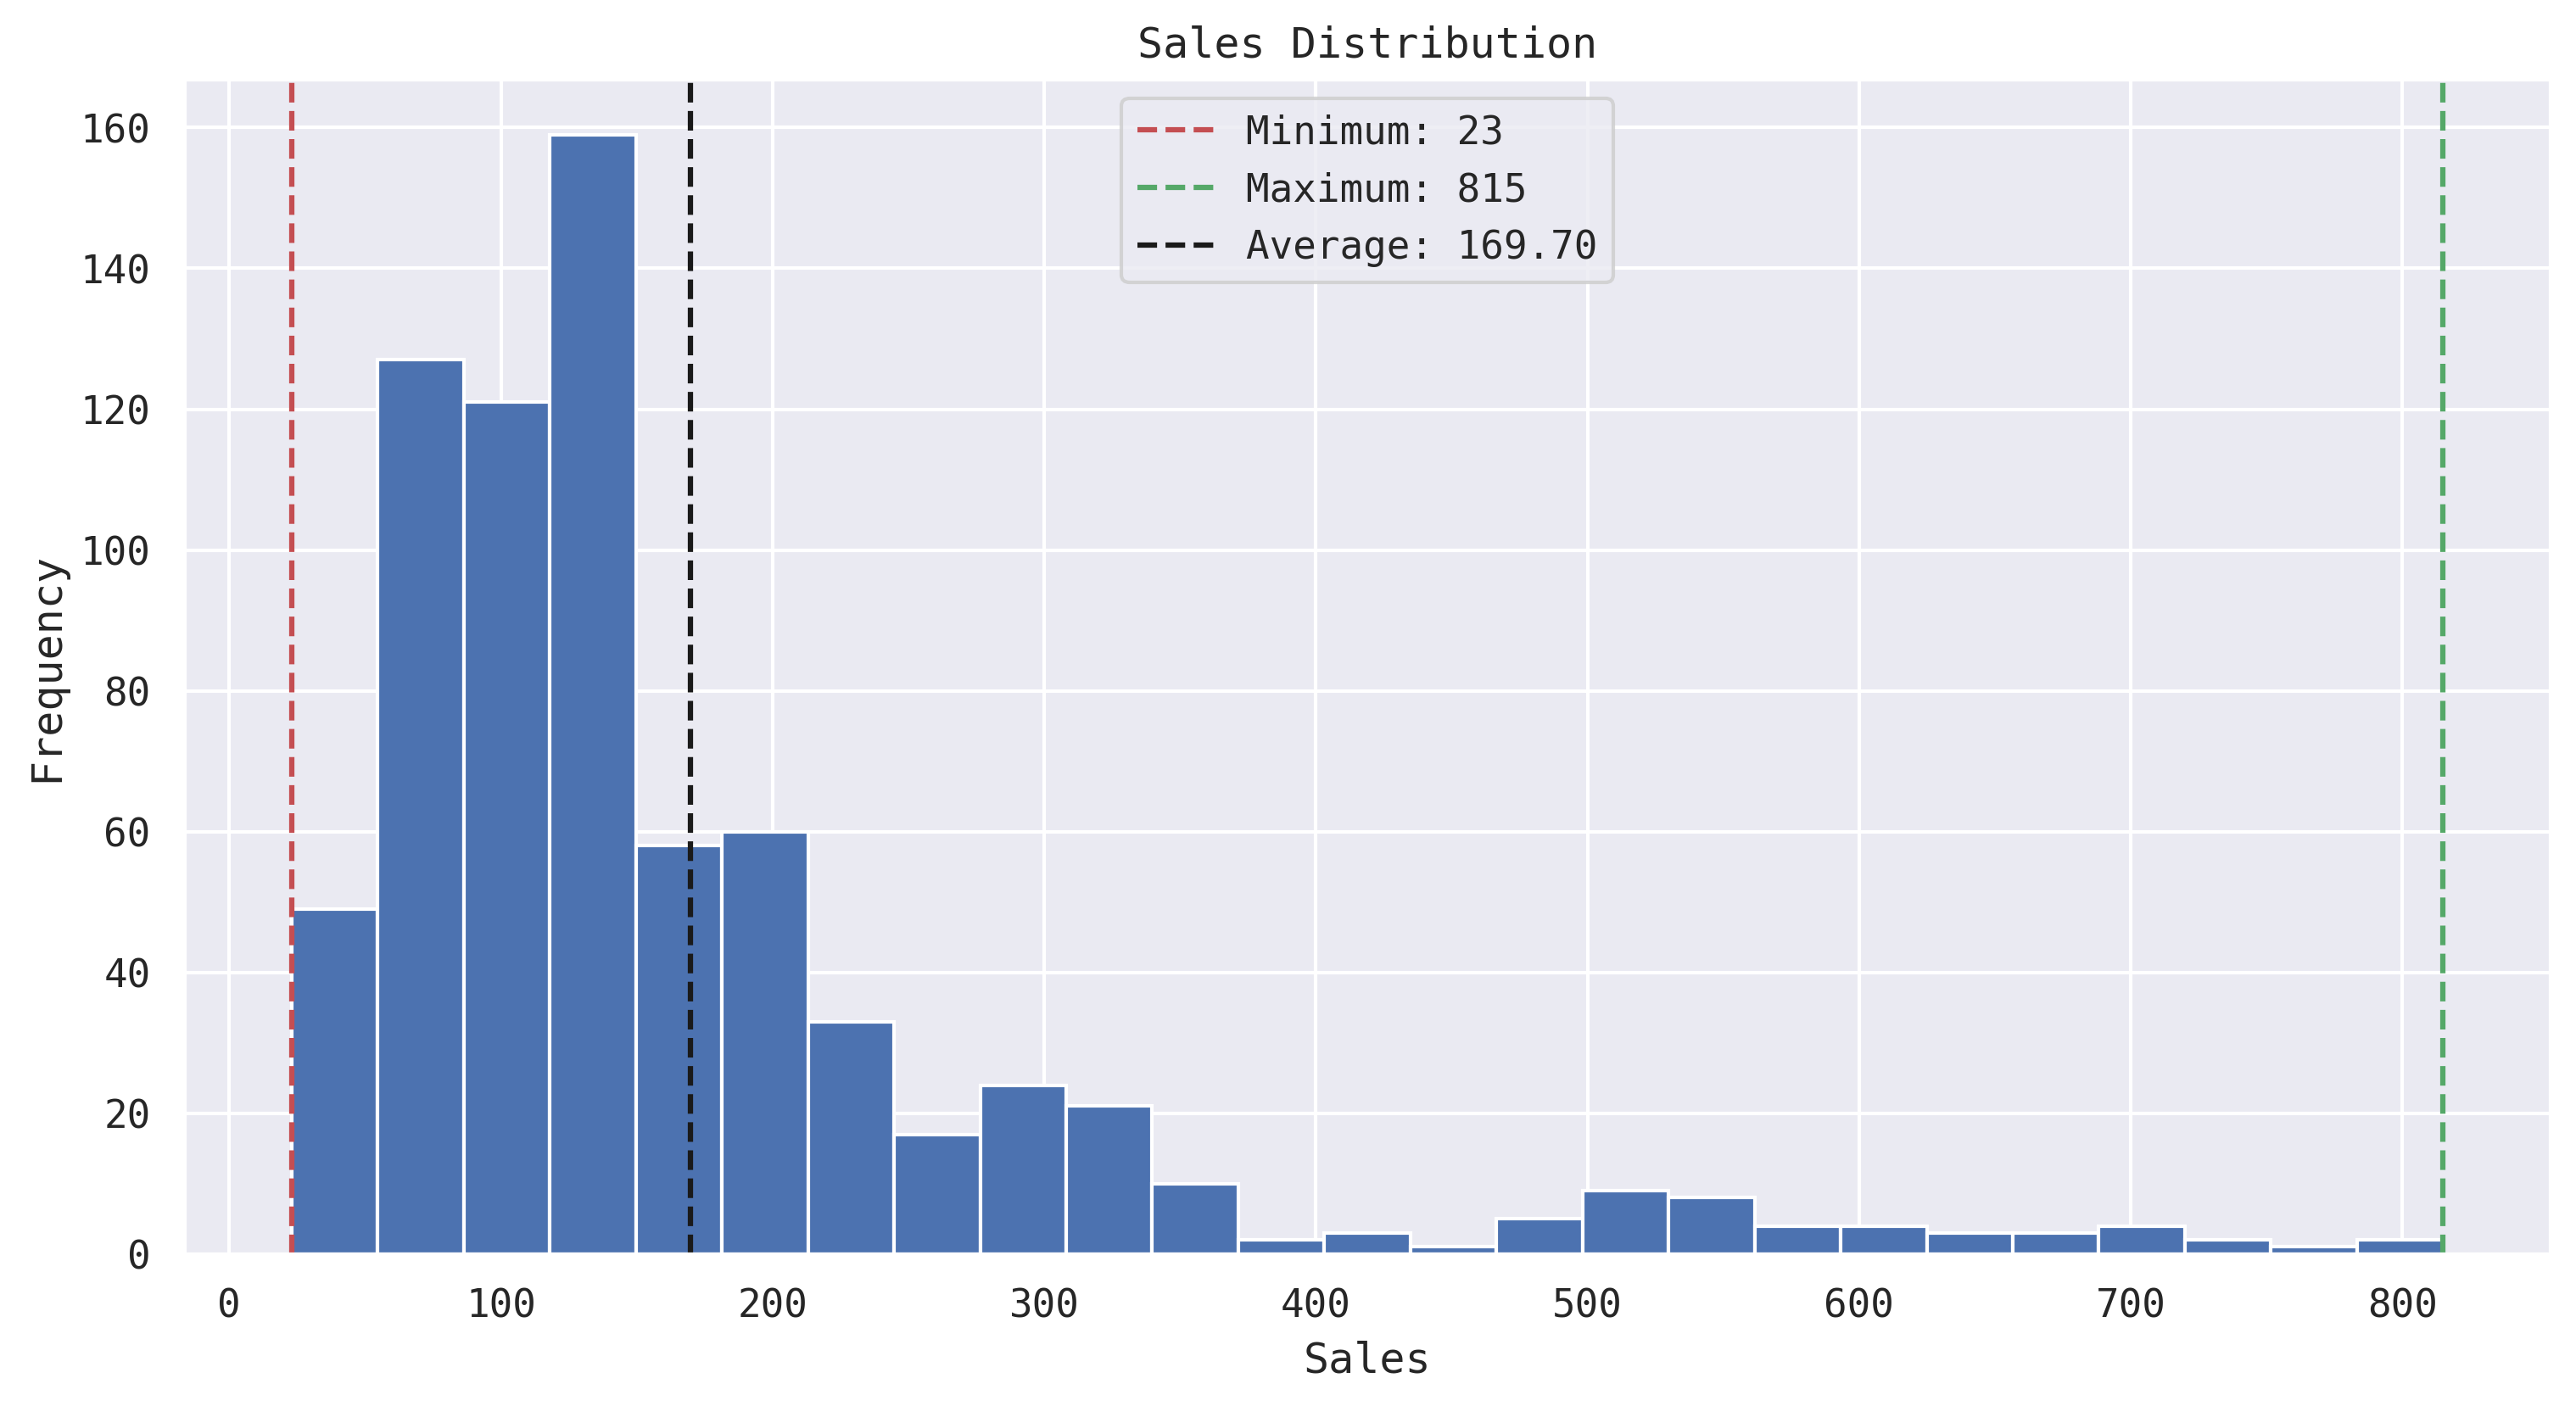

In [7]:
# sales distribution
distribution_plots(data['sales'],'Sales Distribution','Sales','Frequency',bins=25)

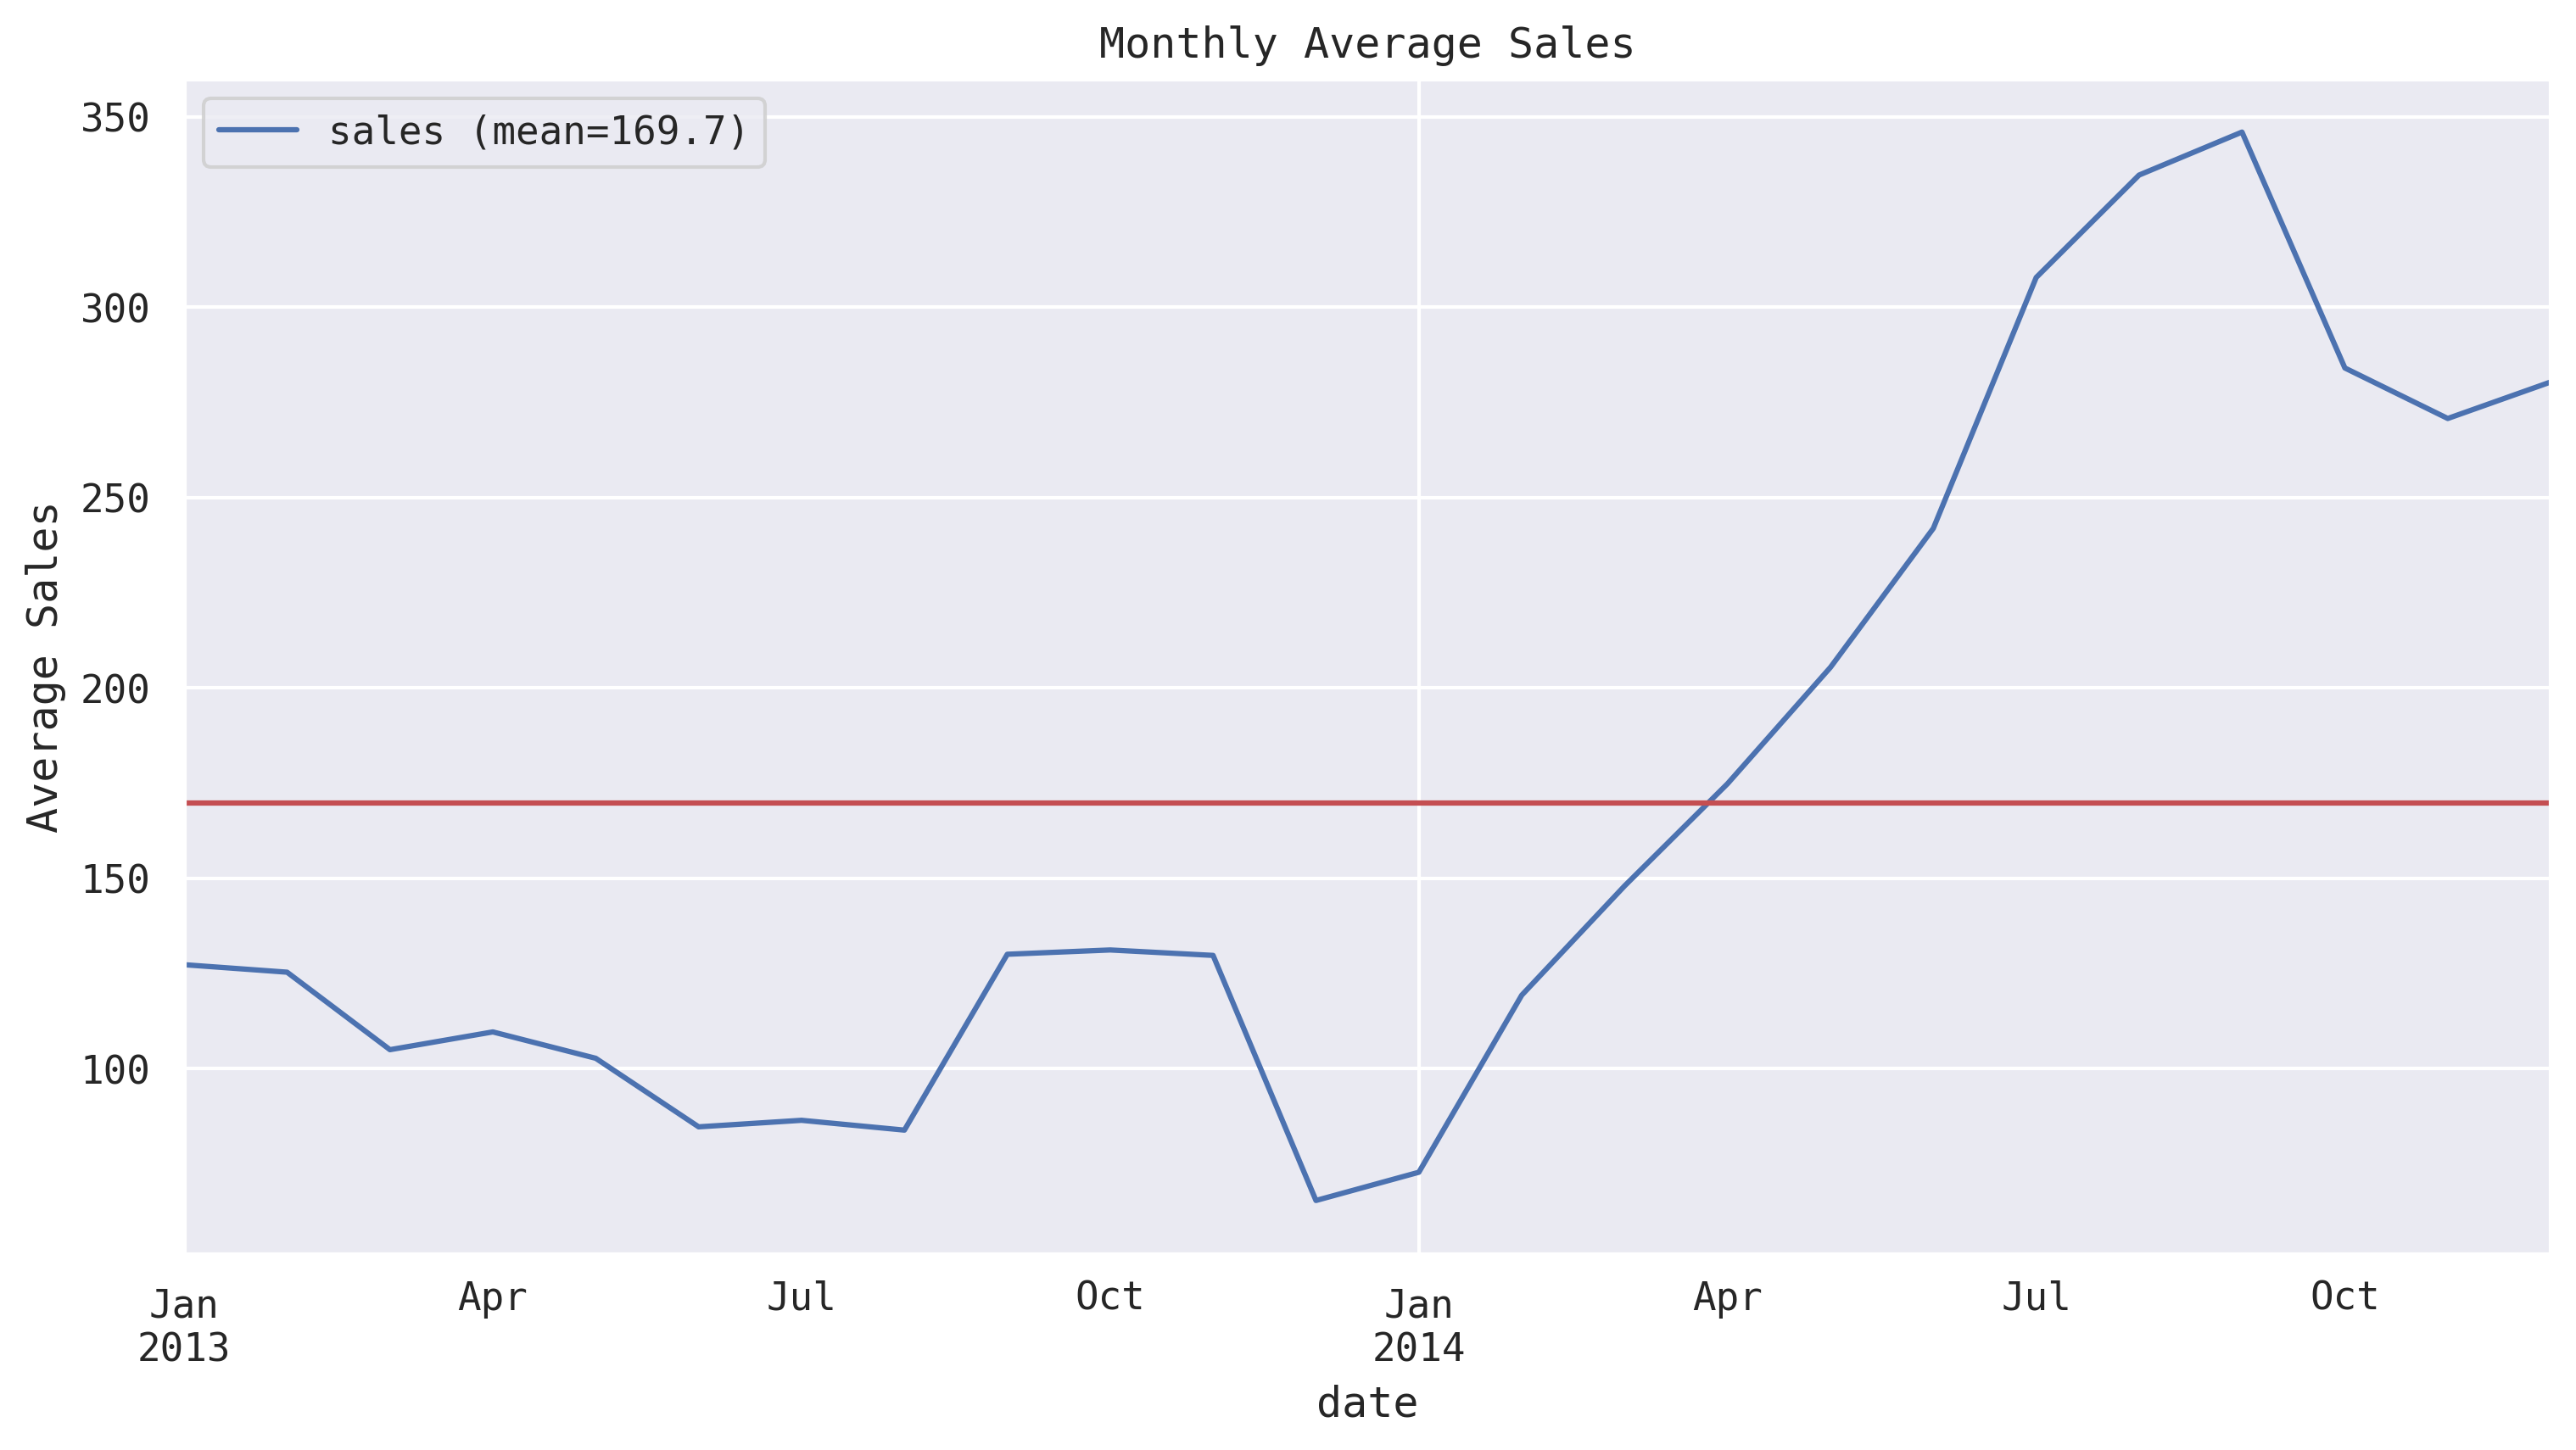

In [8]:
# Monthly Average Sales
monthly_averages_plots(data,'sales','Average Sales','Monthly Average Sales')

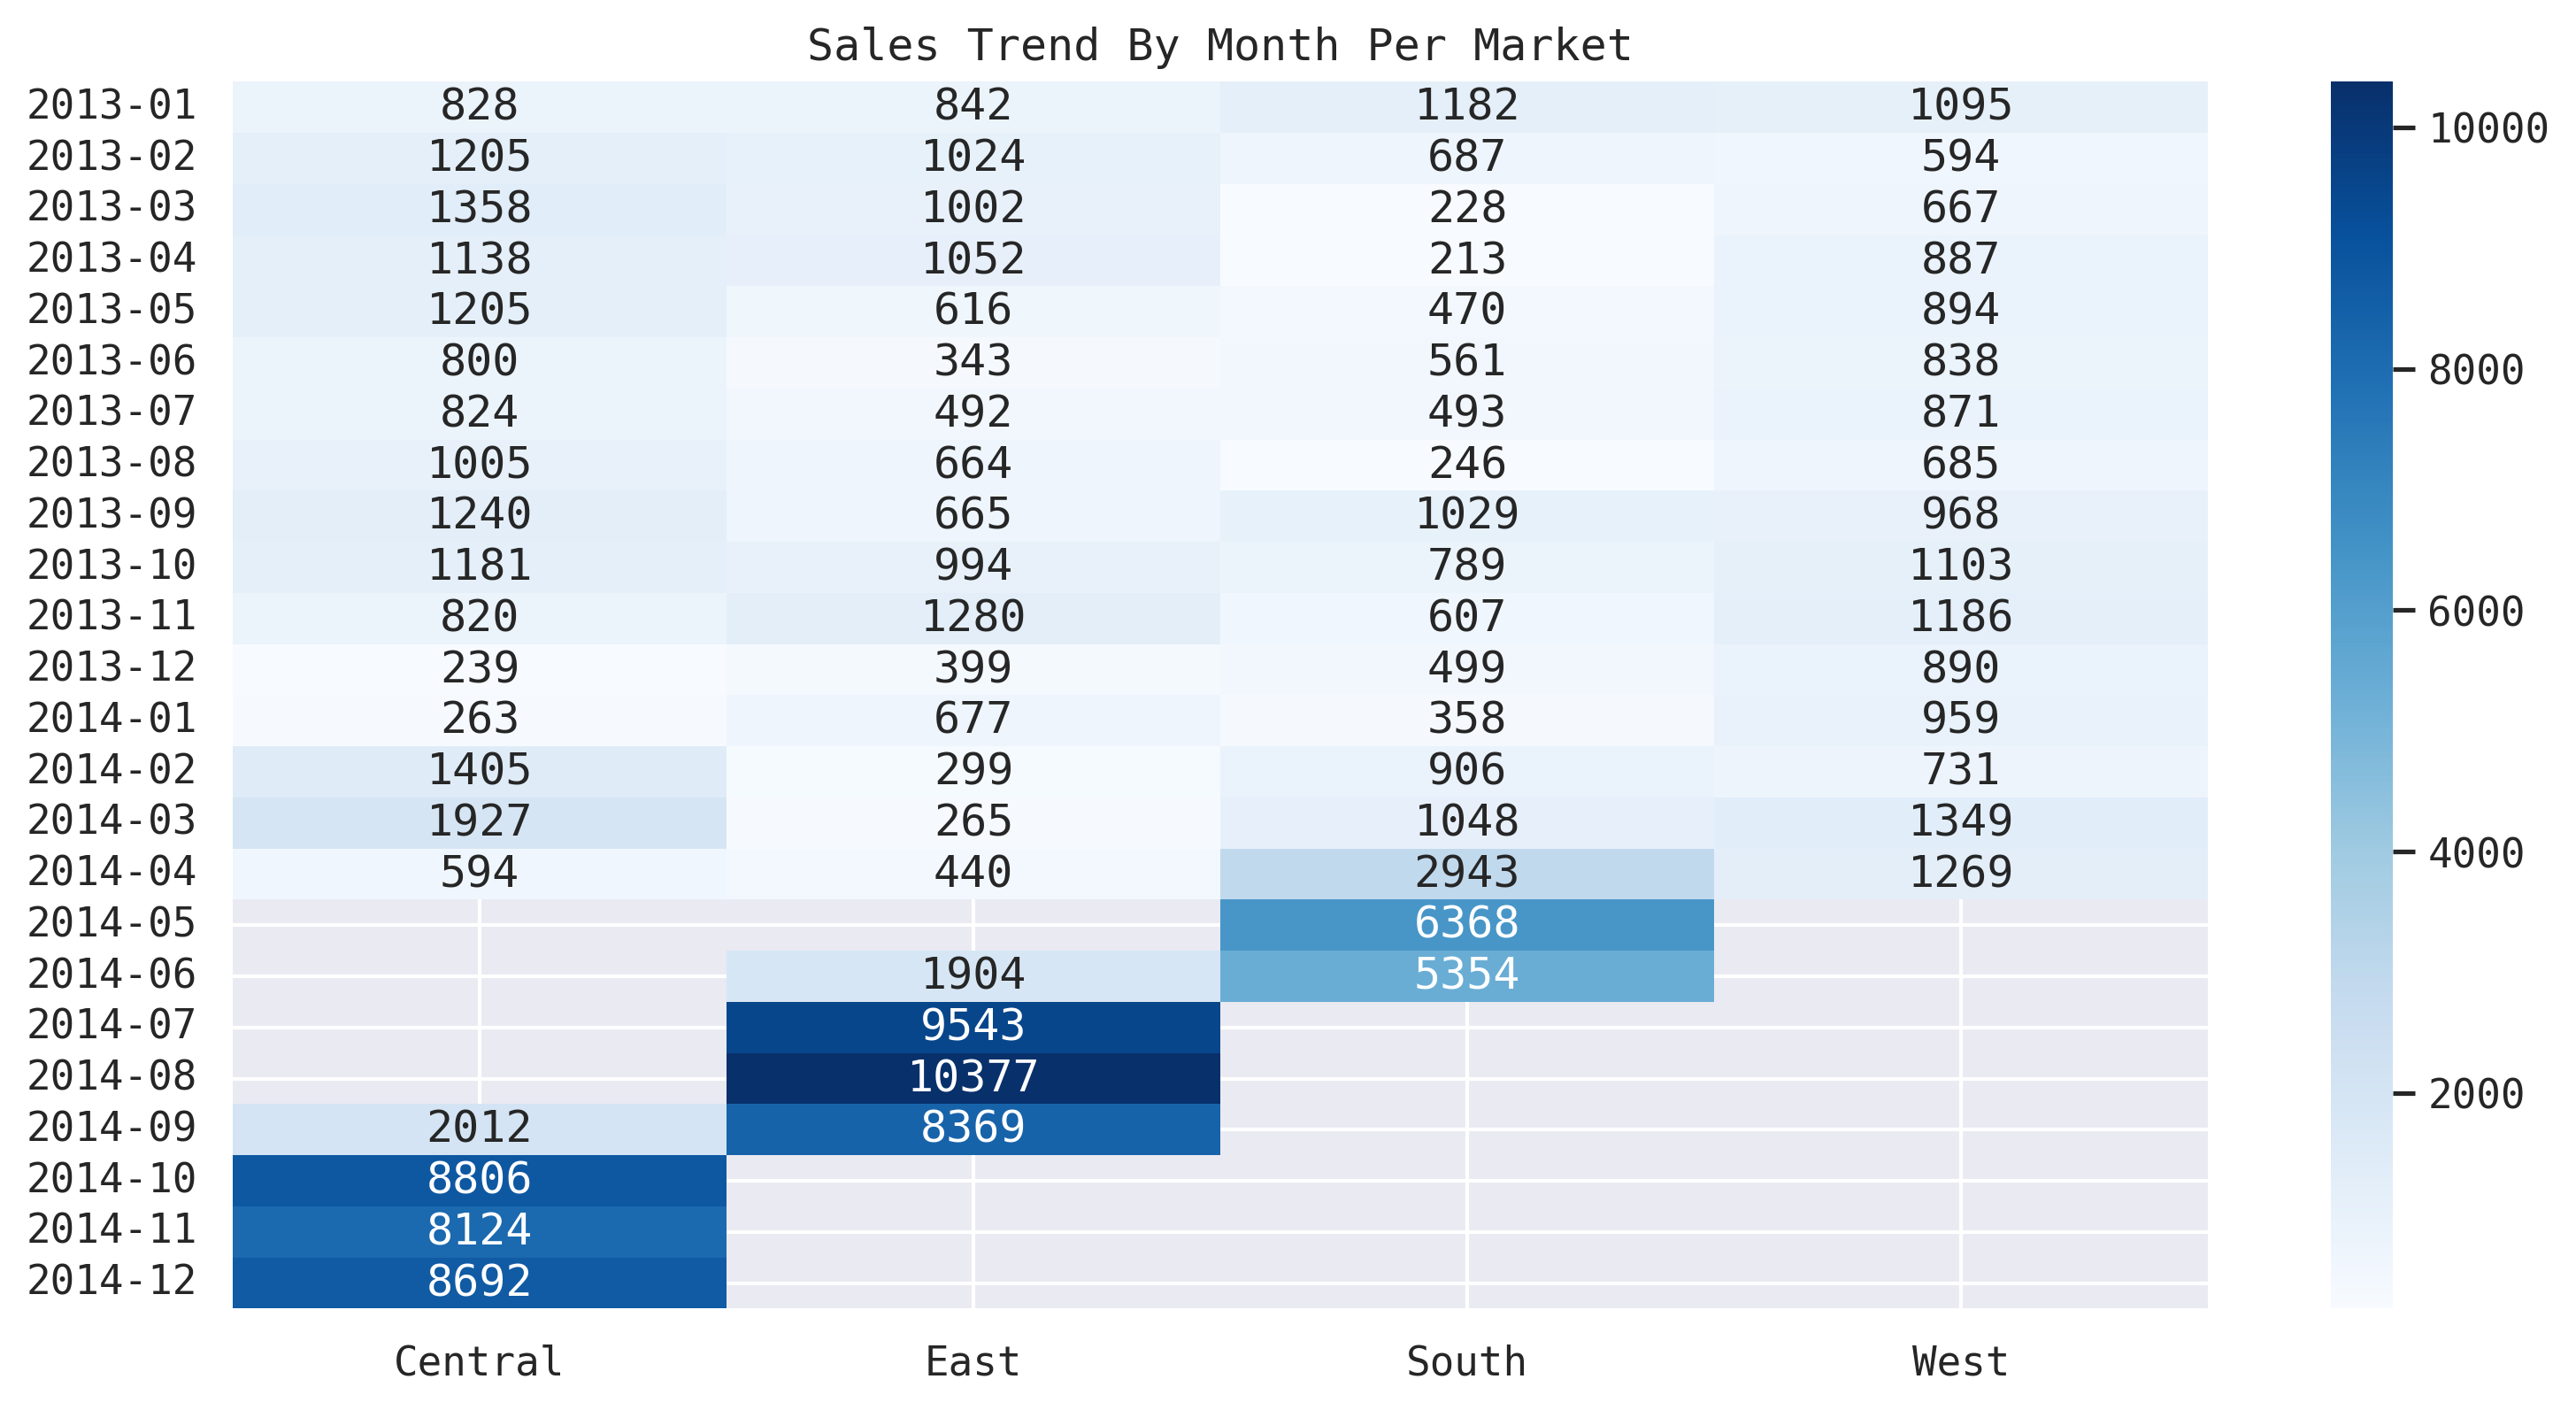

In [9]:
# Sales Trend by Market
heatmap_plots(data,'month','market','sales','sum','Sales Trend By Month Per Market')

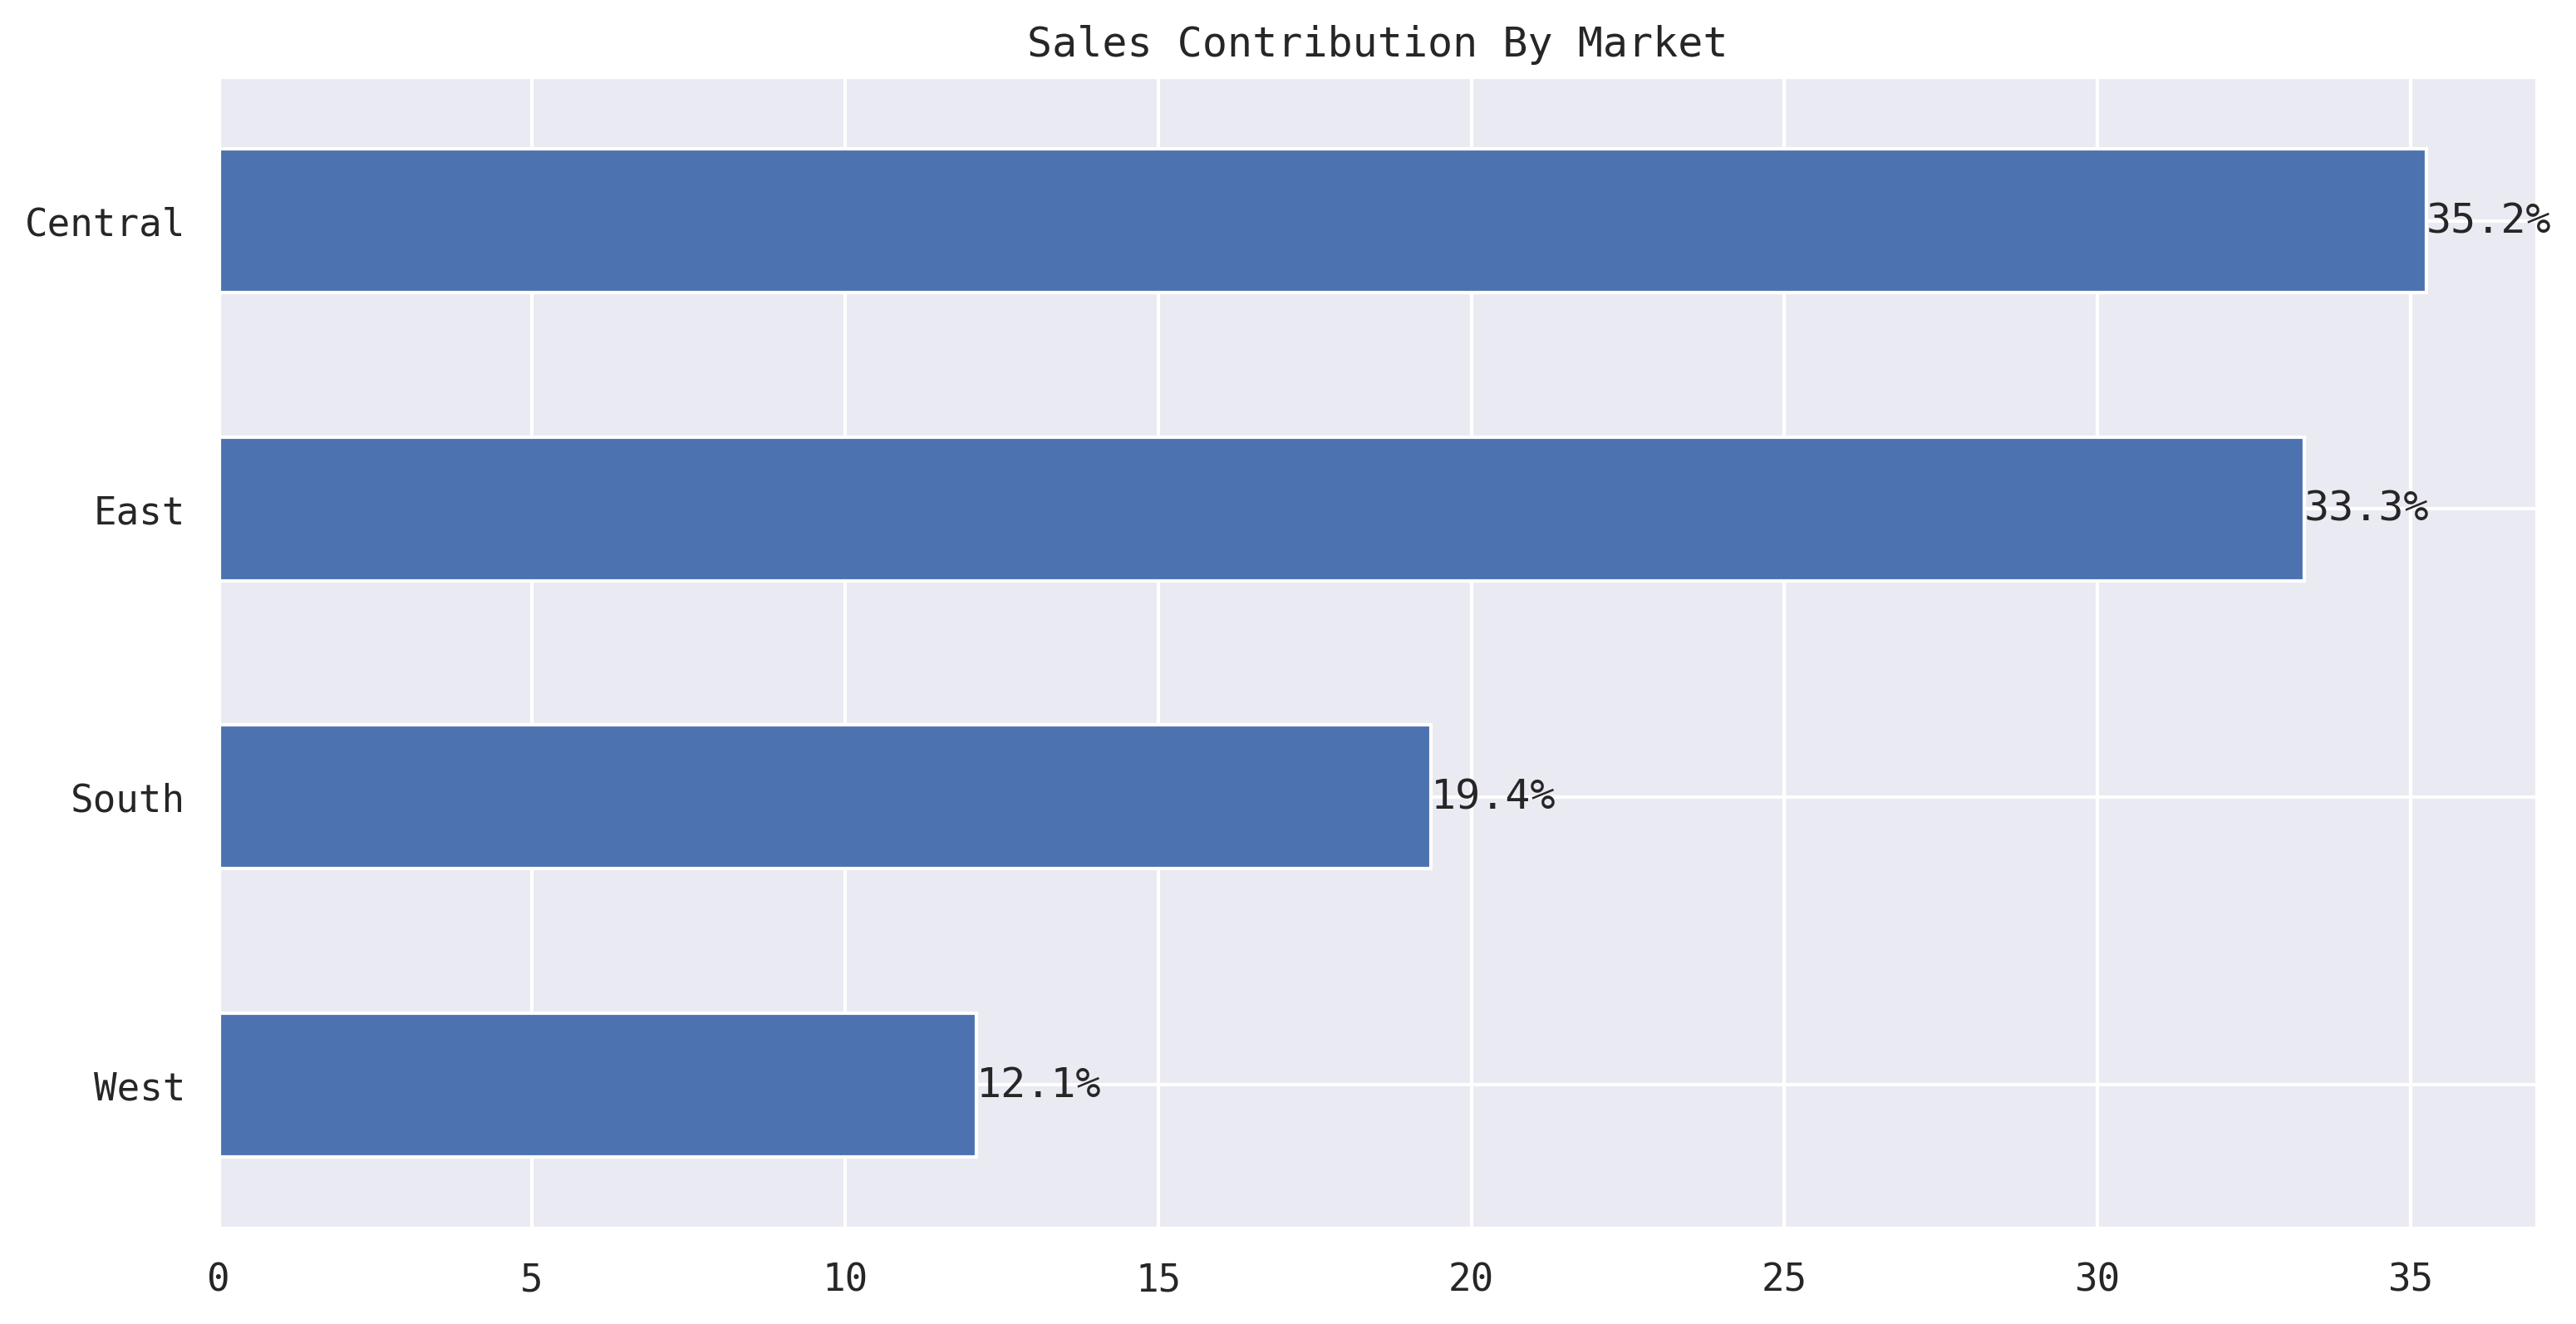

In [10]:
# Sales contribution by Market
horizontal_bar_plots(data,'market','sales','Sales Contribution By Market')

##### (b). Profit 

In [35]:
print(f'{data.profit.sum():,.2f}')

39,864.00


In [34]:
print(data[['profit']].describe().T)

        count       mean        std    min   25%   50%    75%    max
profit  730.0  54.608219  88.748716 -332.0  15.0  36.0  71.75  646.0


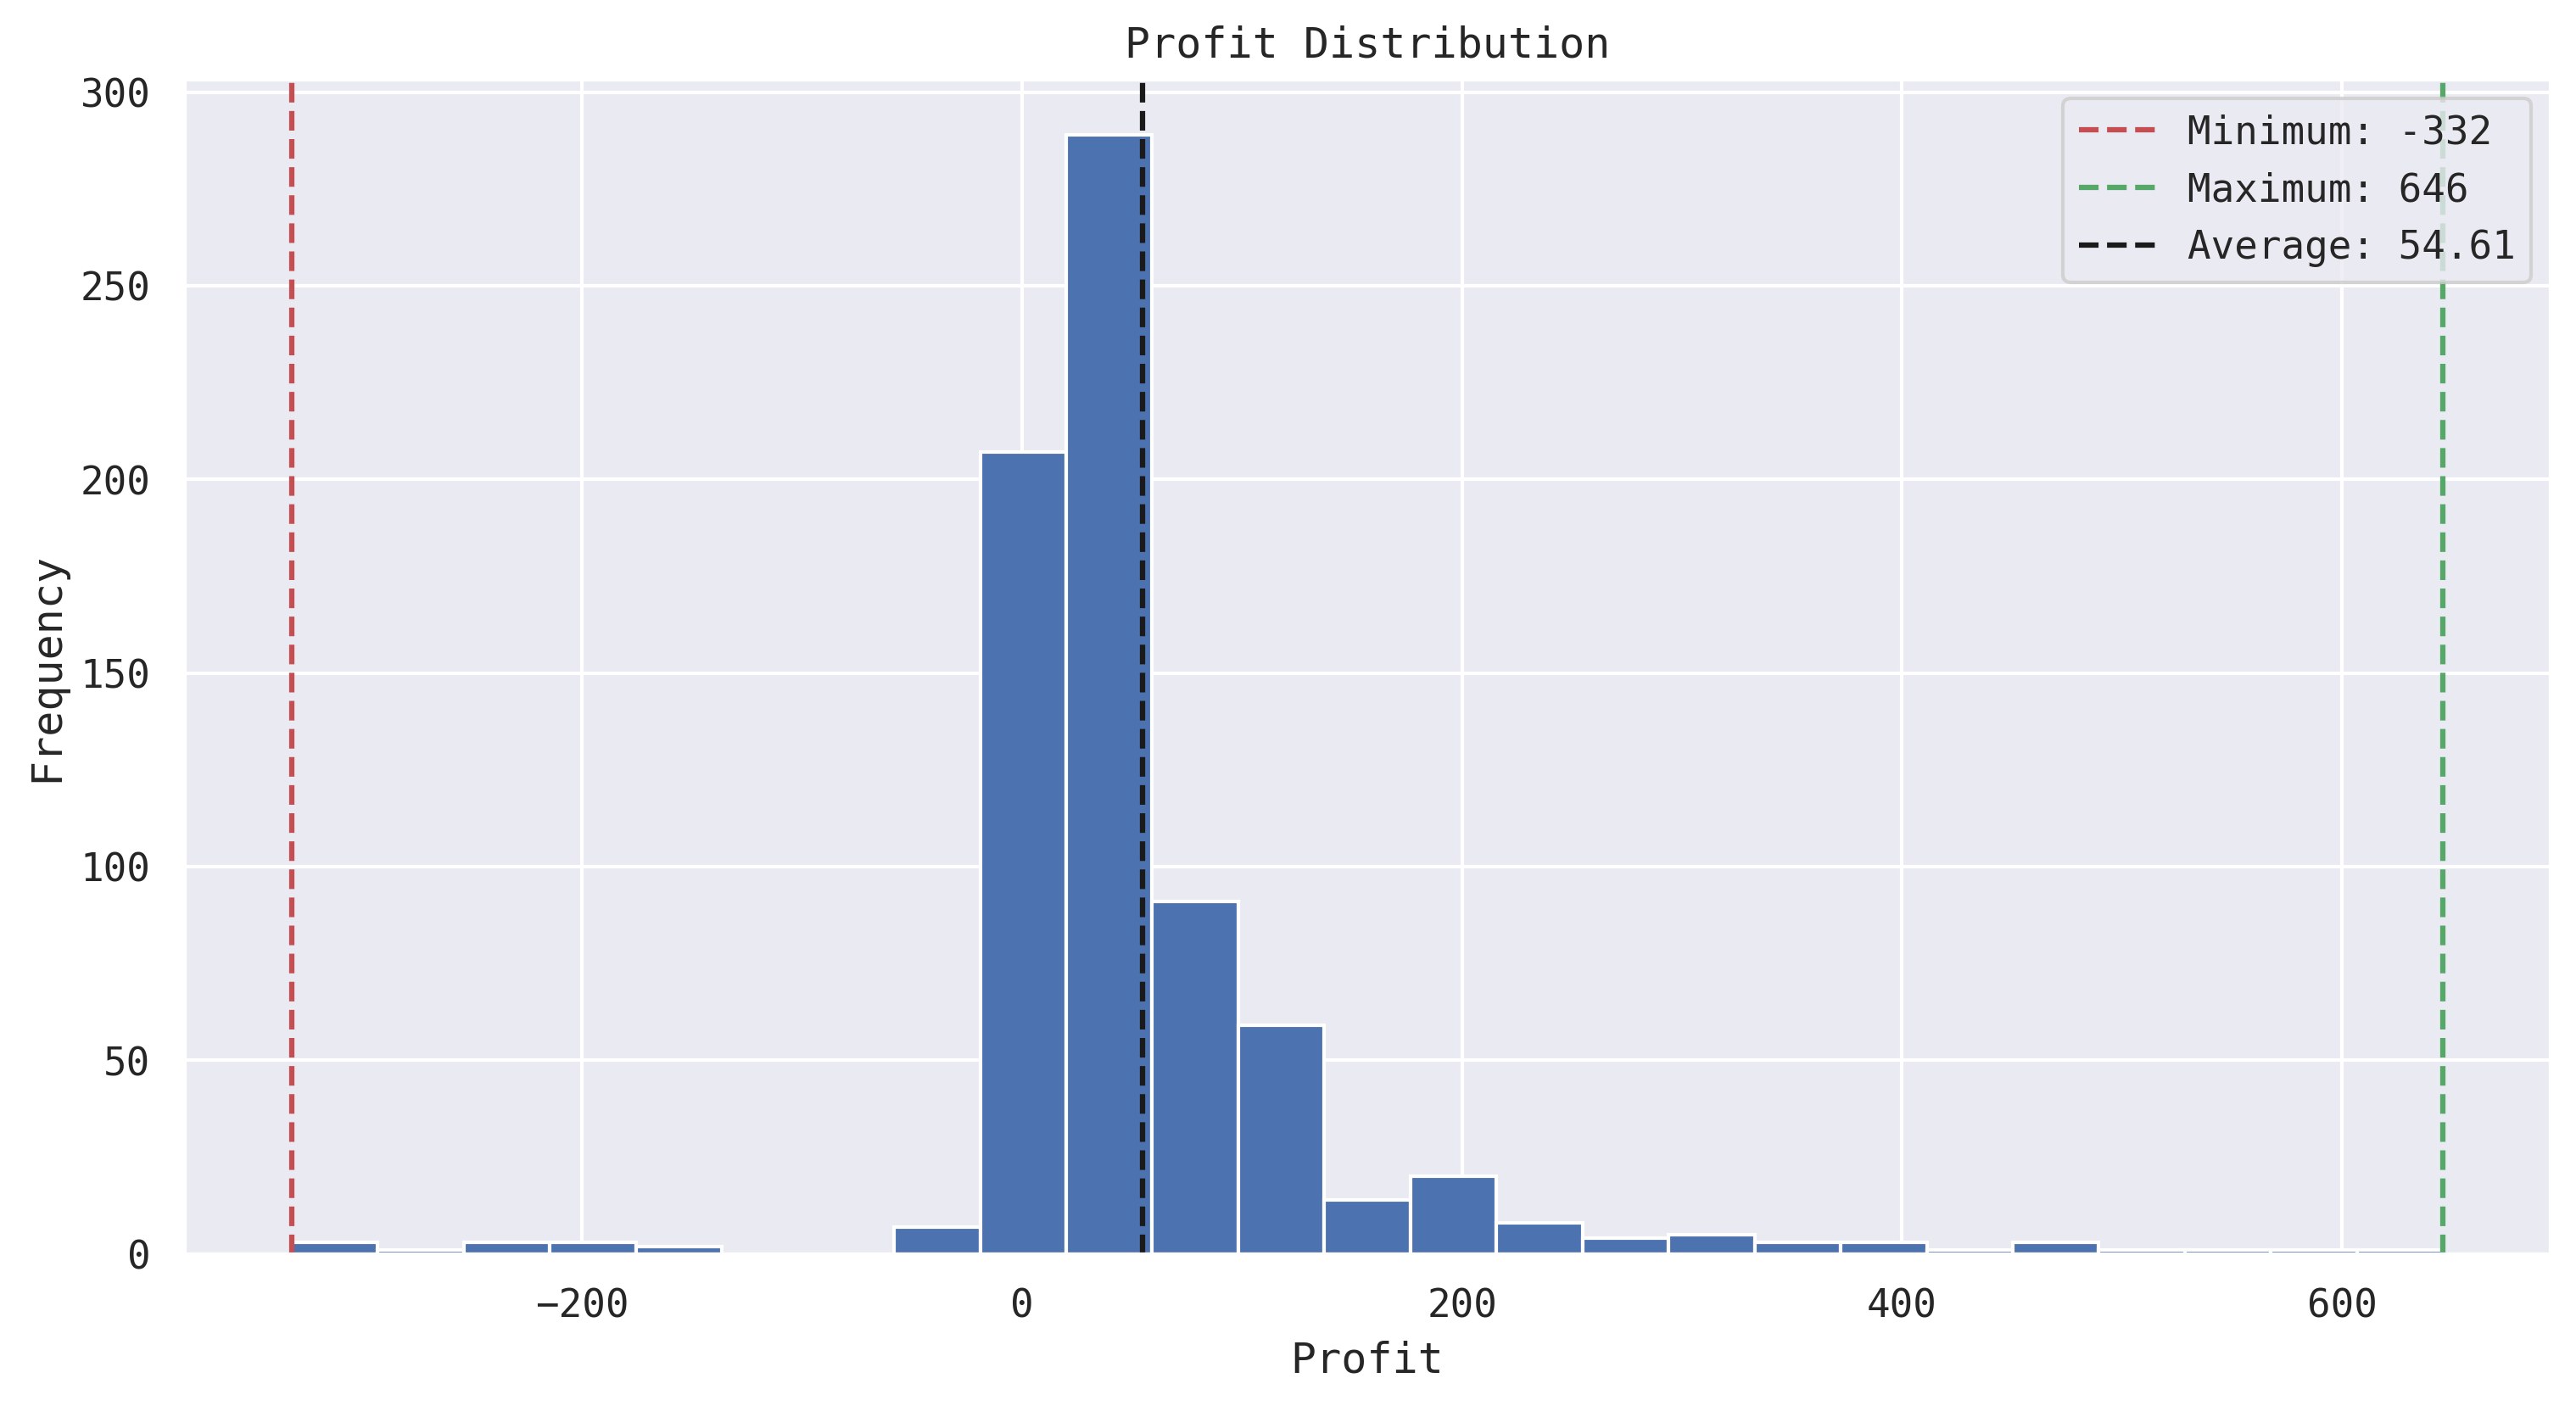

In [11]:
# Profit Distribution
distribution_plots(data['profit'],'Profit Distribution','Profit','Frequency',bins=25)

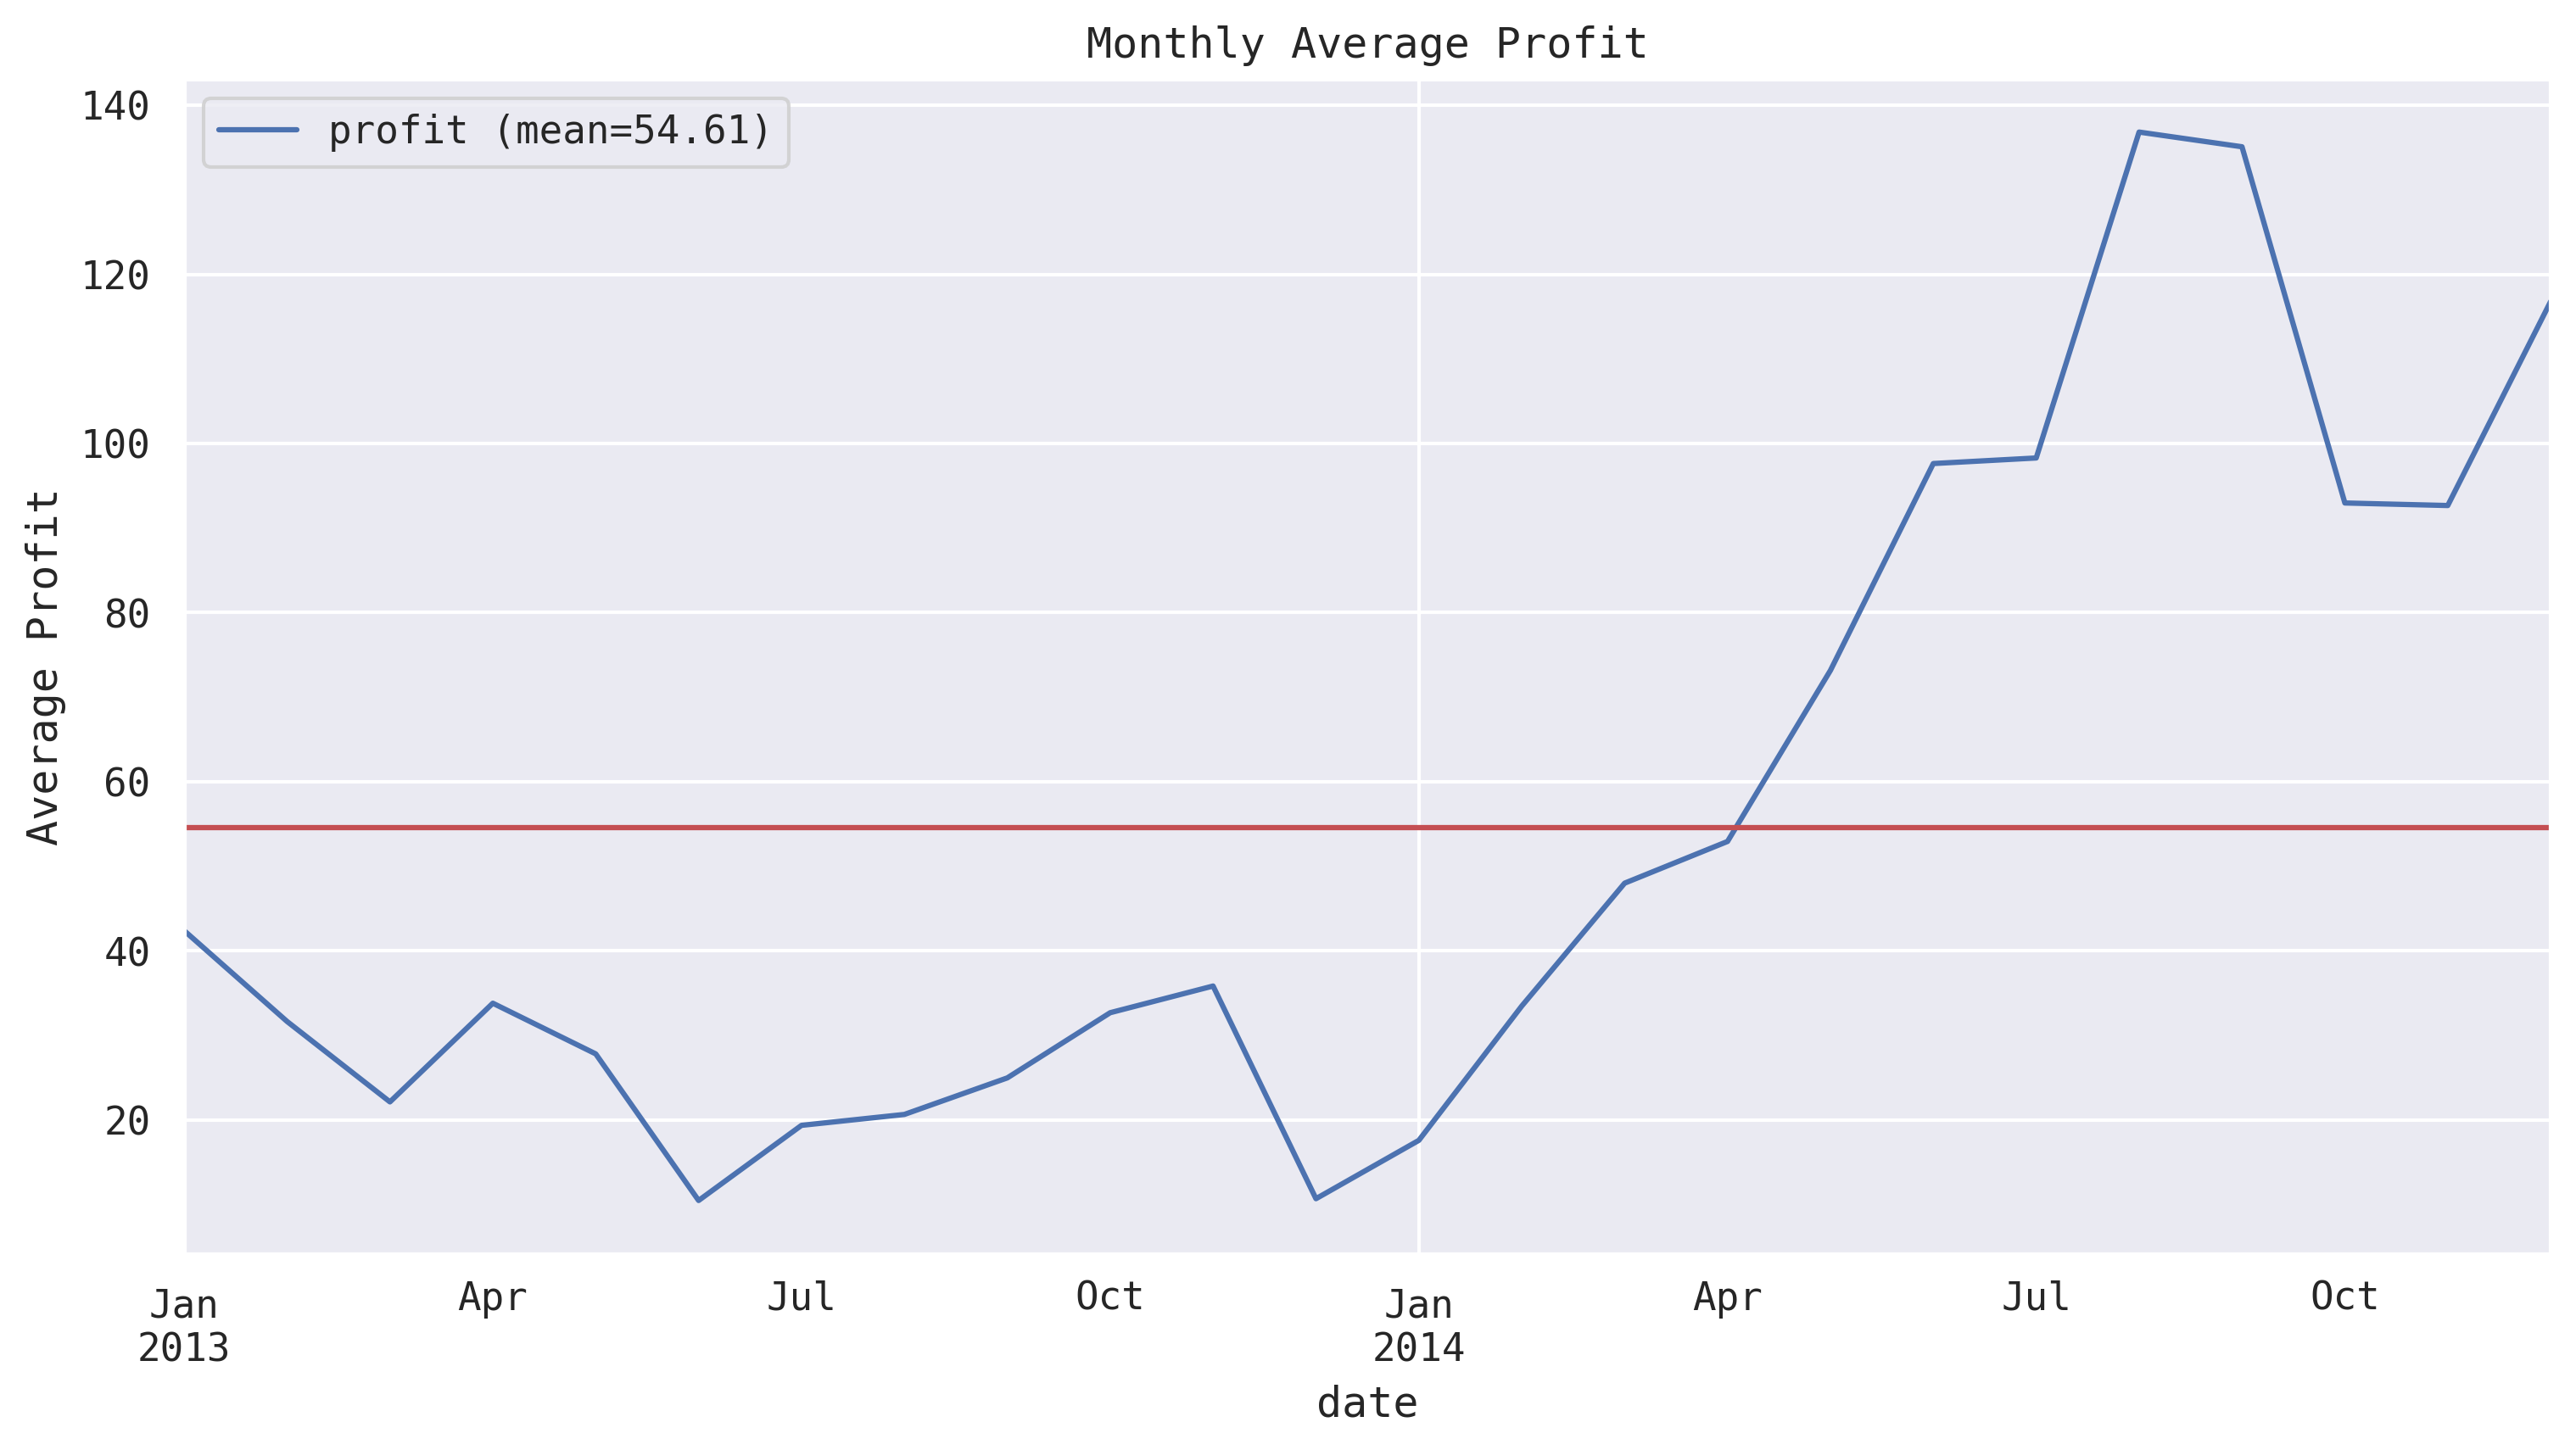

In [12]:
# Monthly average profits
monthly_averages_plots(data,'profit','Average Profit','Monthly Average Profit')

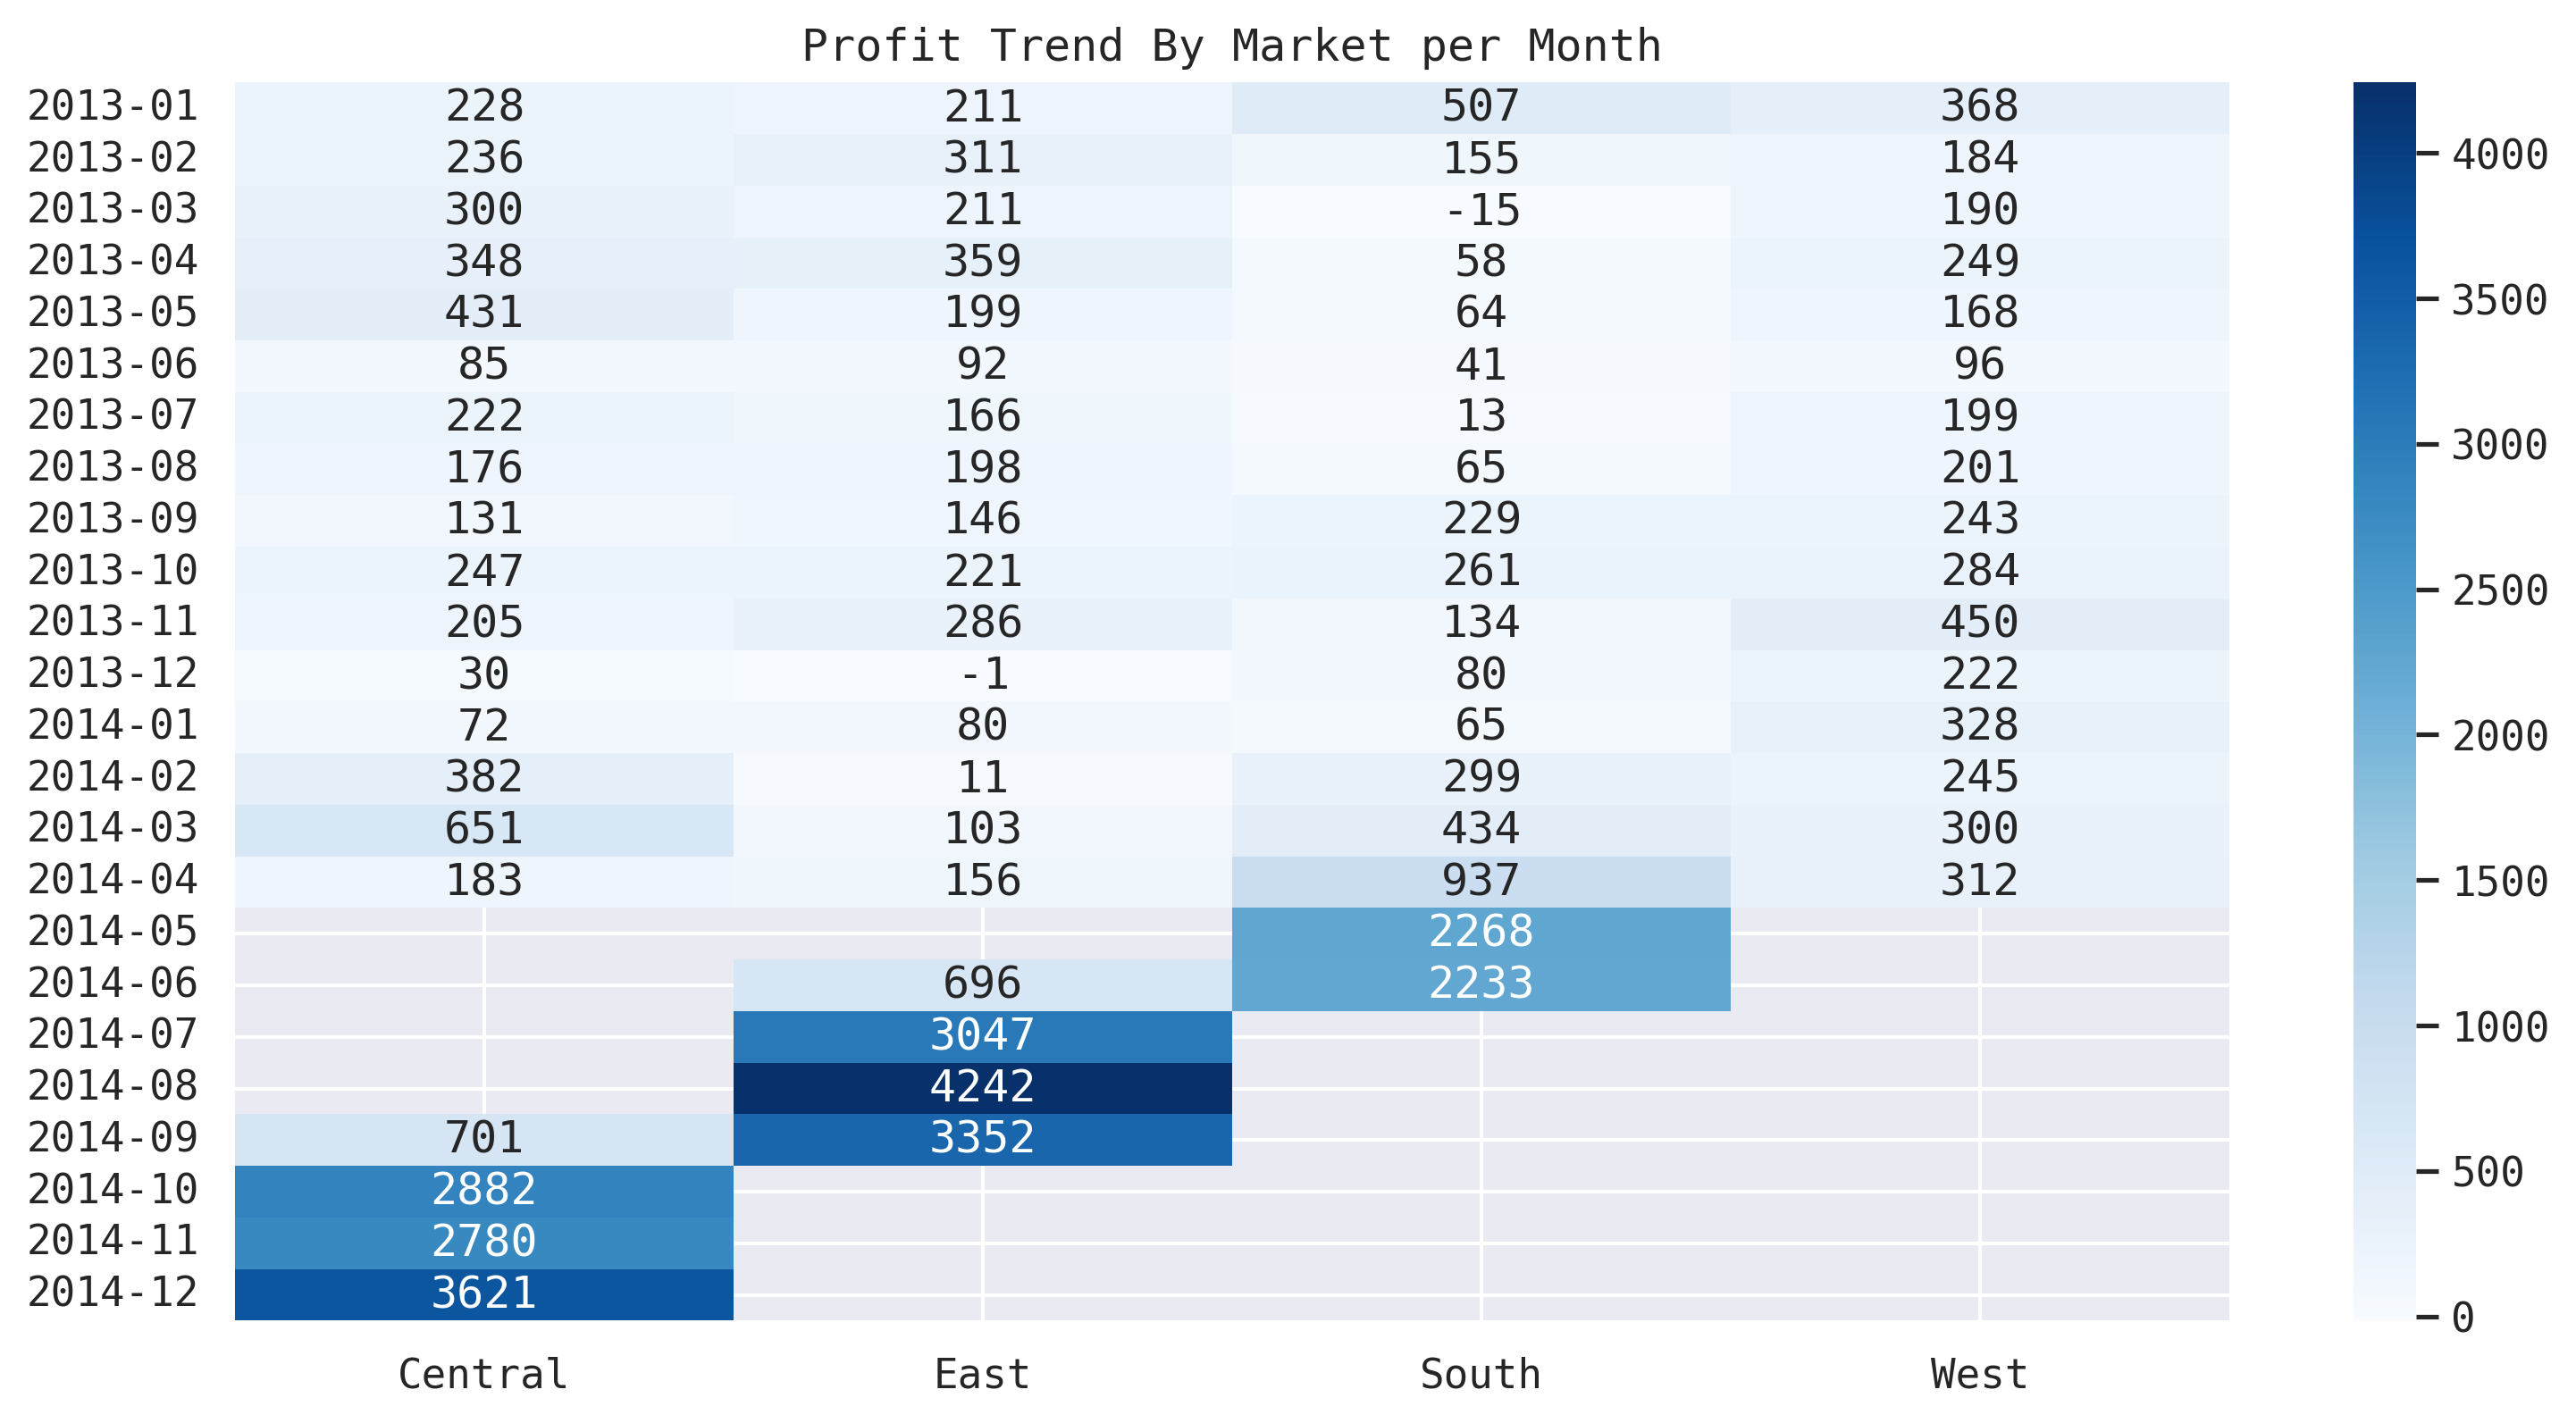

In [13]:
# Profit trend by market
heatmap_plots(data,'month','market','profit','sum','Profit Trend By Market per Month')

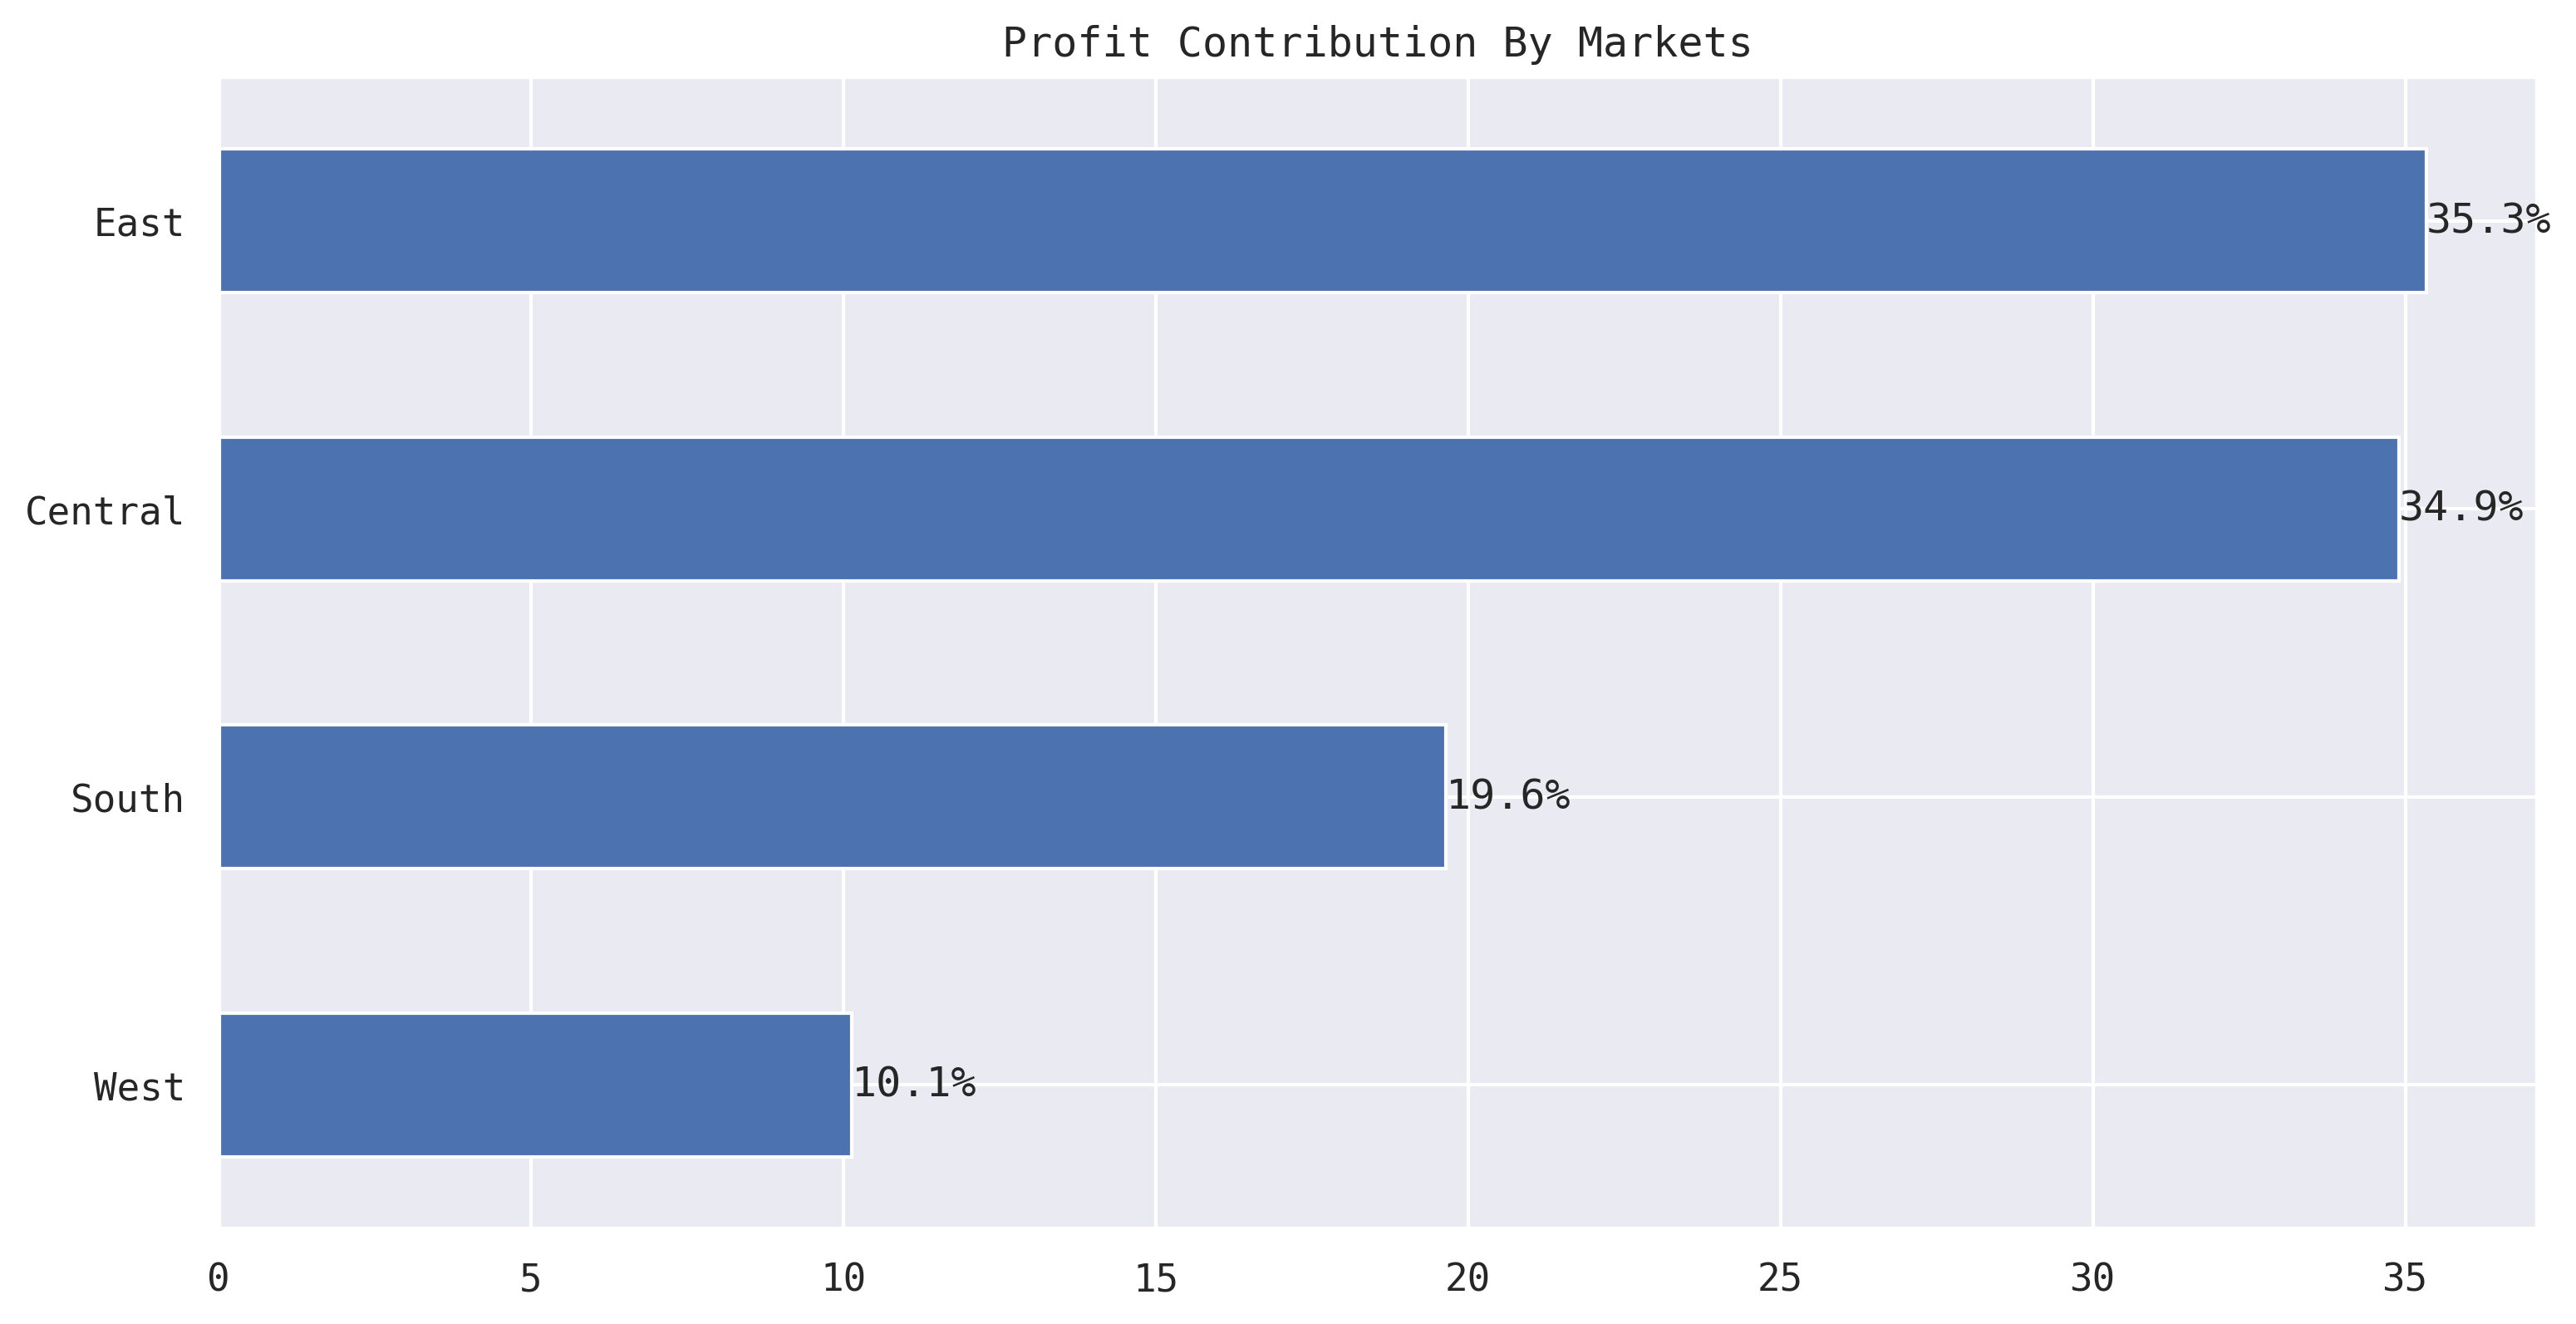

In [14]:
# Profit by Market 
horizontal_bar_plots(data,'market','profit','Profit Contribution By Markets')

#### (2). Product Analysis

##### (a). Product by Sales

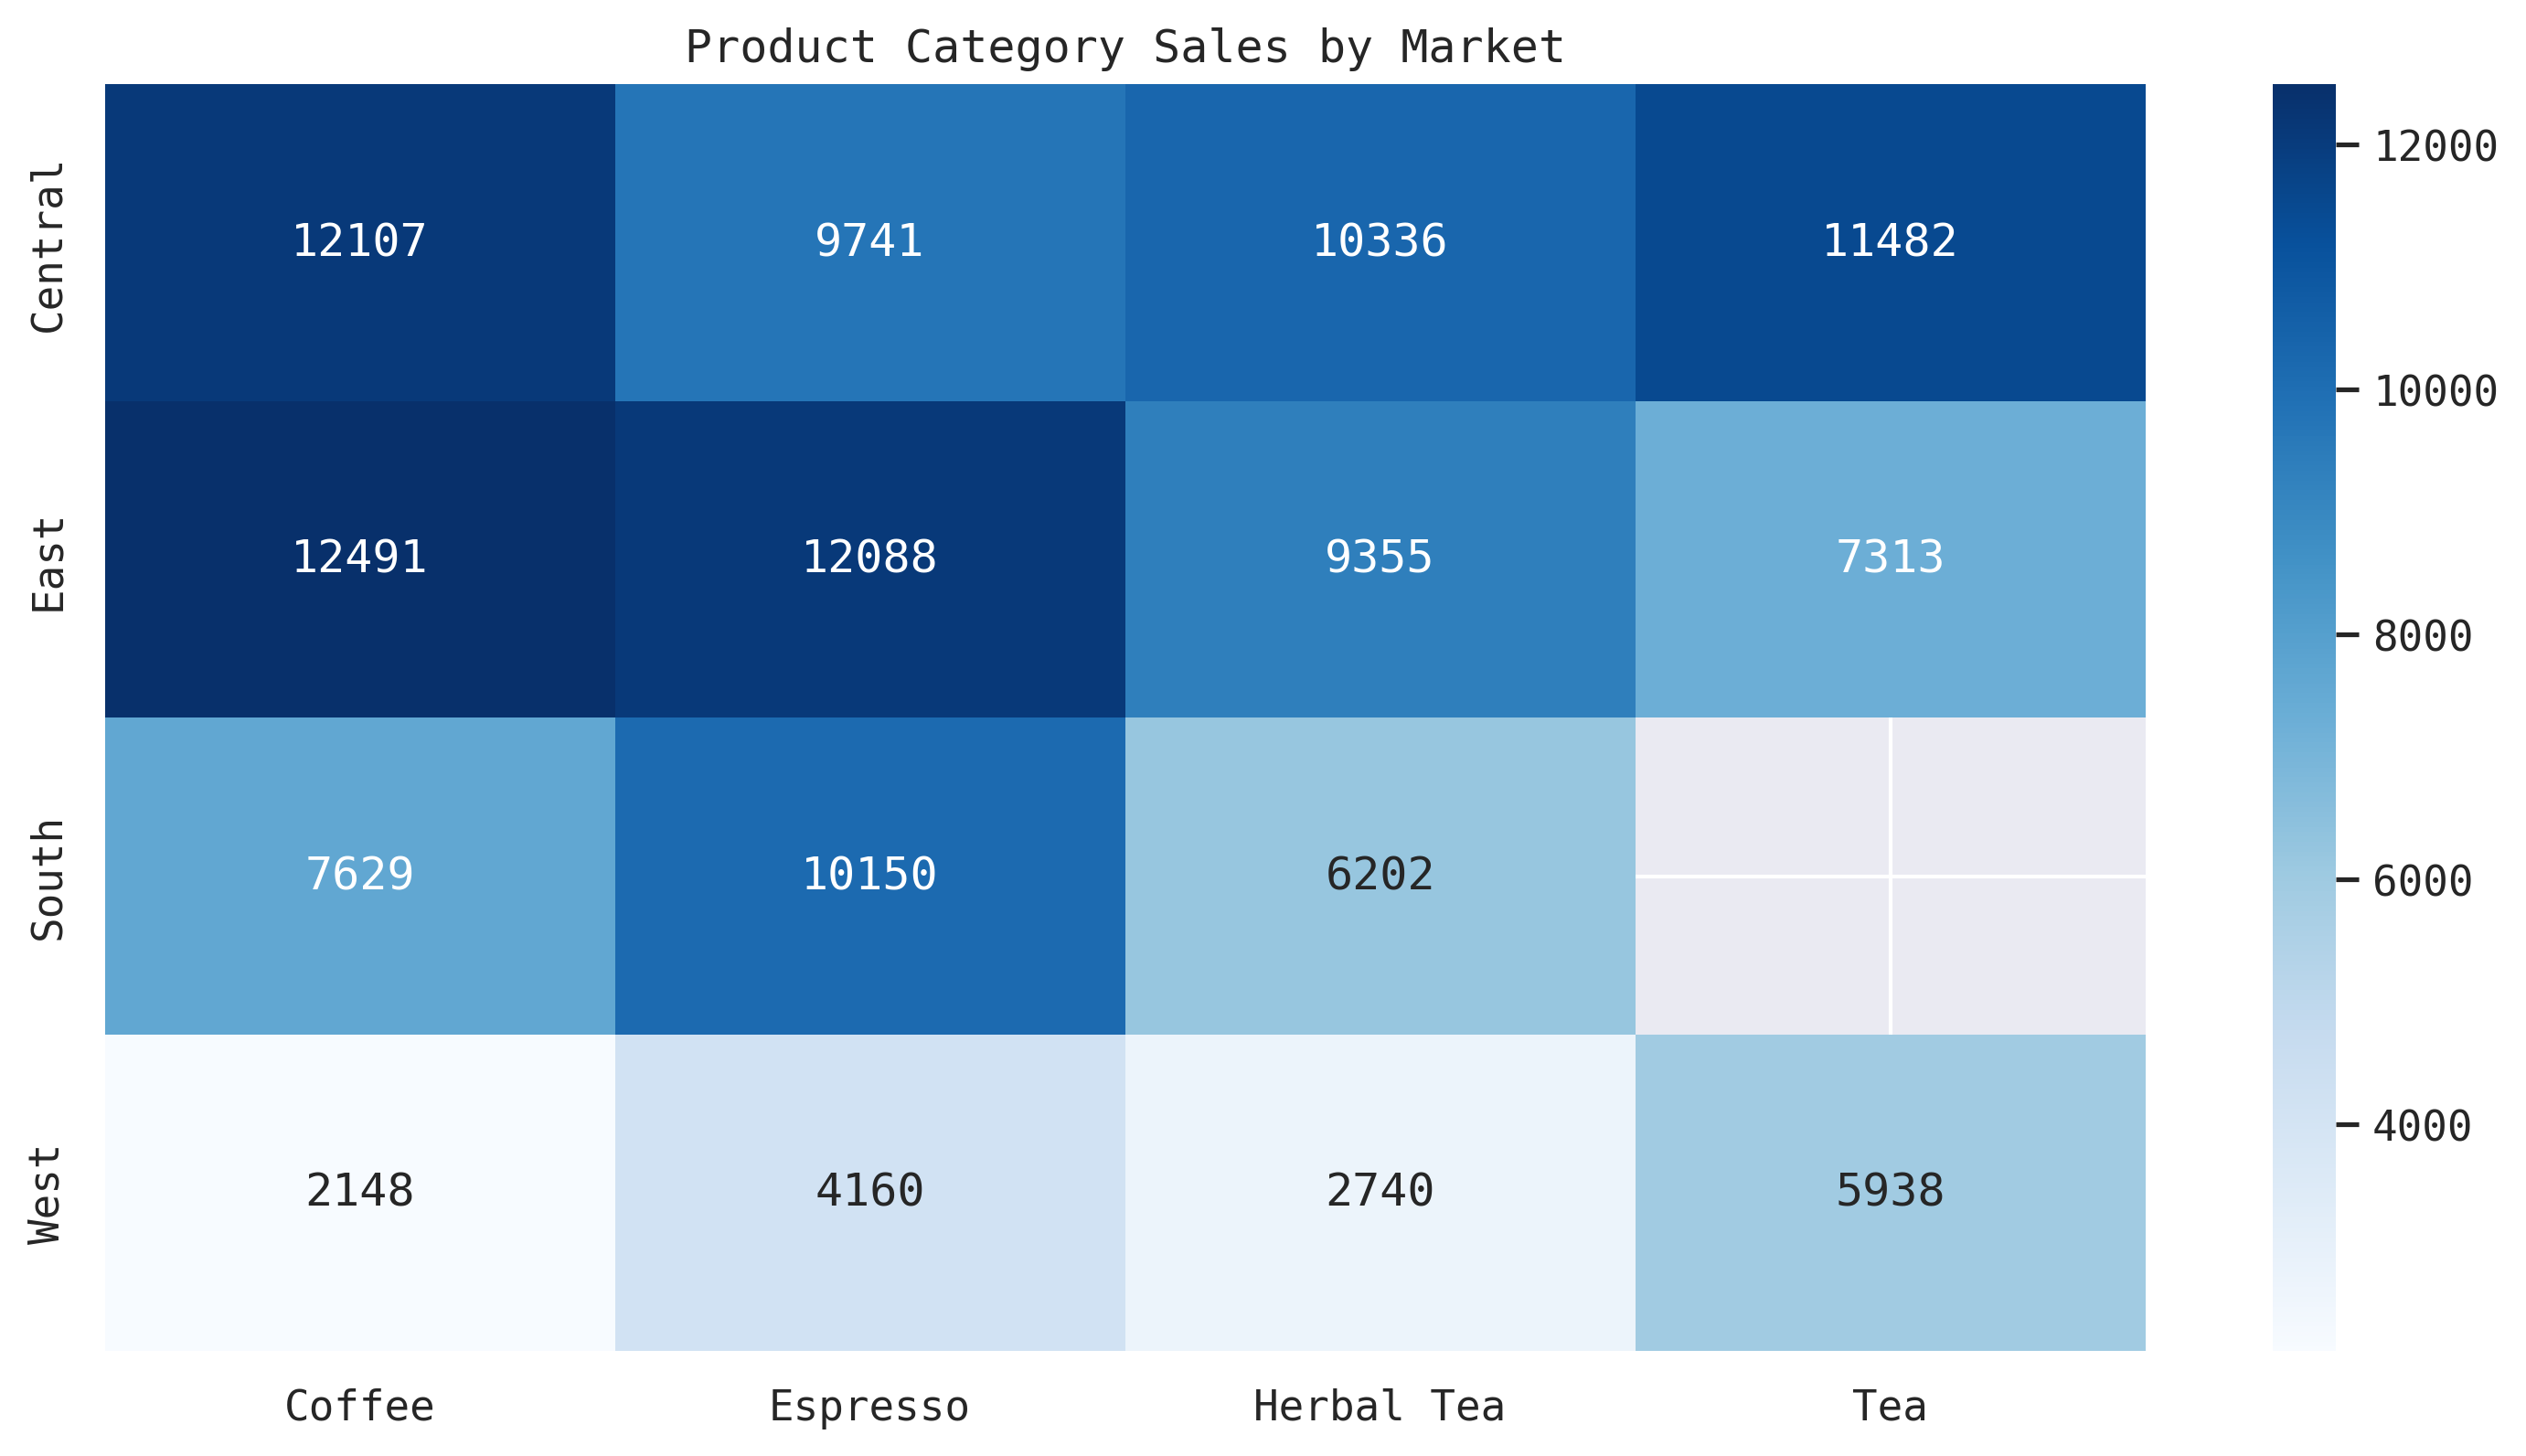

In [15]:
# product sales per market 
heatmap_plots(data,'market','product_type','sales','sum','Product Category Sales by Market')

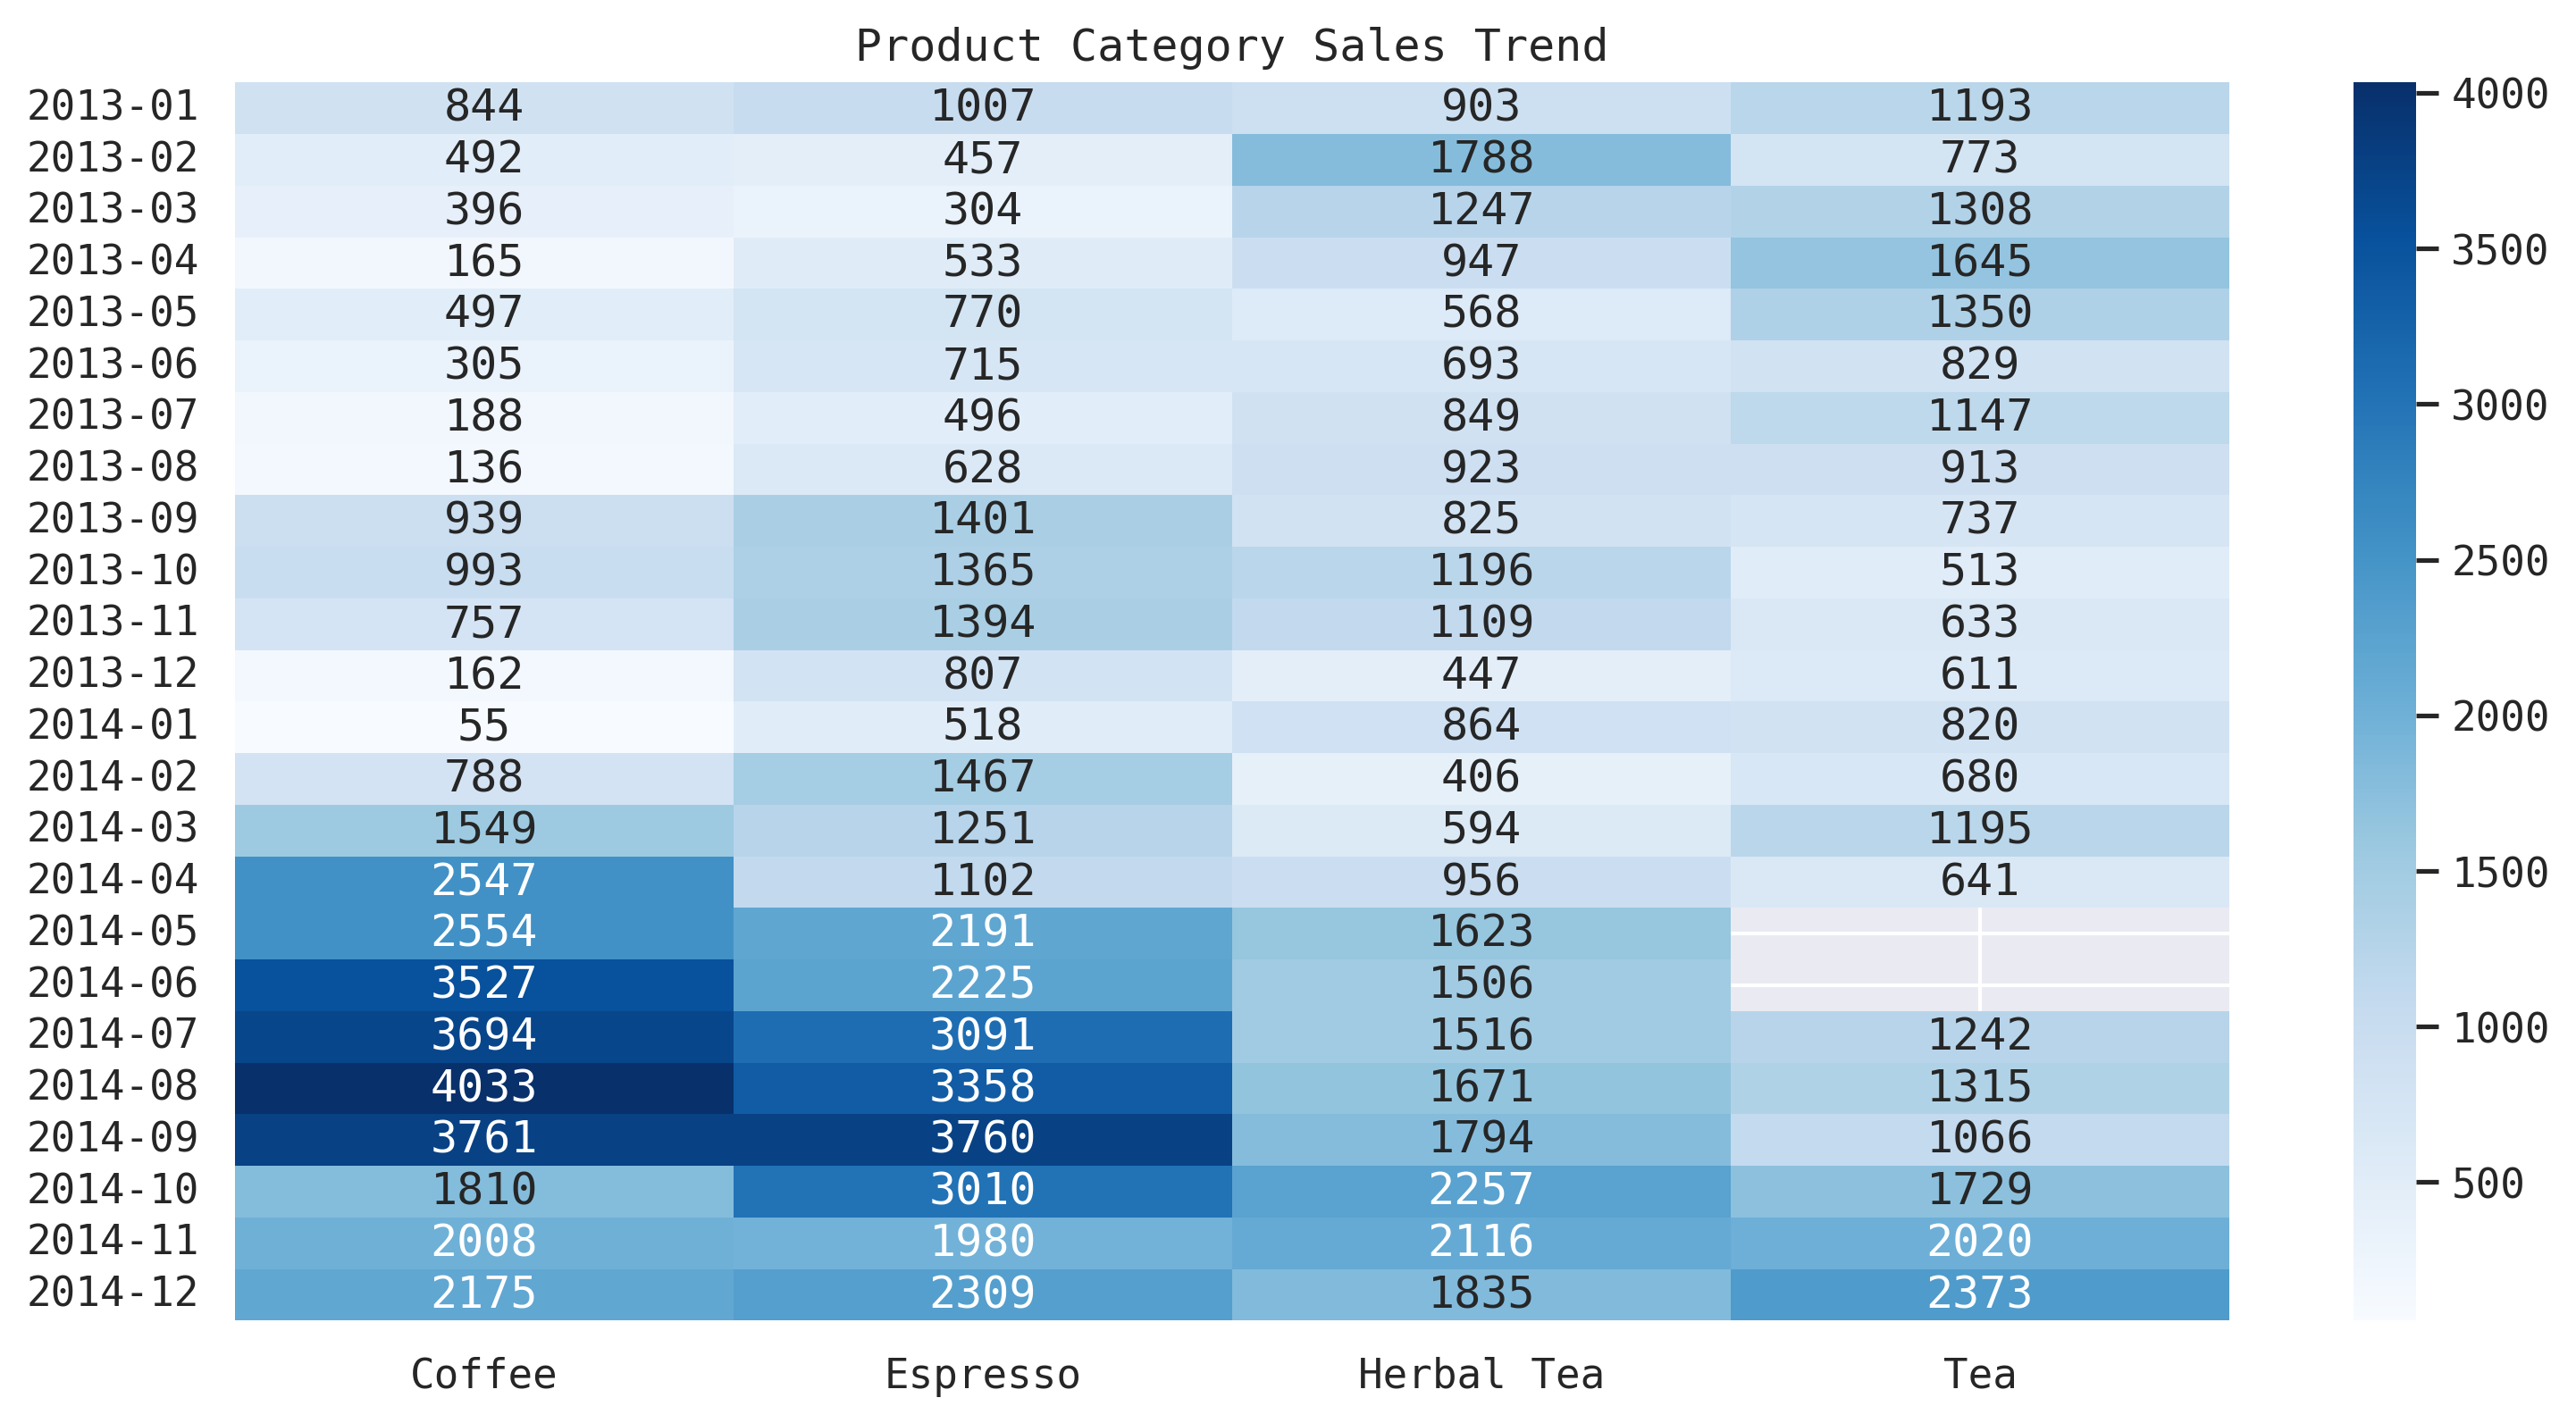

In [16]:
# product Sales Trend 
heatmap_plots(data,'month','product_type','sales','sum','Product Category Sales Trend')

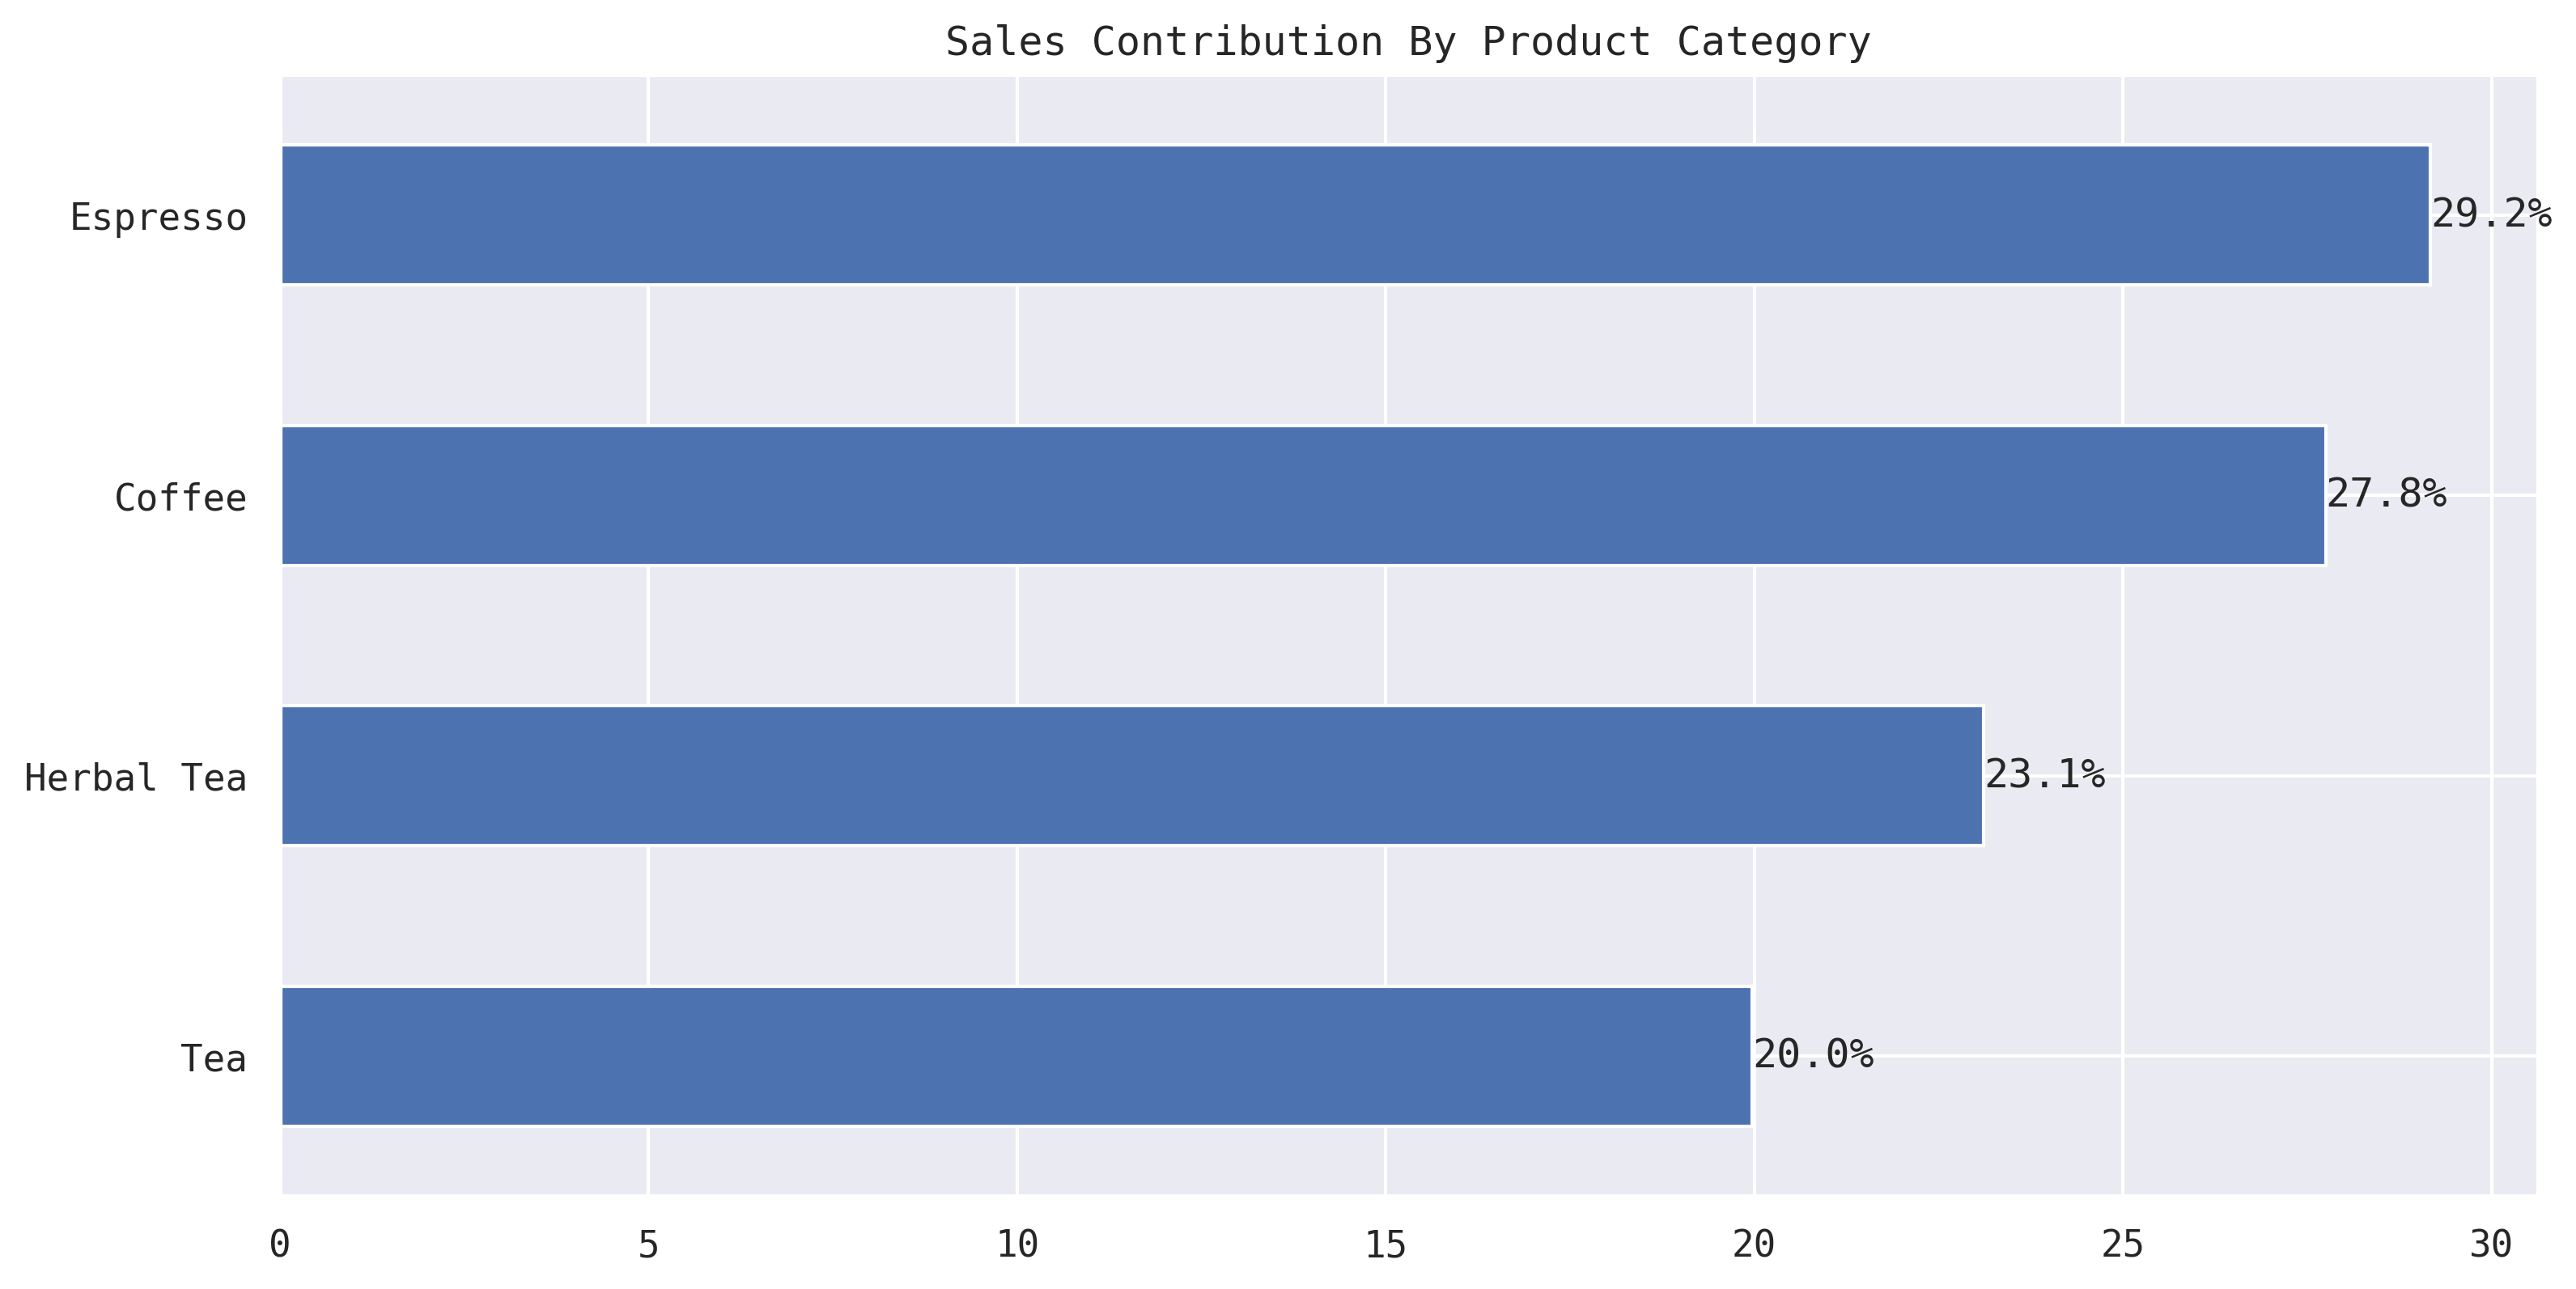

In [17]:
# sales contribution by product category
horizontal_bar_plots(data,'product_type','sales','Sales Contribution By Product Category')

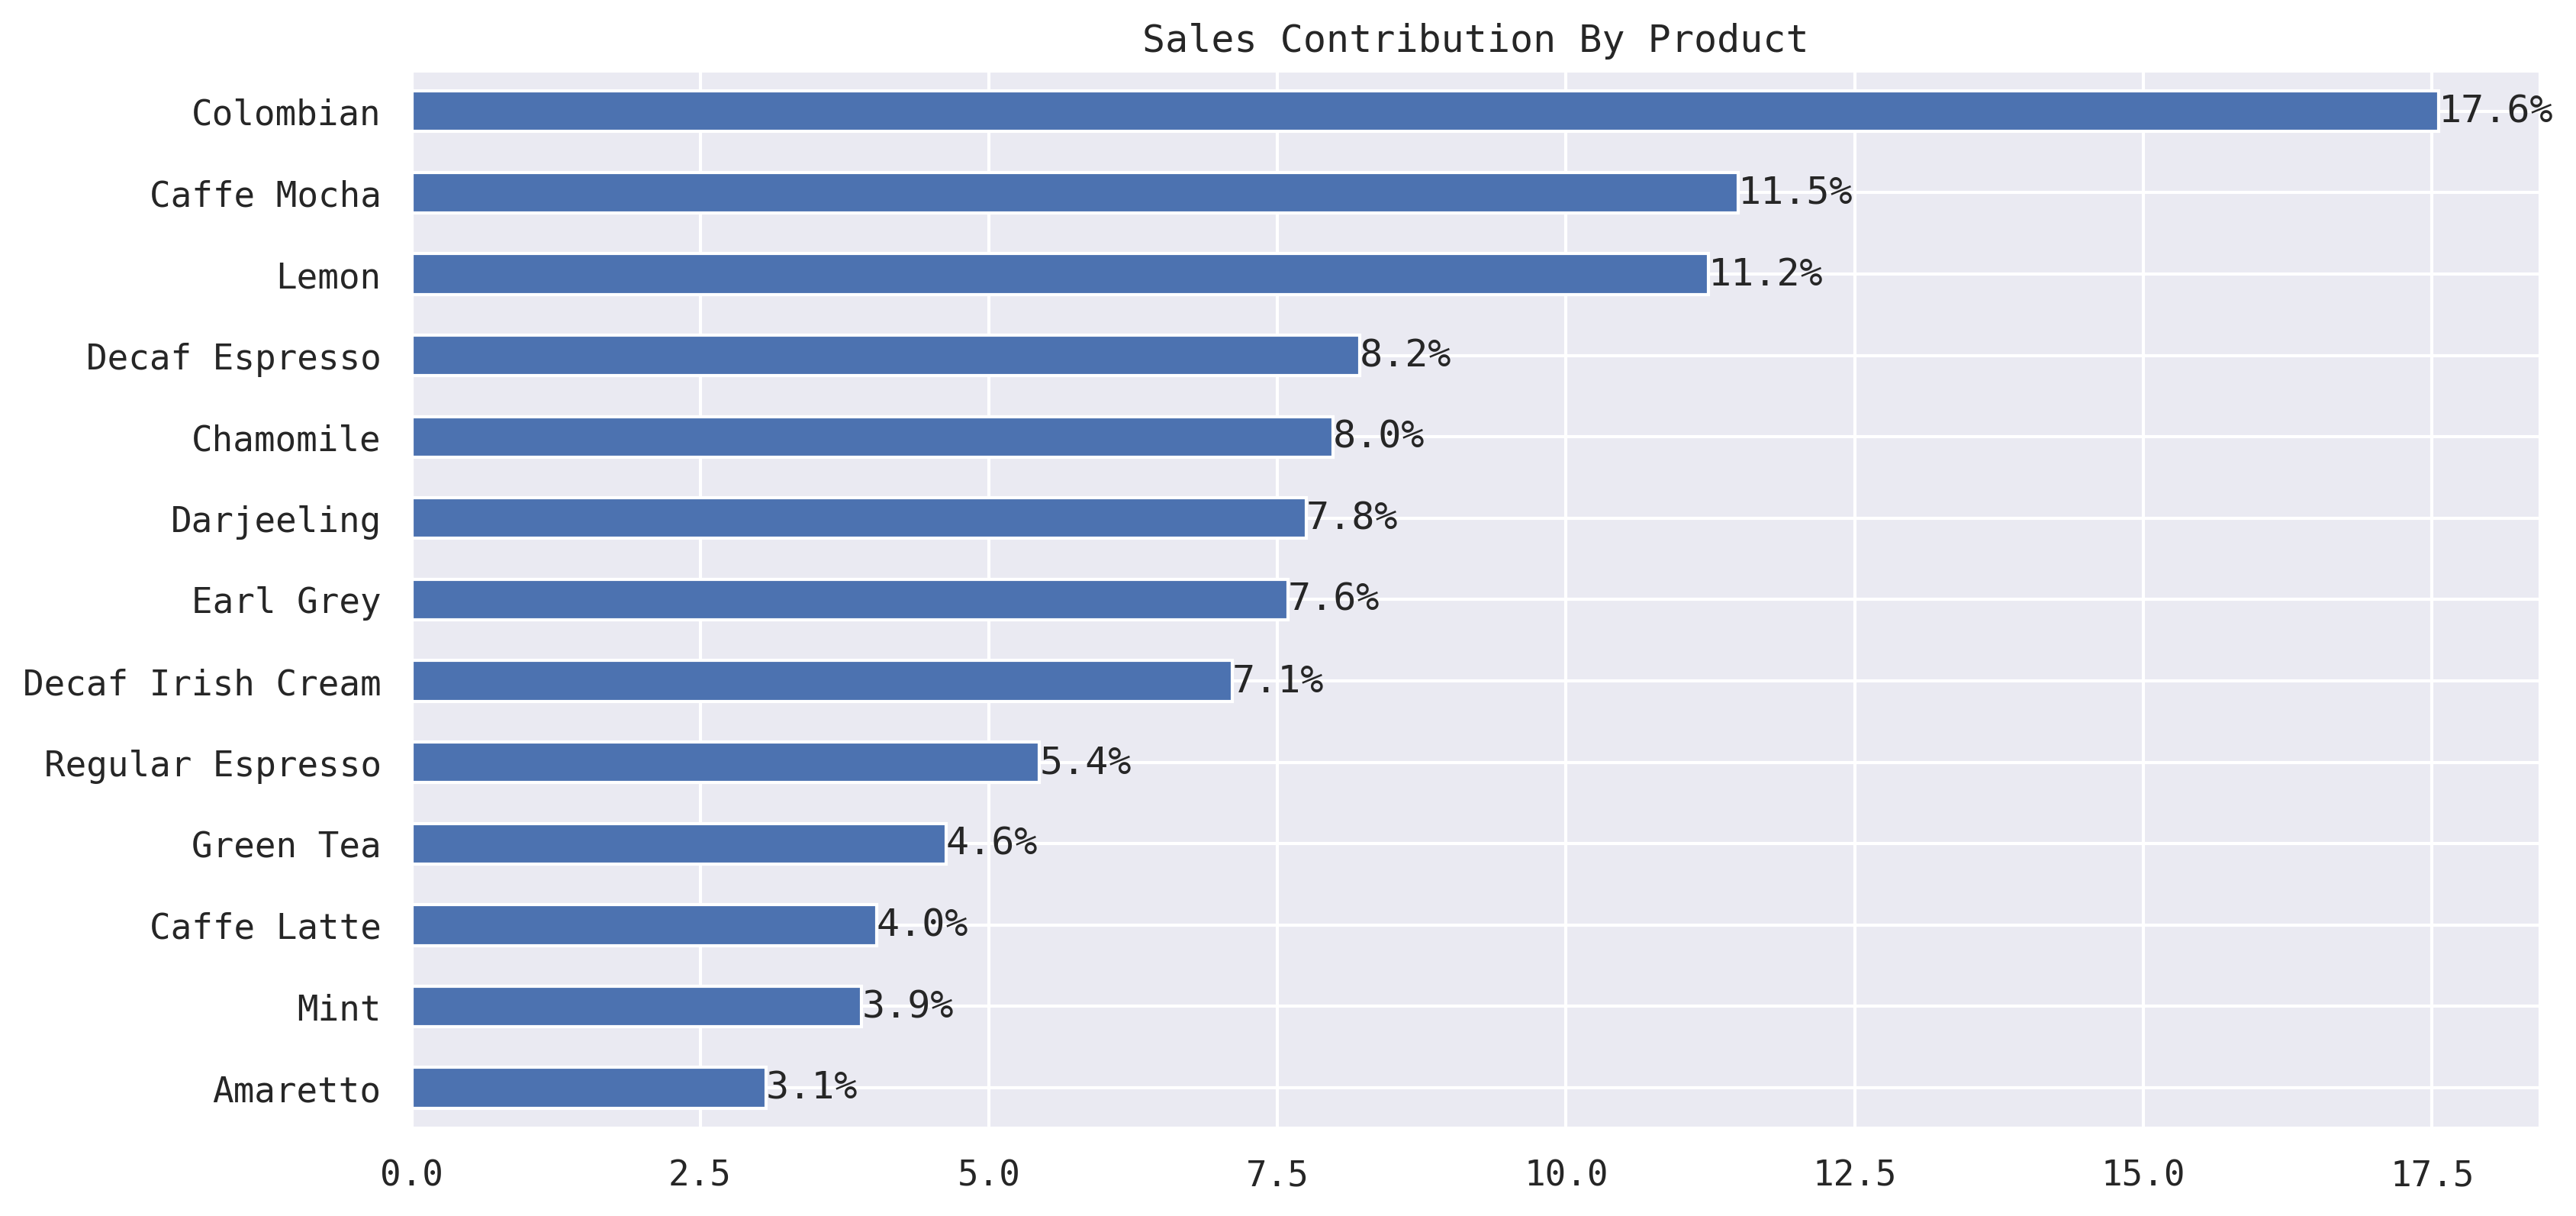

In [18]:
# Sales contribution by product 
horizontal_bar_plots(data,'product','sales','Sales Contribution By Product')

##### (b). Product by Profit

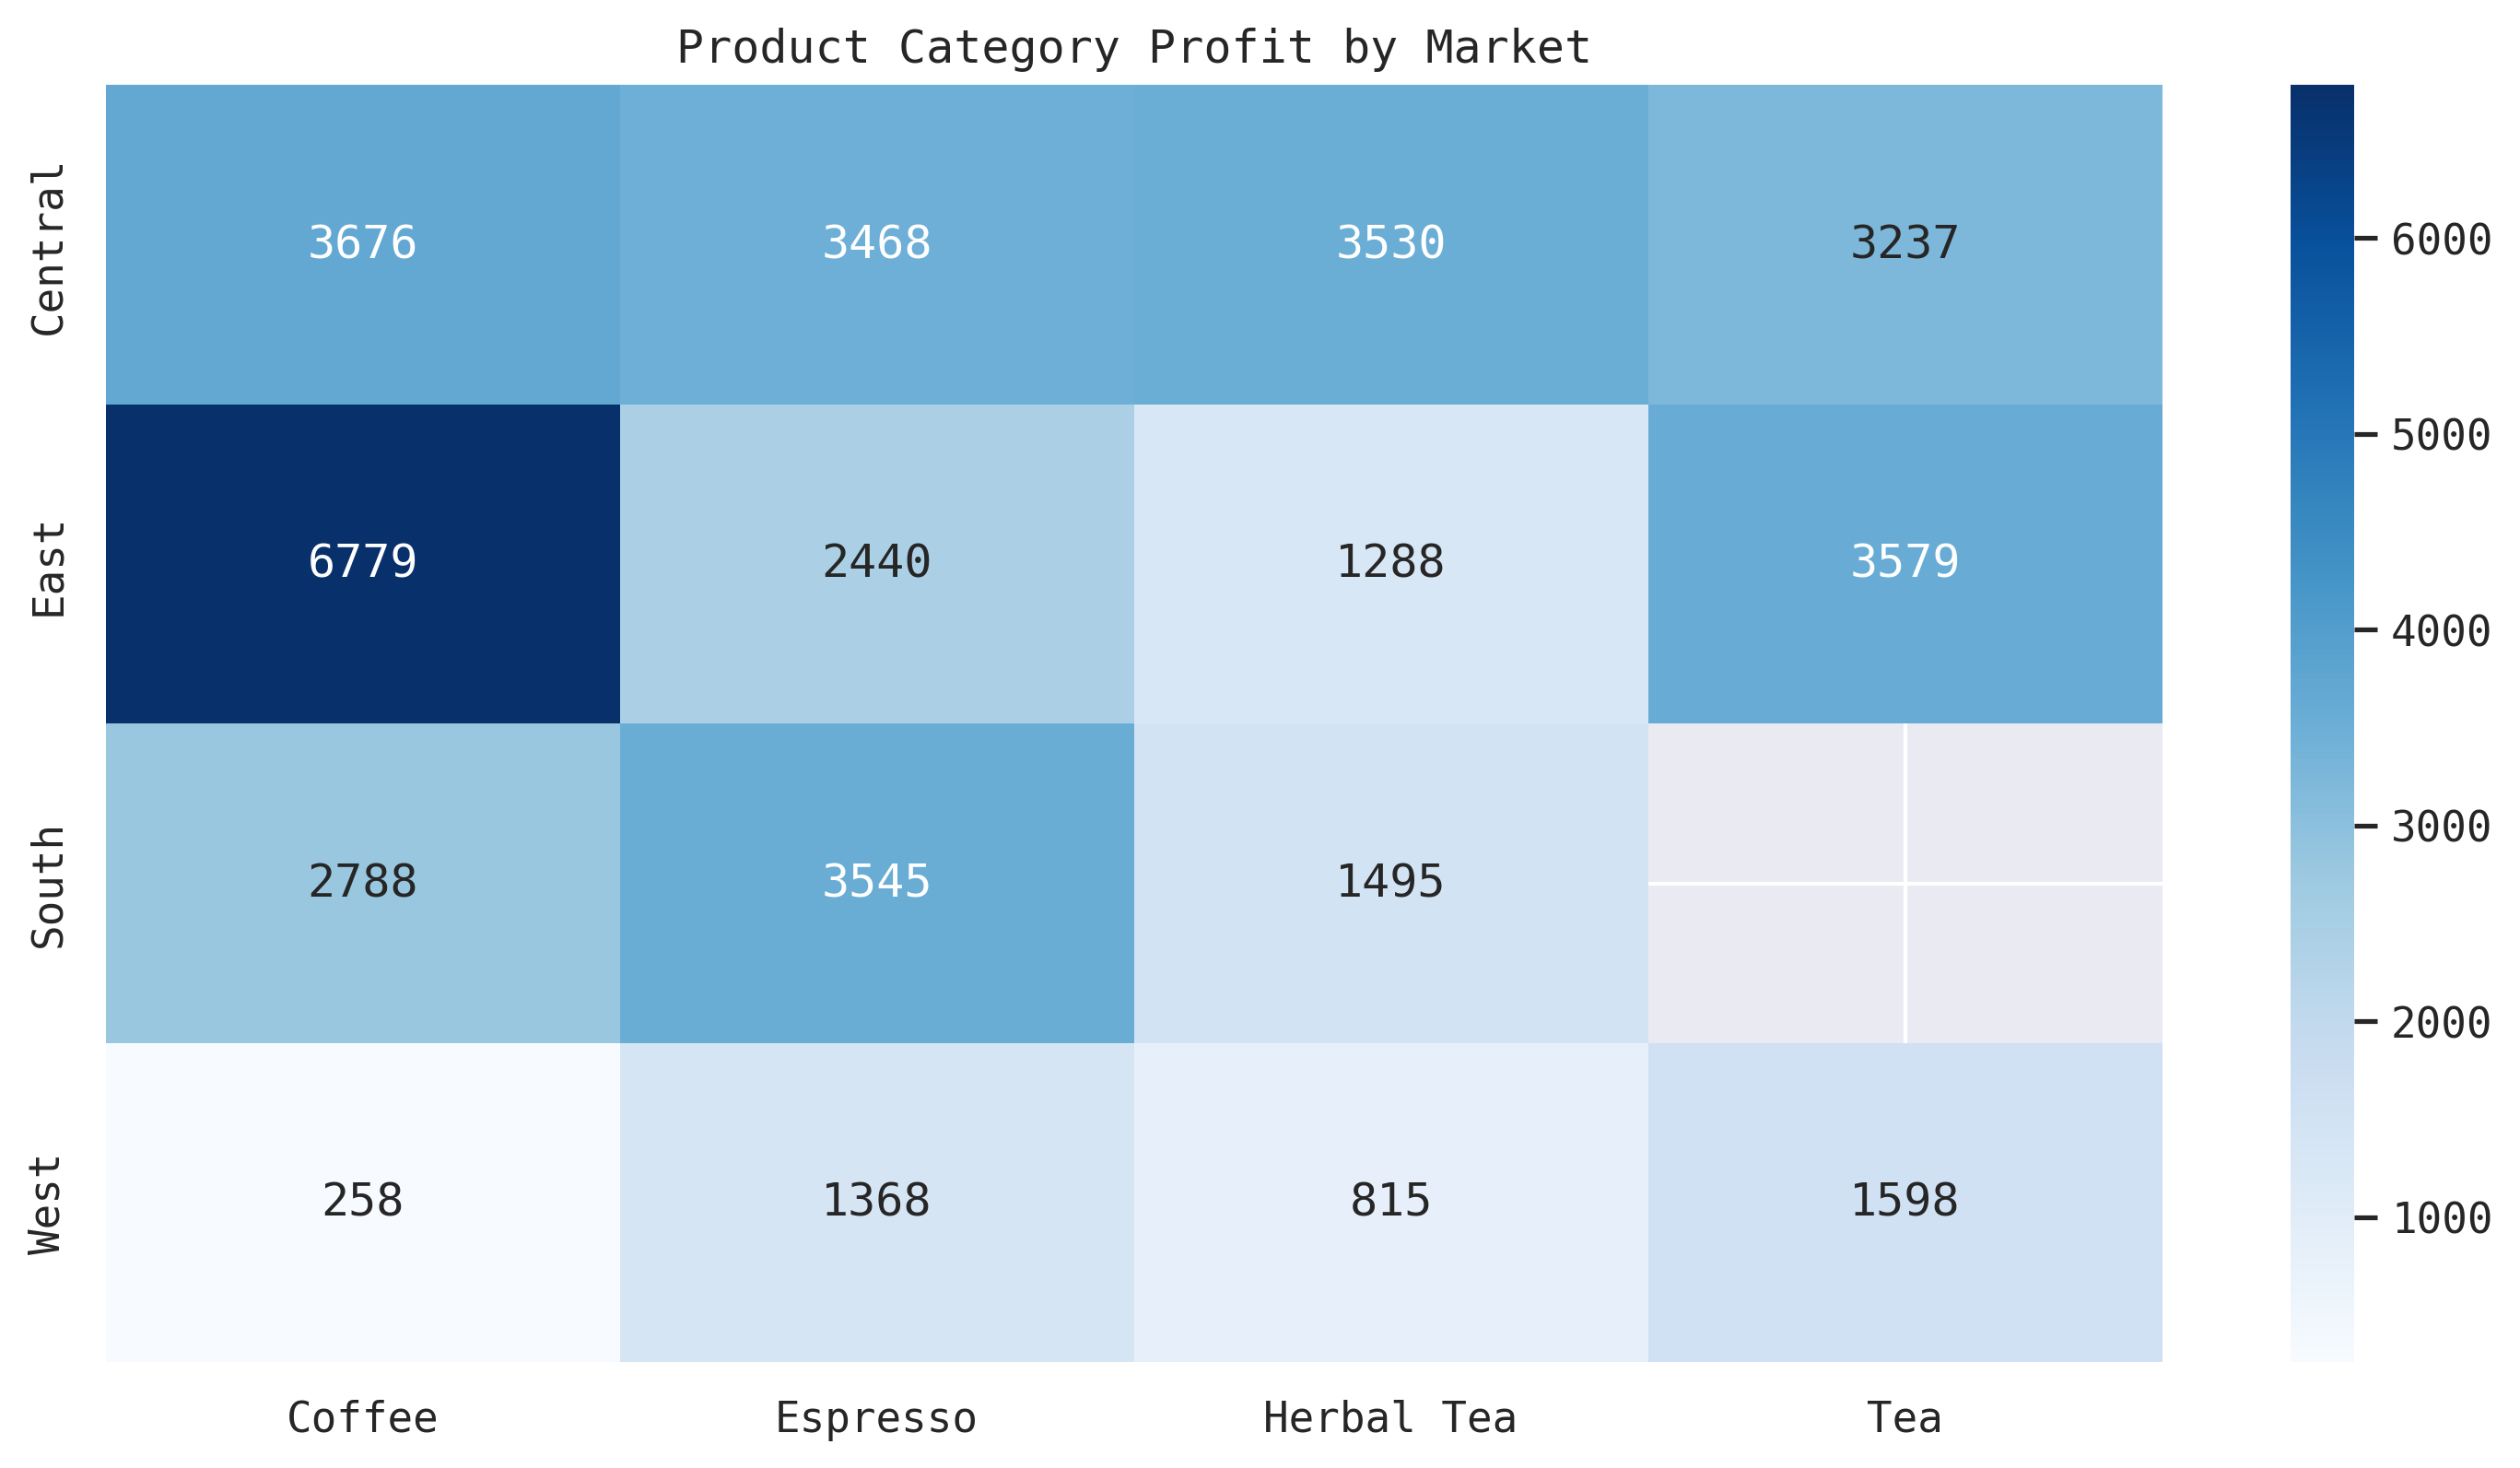

In [19]:
# product category profit per market 
heatmap_plots(data,'market','product_type','profit','sum','Product Category Profit by Market')

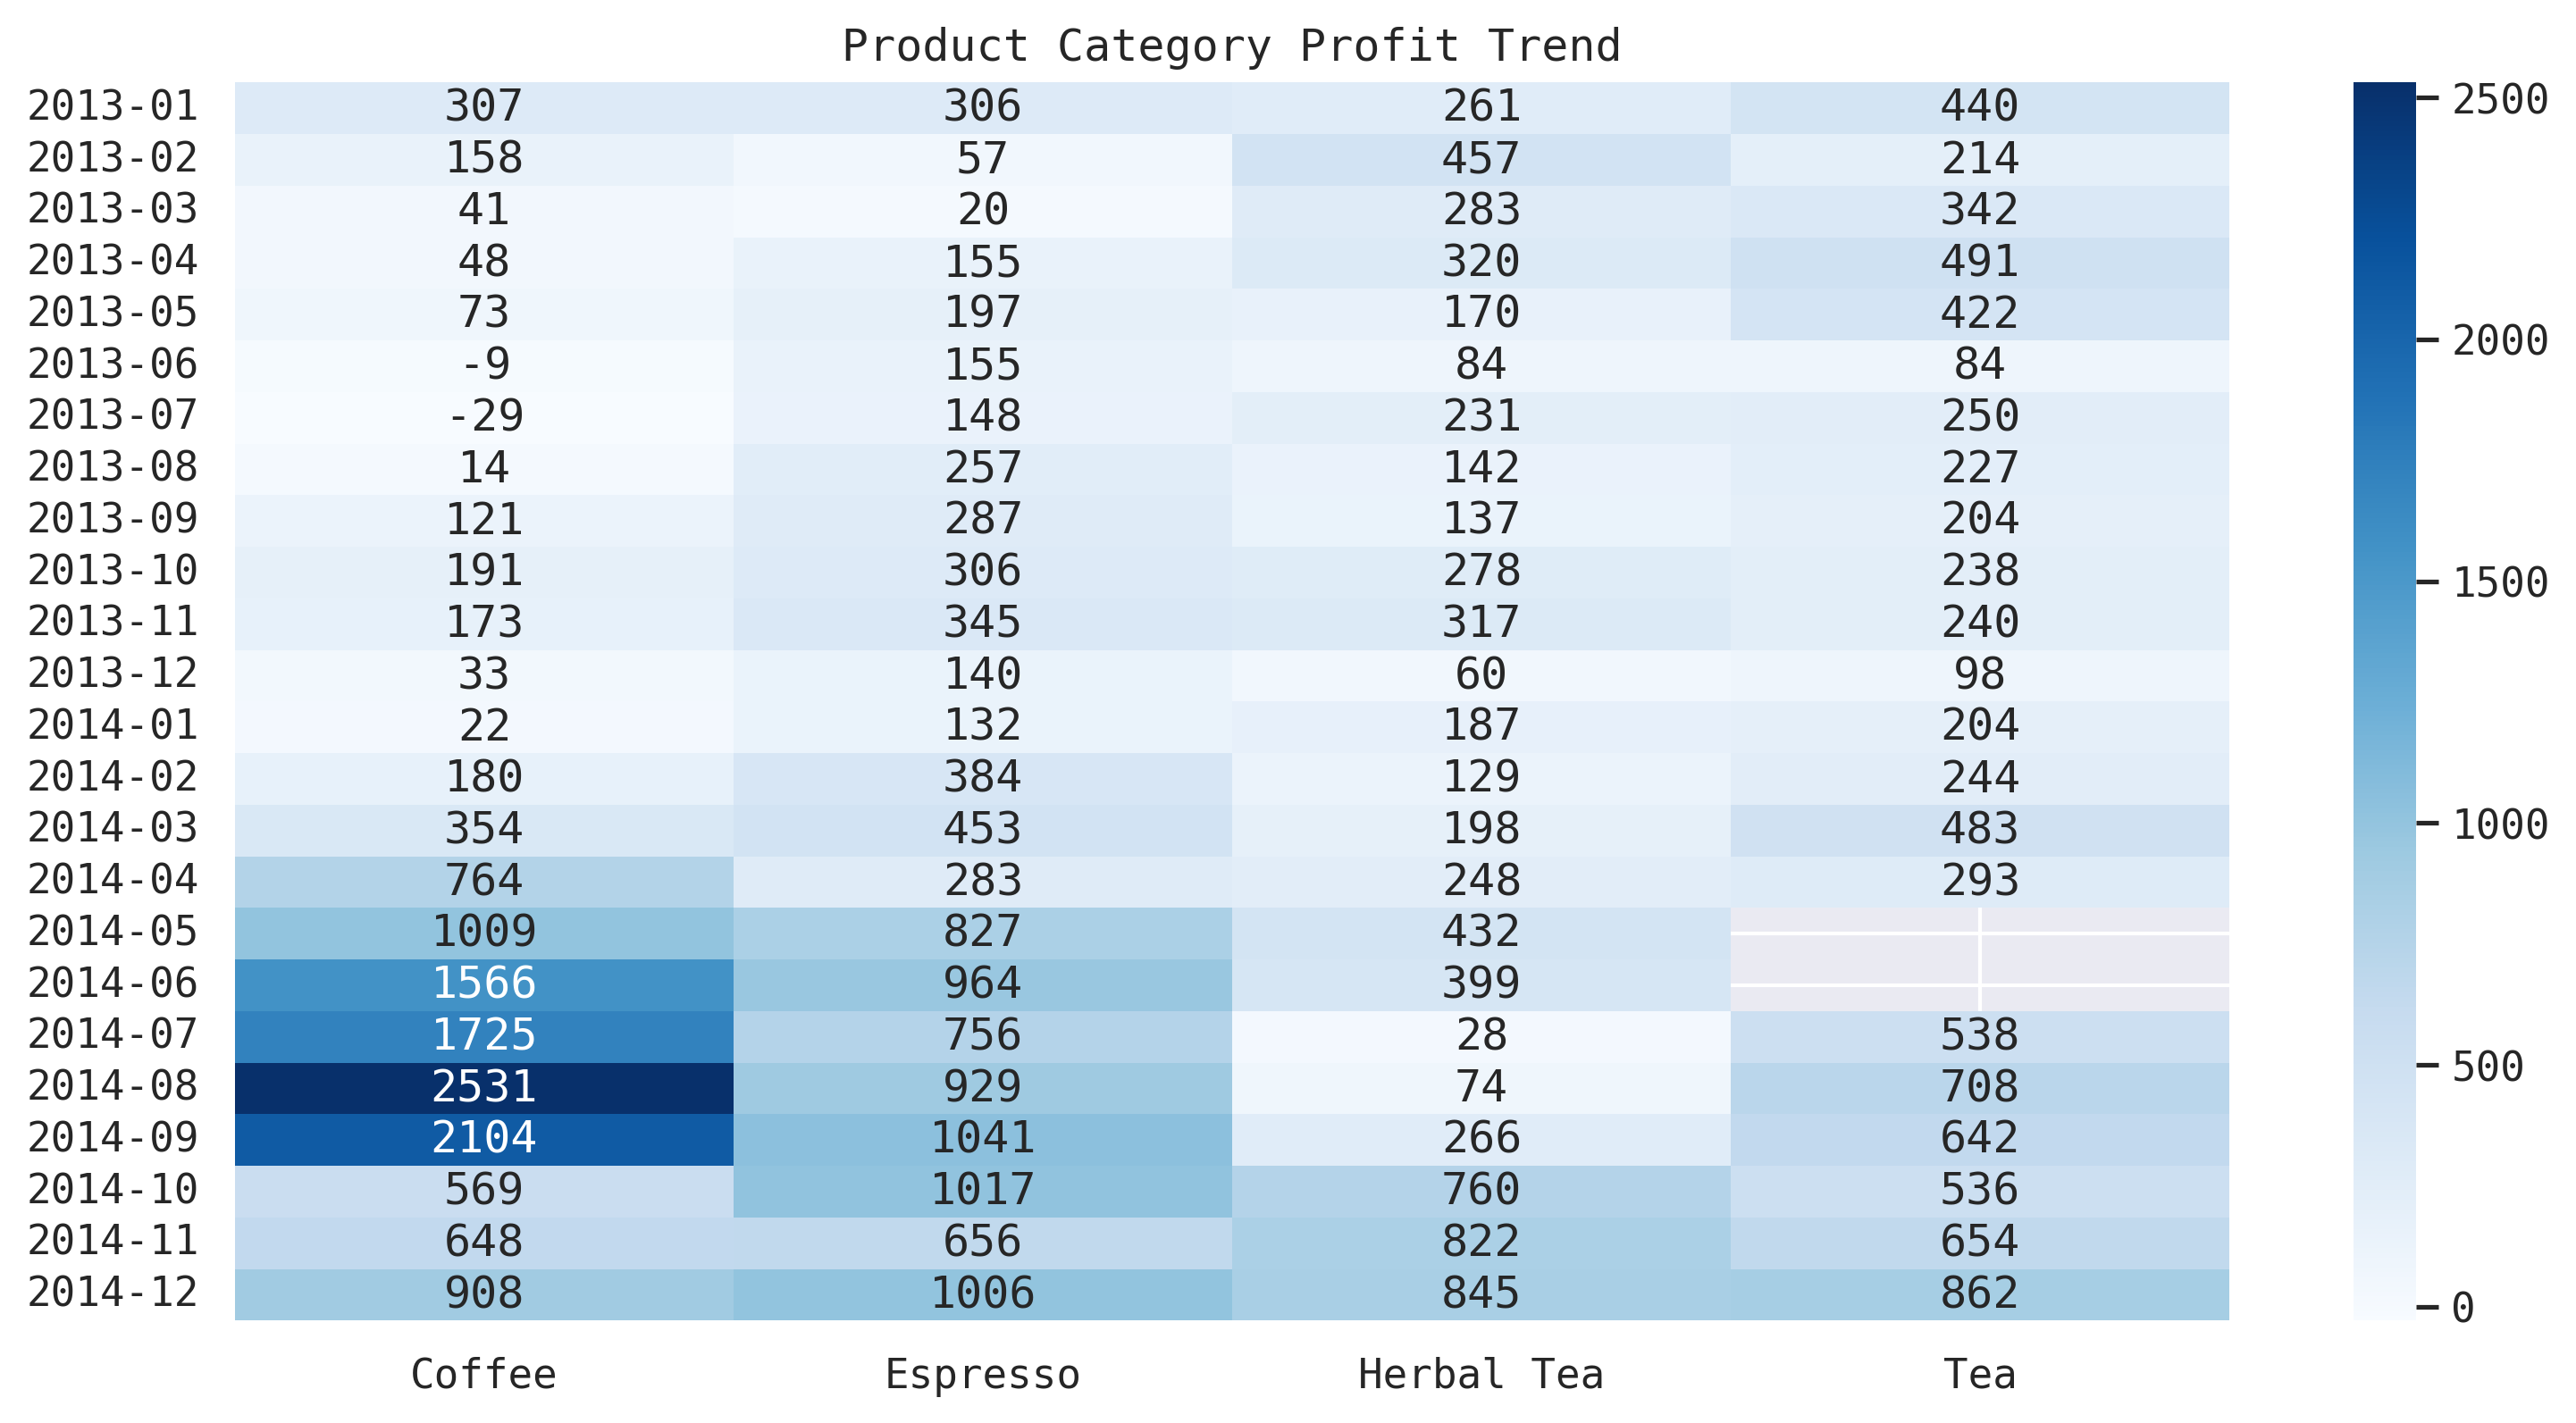

In [20]:
# product Profit Trend 
heatmap_plots(data,'month','product_type','profit','sum','Product Category Profit Trend')

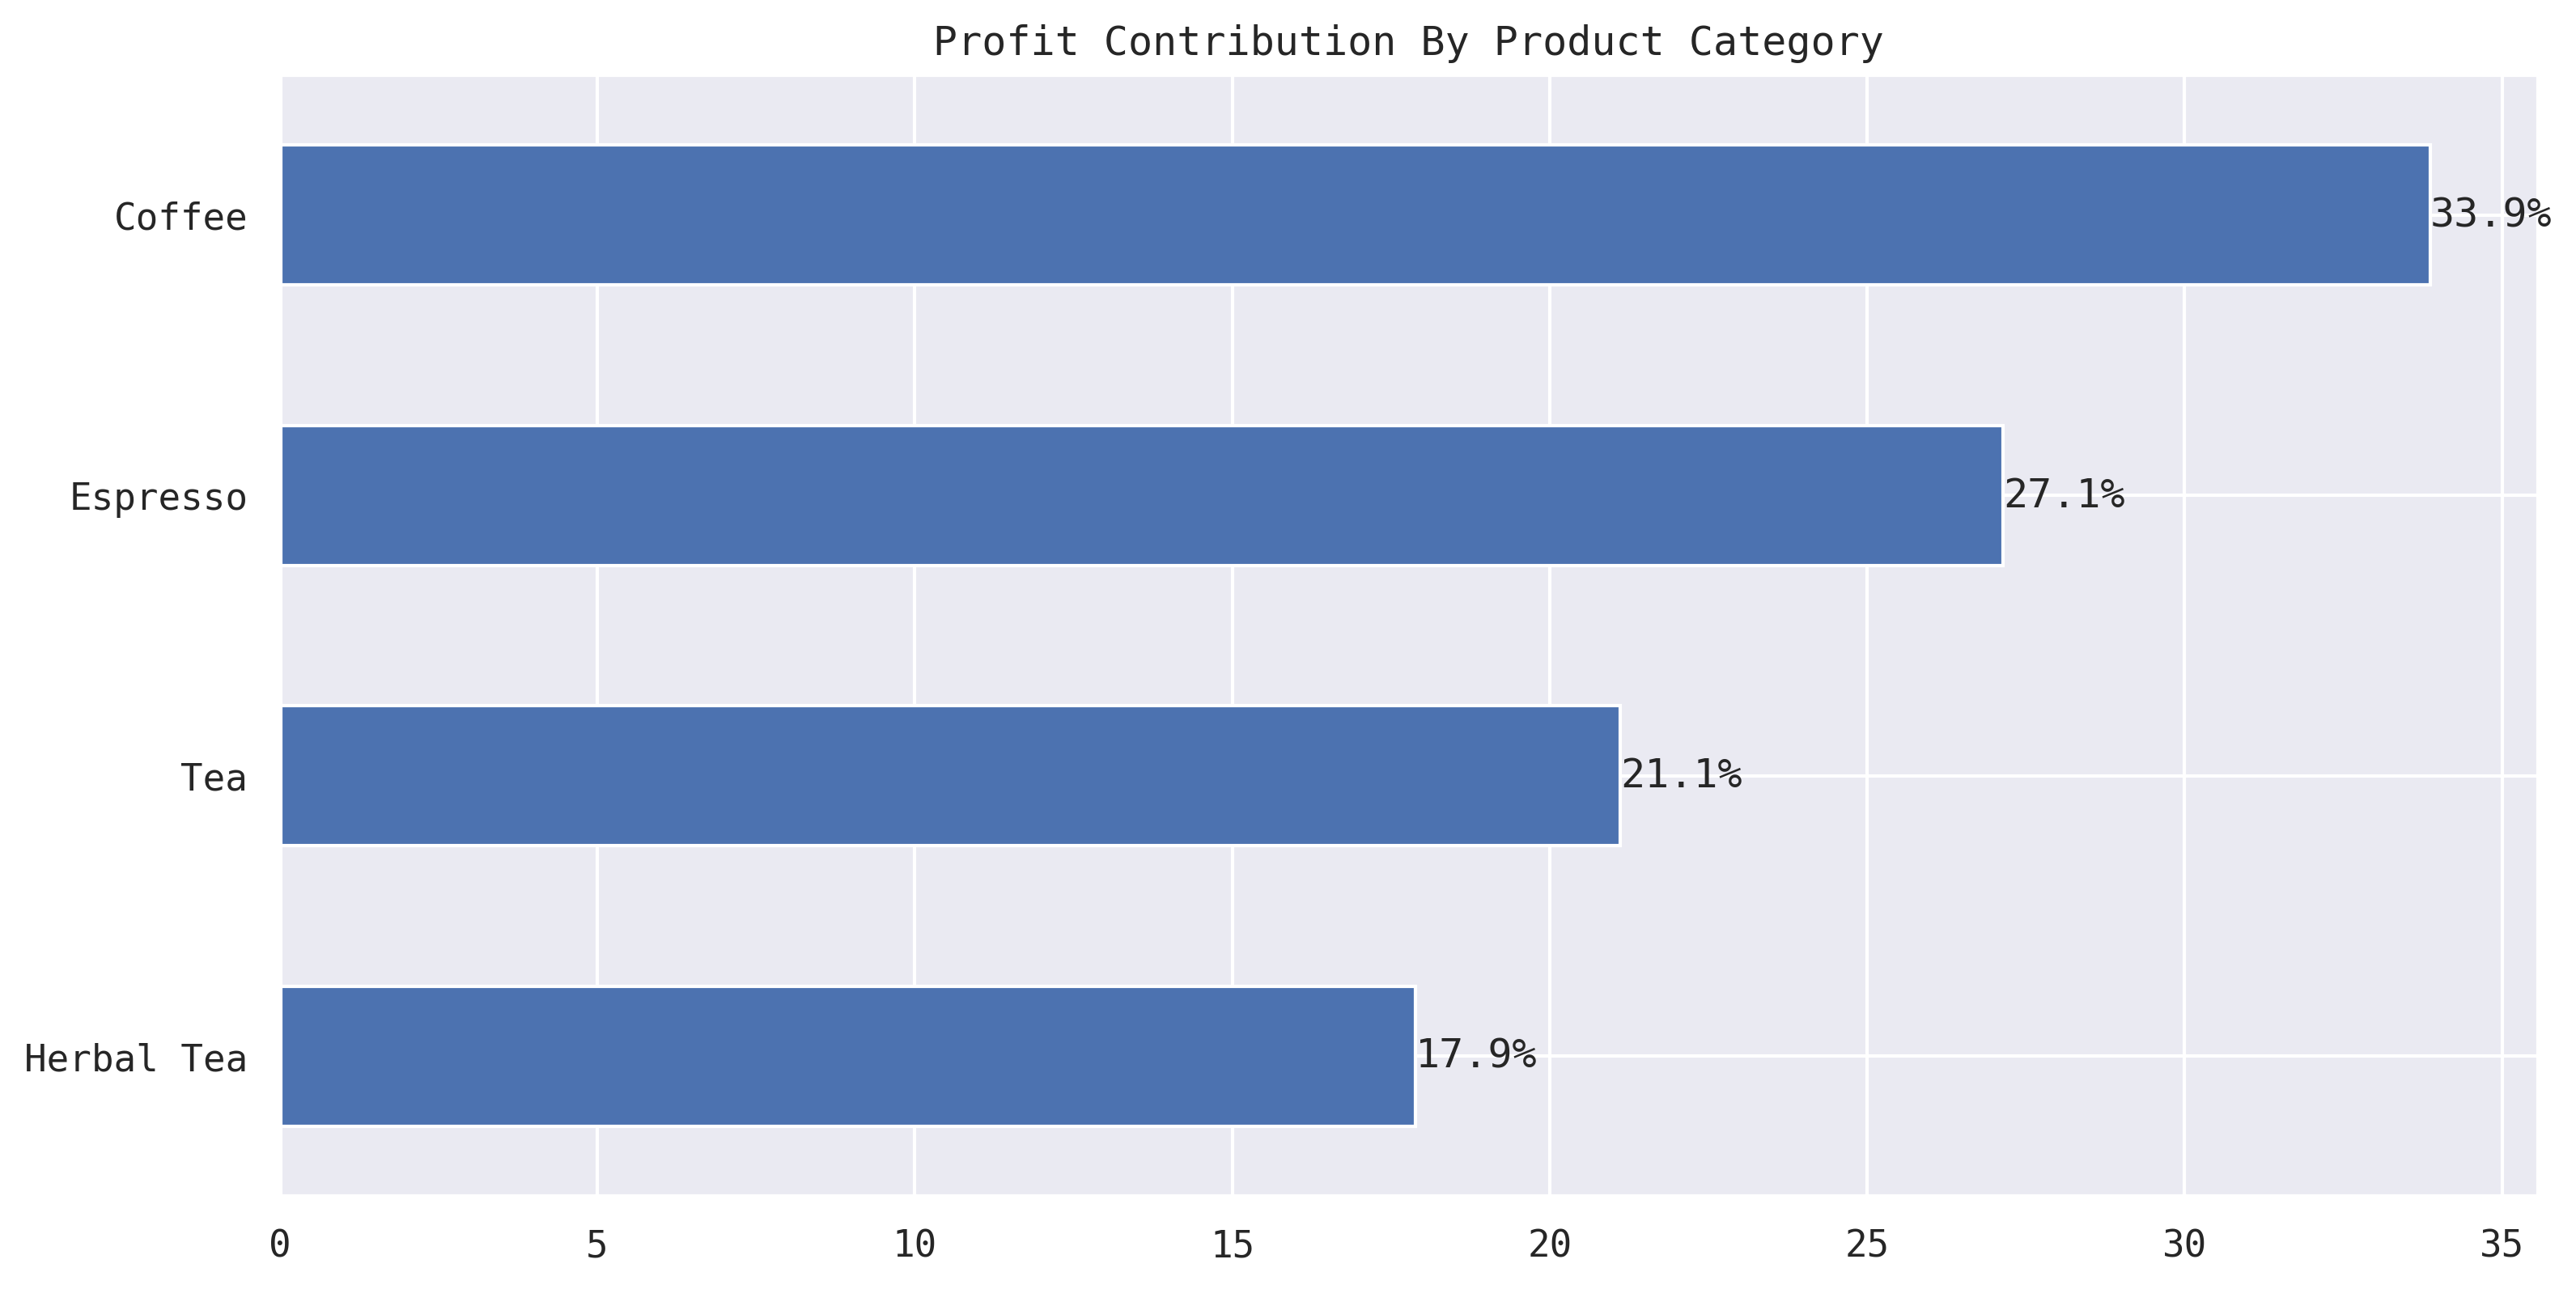

In [21]:
# Profit ontribution by product category
horizontal_bar_plots(data,'product_type','profit','Profit Contribution By Product Category')

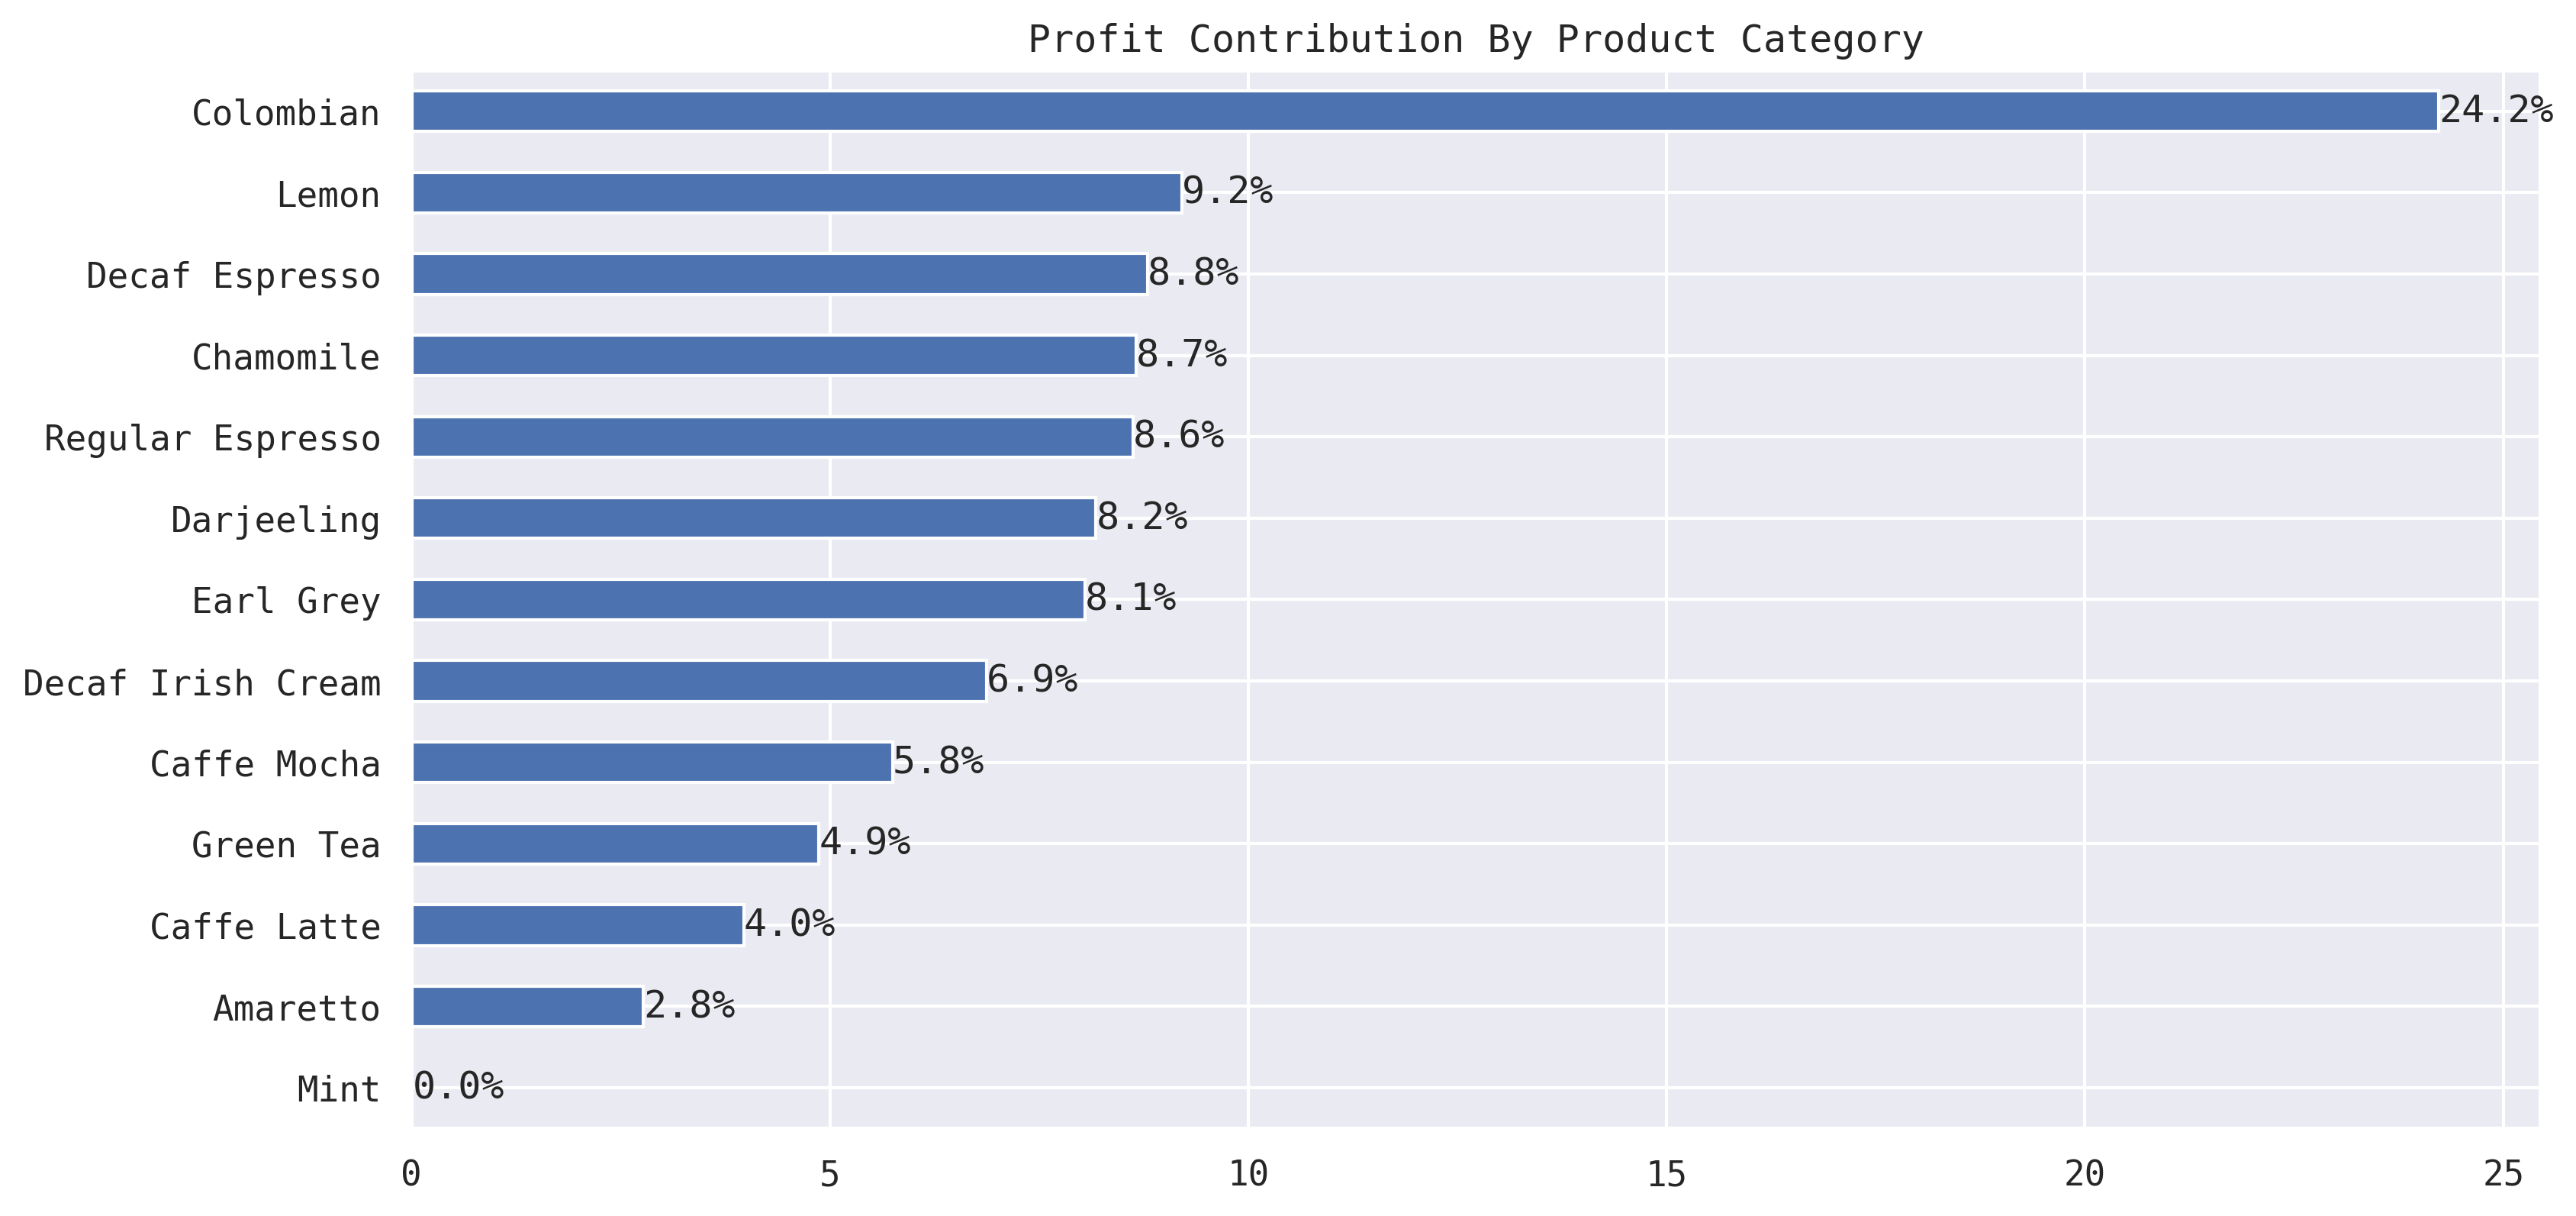

In [22]:
# product contribution by product 
horizontal_bar_plots(data,'product','profit','Profit Contribution By Product Category')

### (3). Marketing

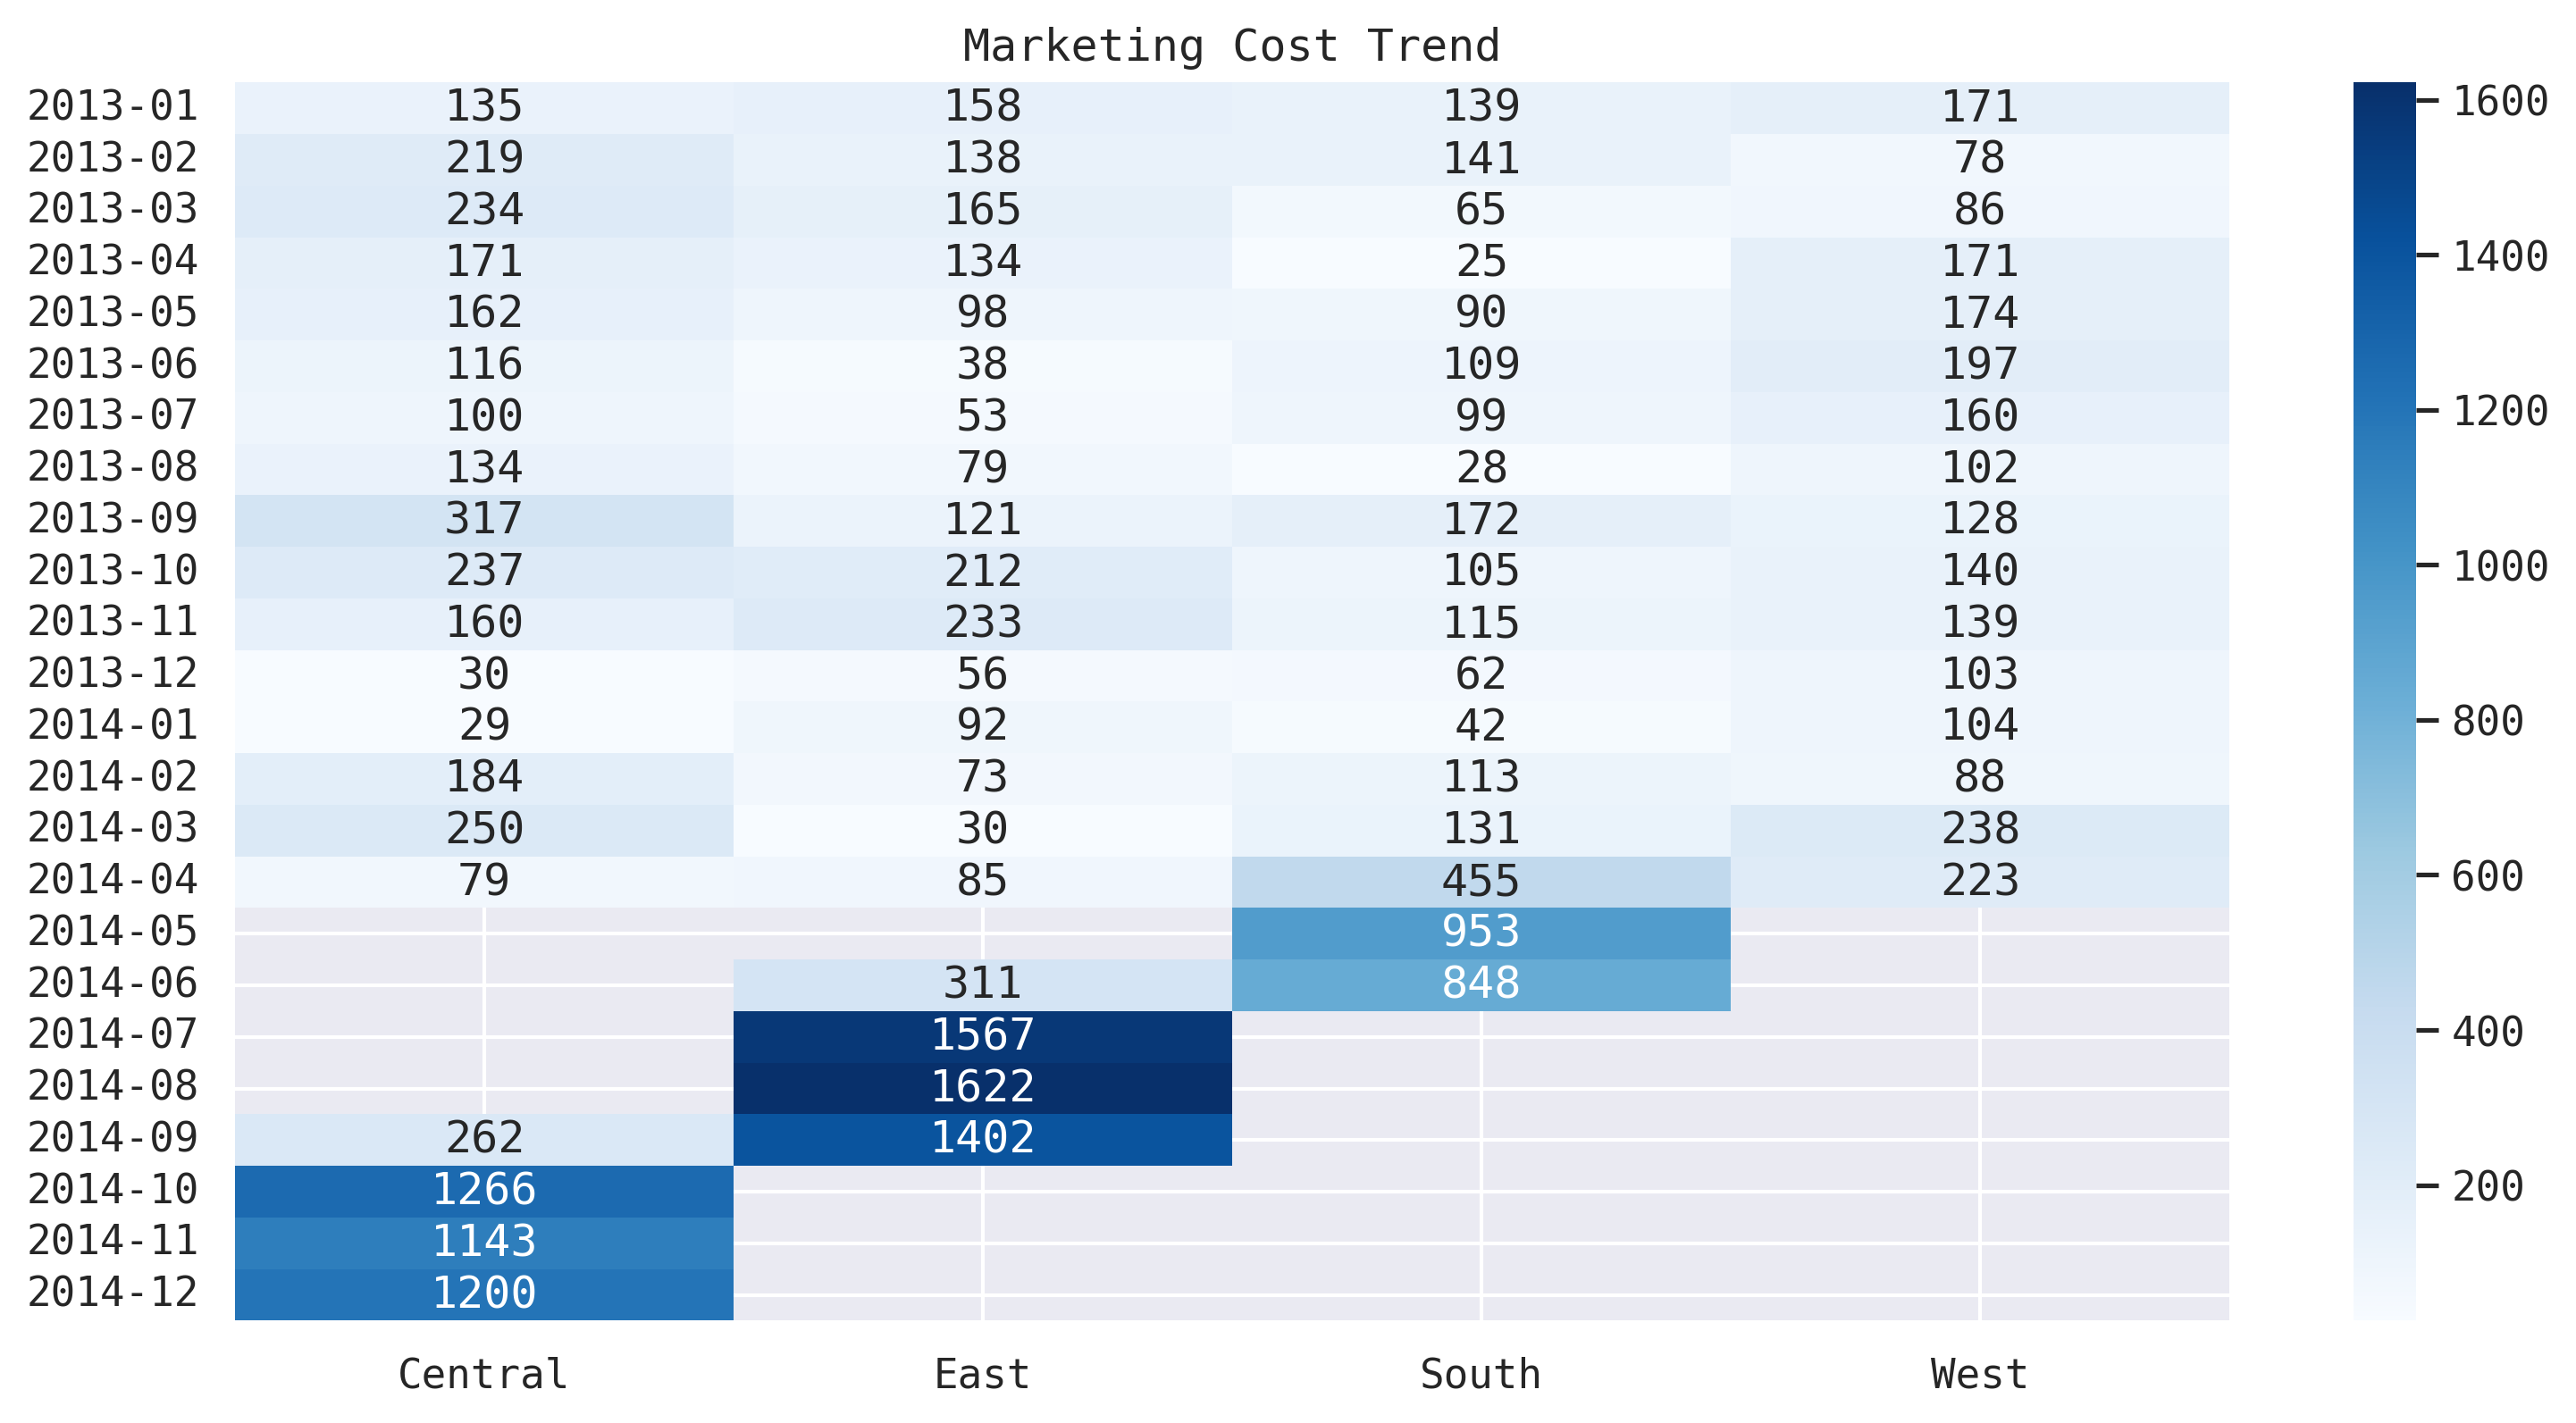

In [23]:
# marketing cost  Trend 
heatmap_plots(data,'month','market','marketing','sum','Marketing Cost Trend')

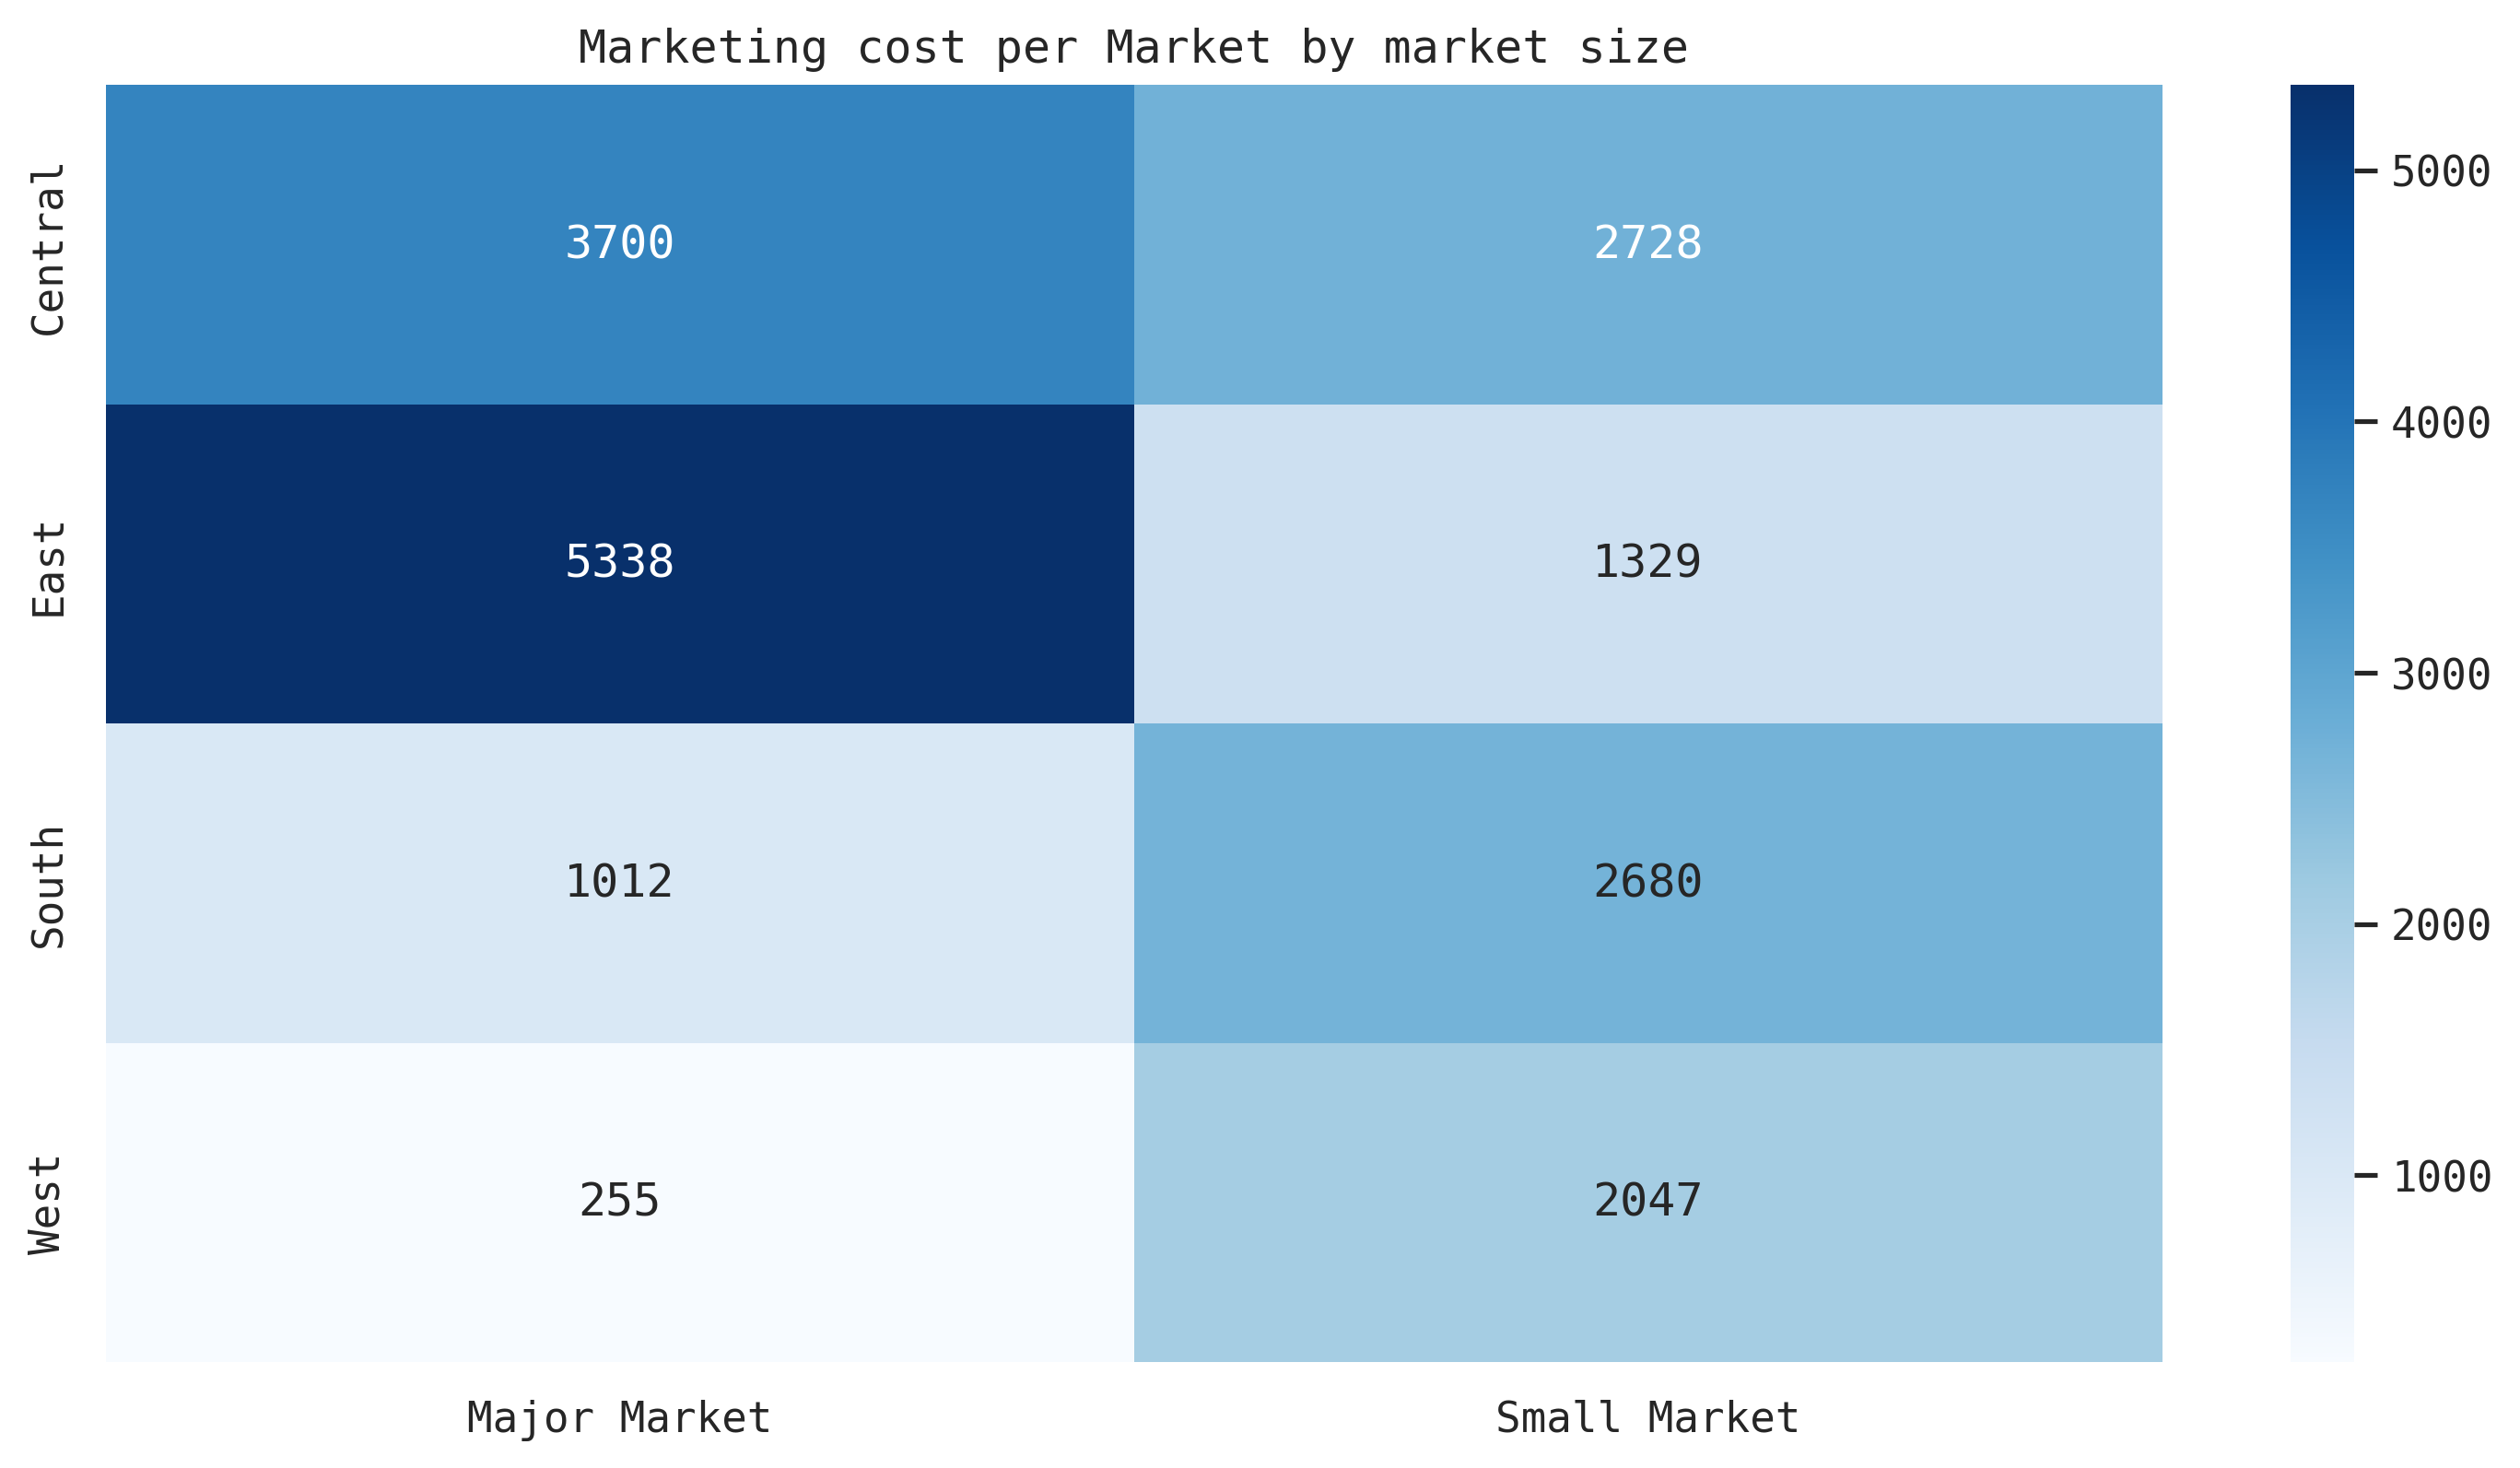

In [24]:
# Marketing cost per market by market size
heatmap_plots(data,'market','market_size','marketing','sum','Marketing cost per Market by market size')

### (4). States-Wise Analysis

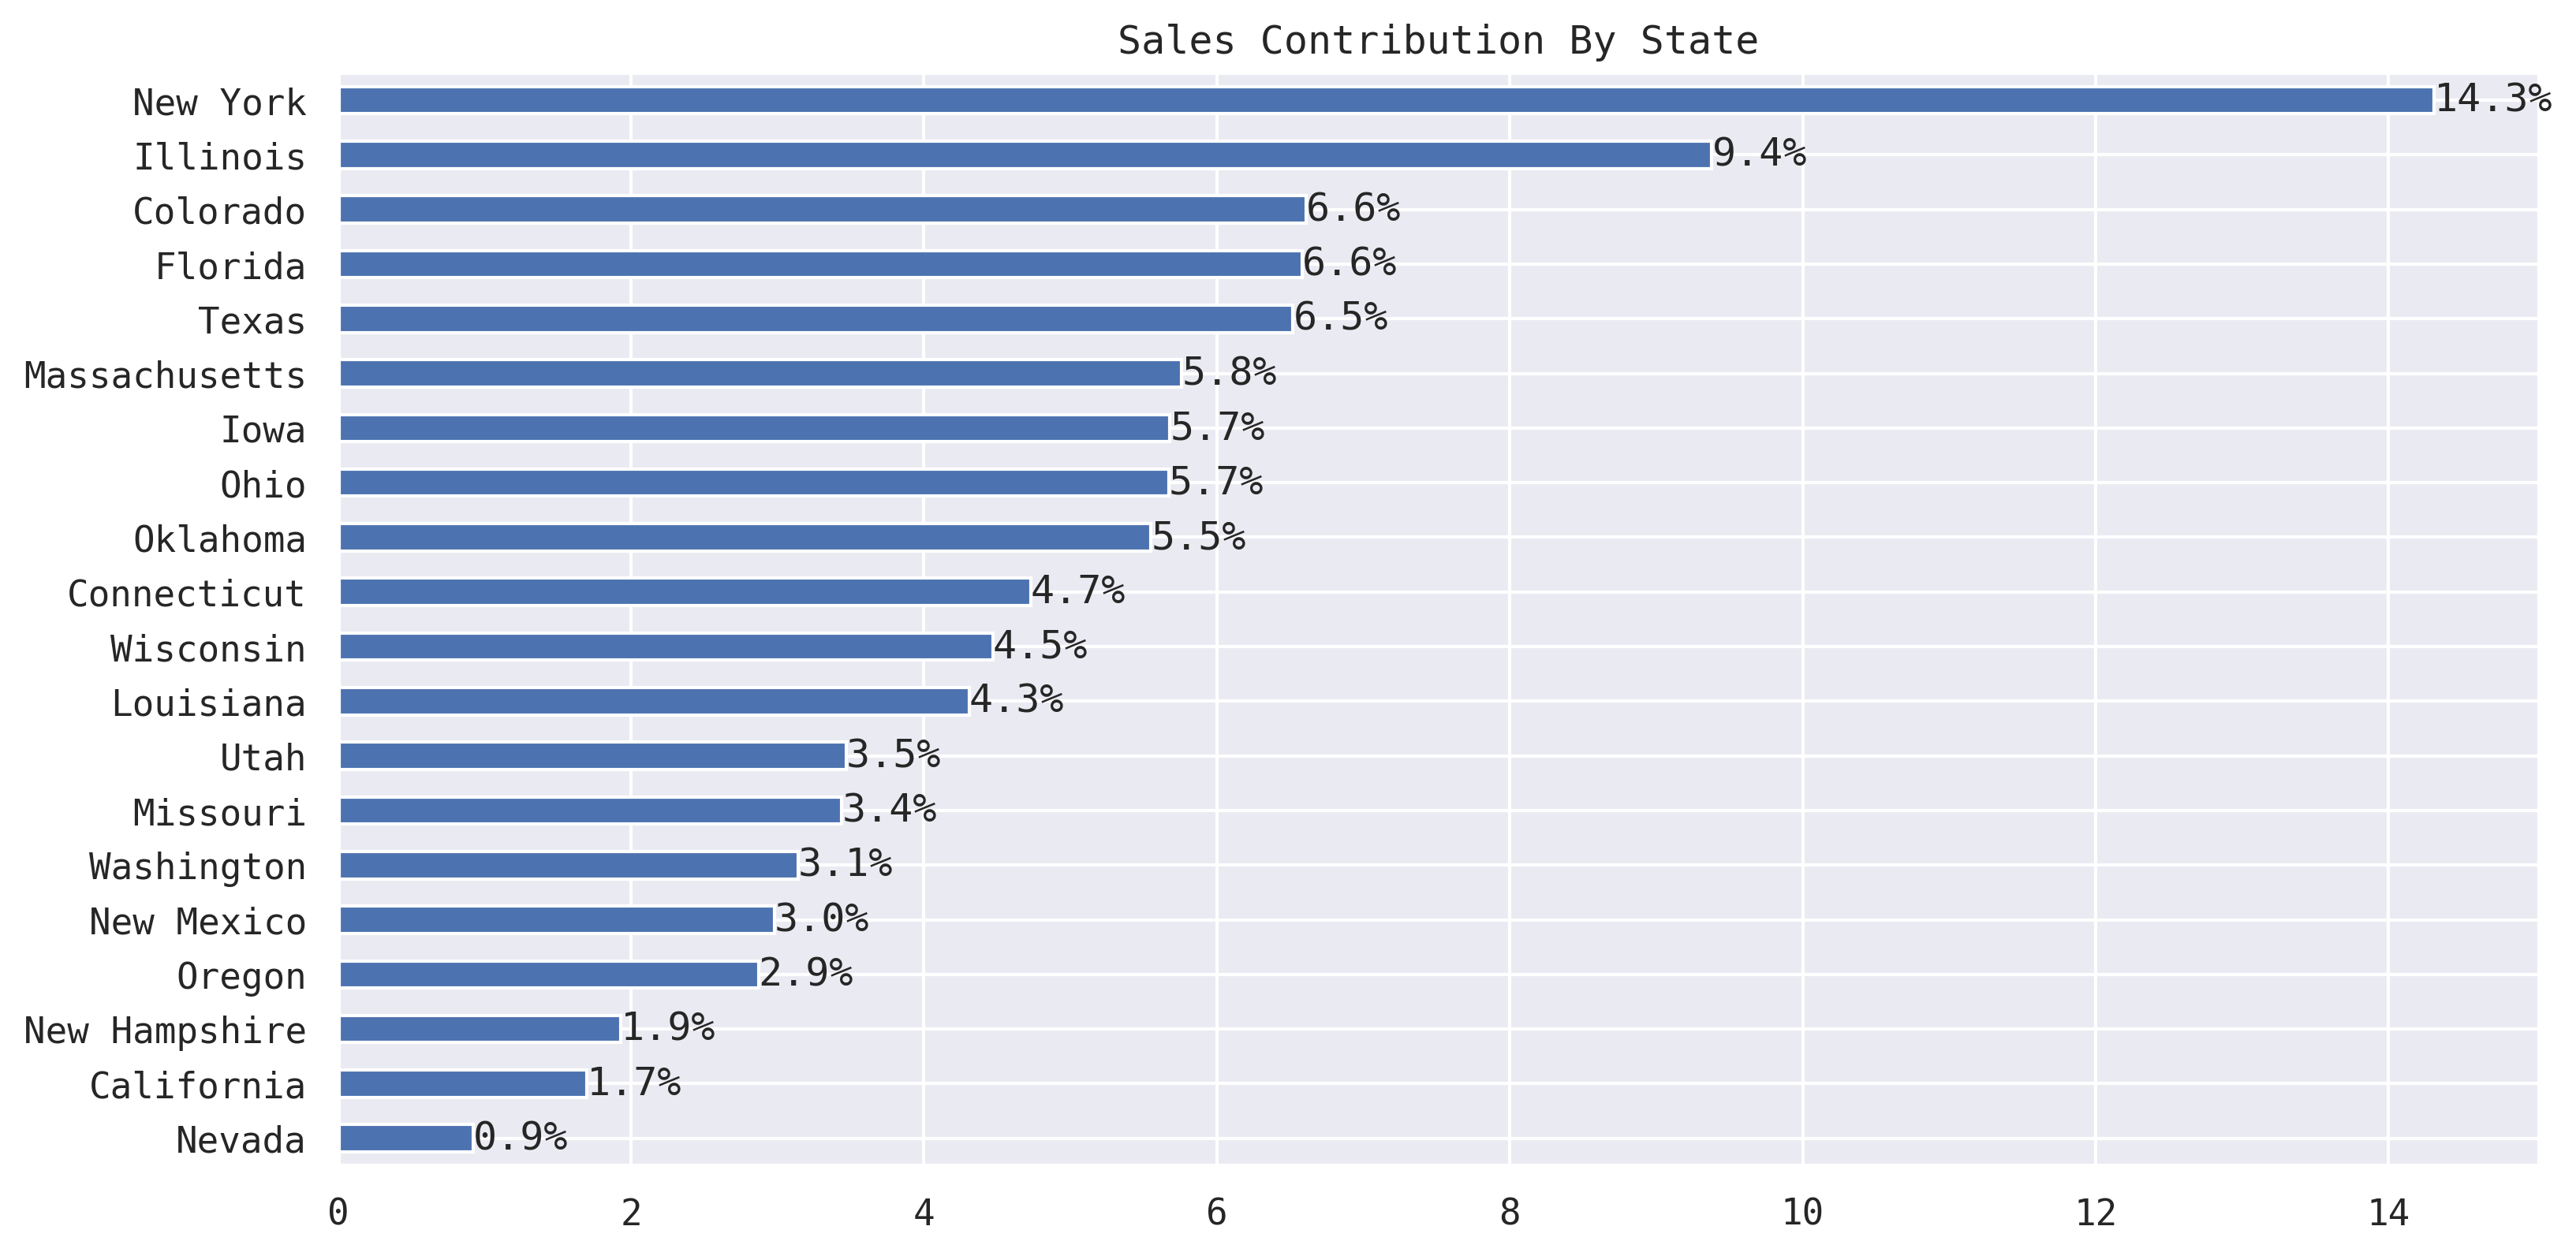

In [25]:
# Saales Contribution by state
horizontal_bar_plots(data,'state','sales','Sales Contribution By State')

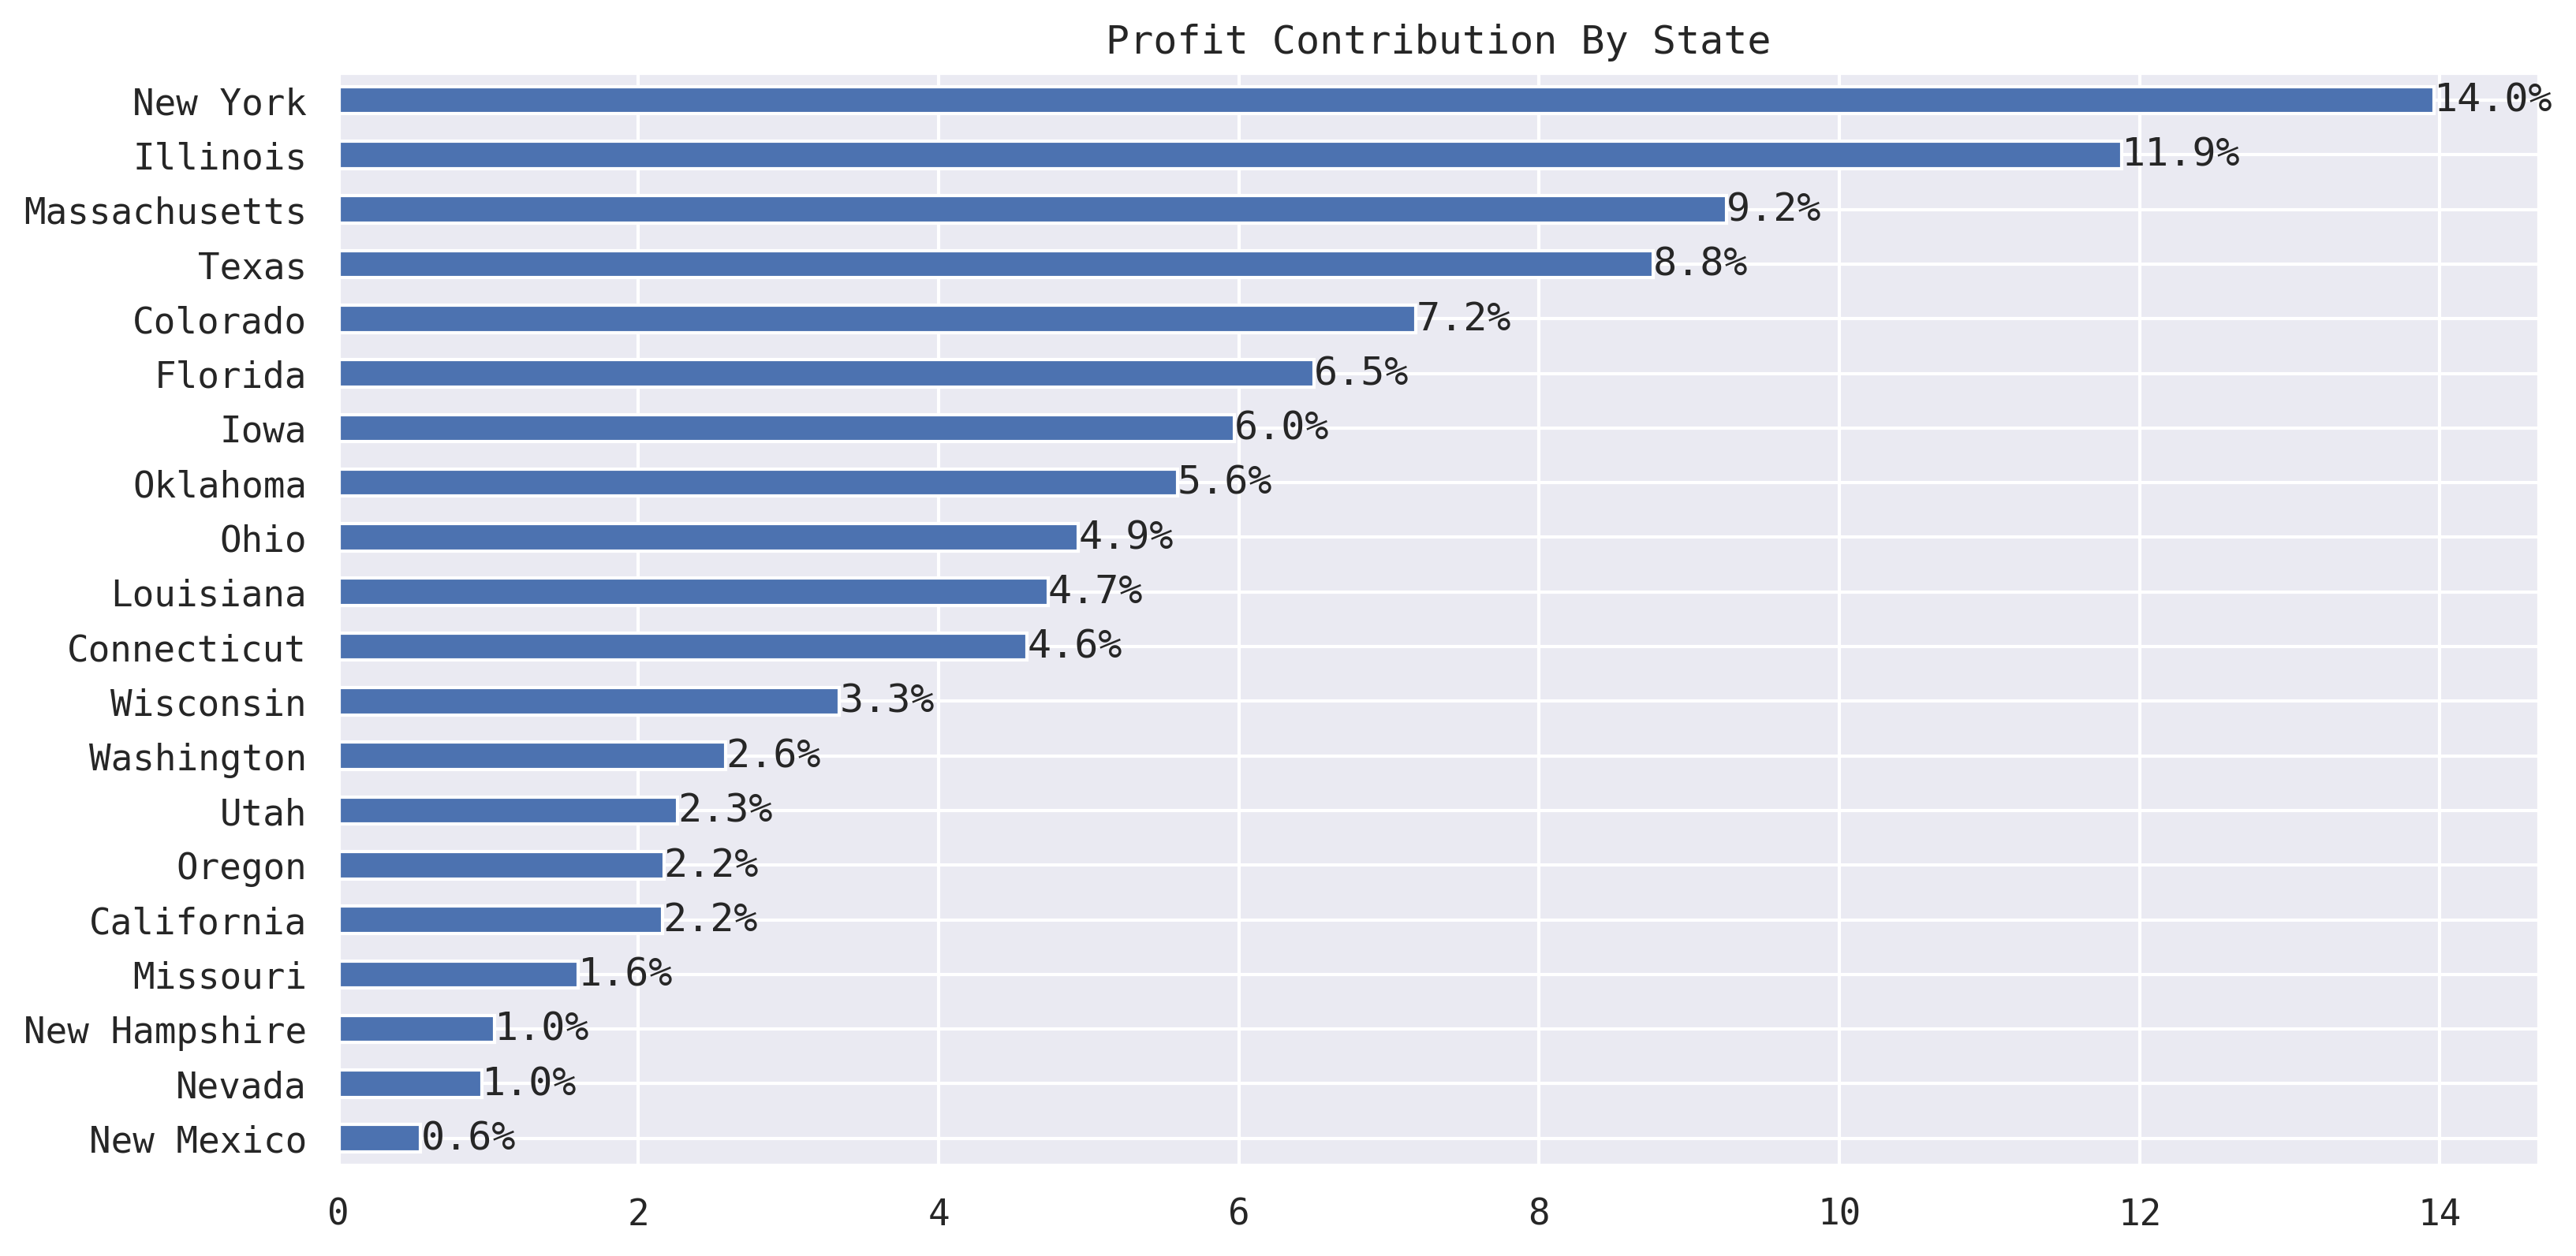

In [26]:
# Profit Contribution by state
horizontal_bar_plots(data,'state','profit','Profit Contribution By State')

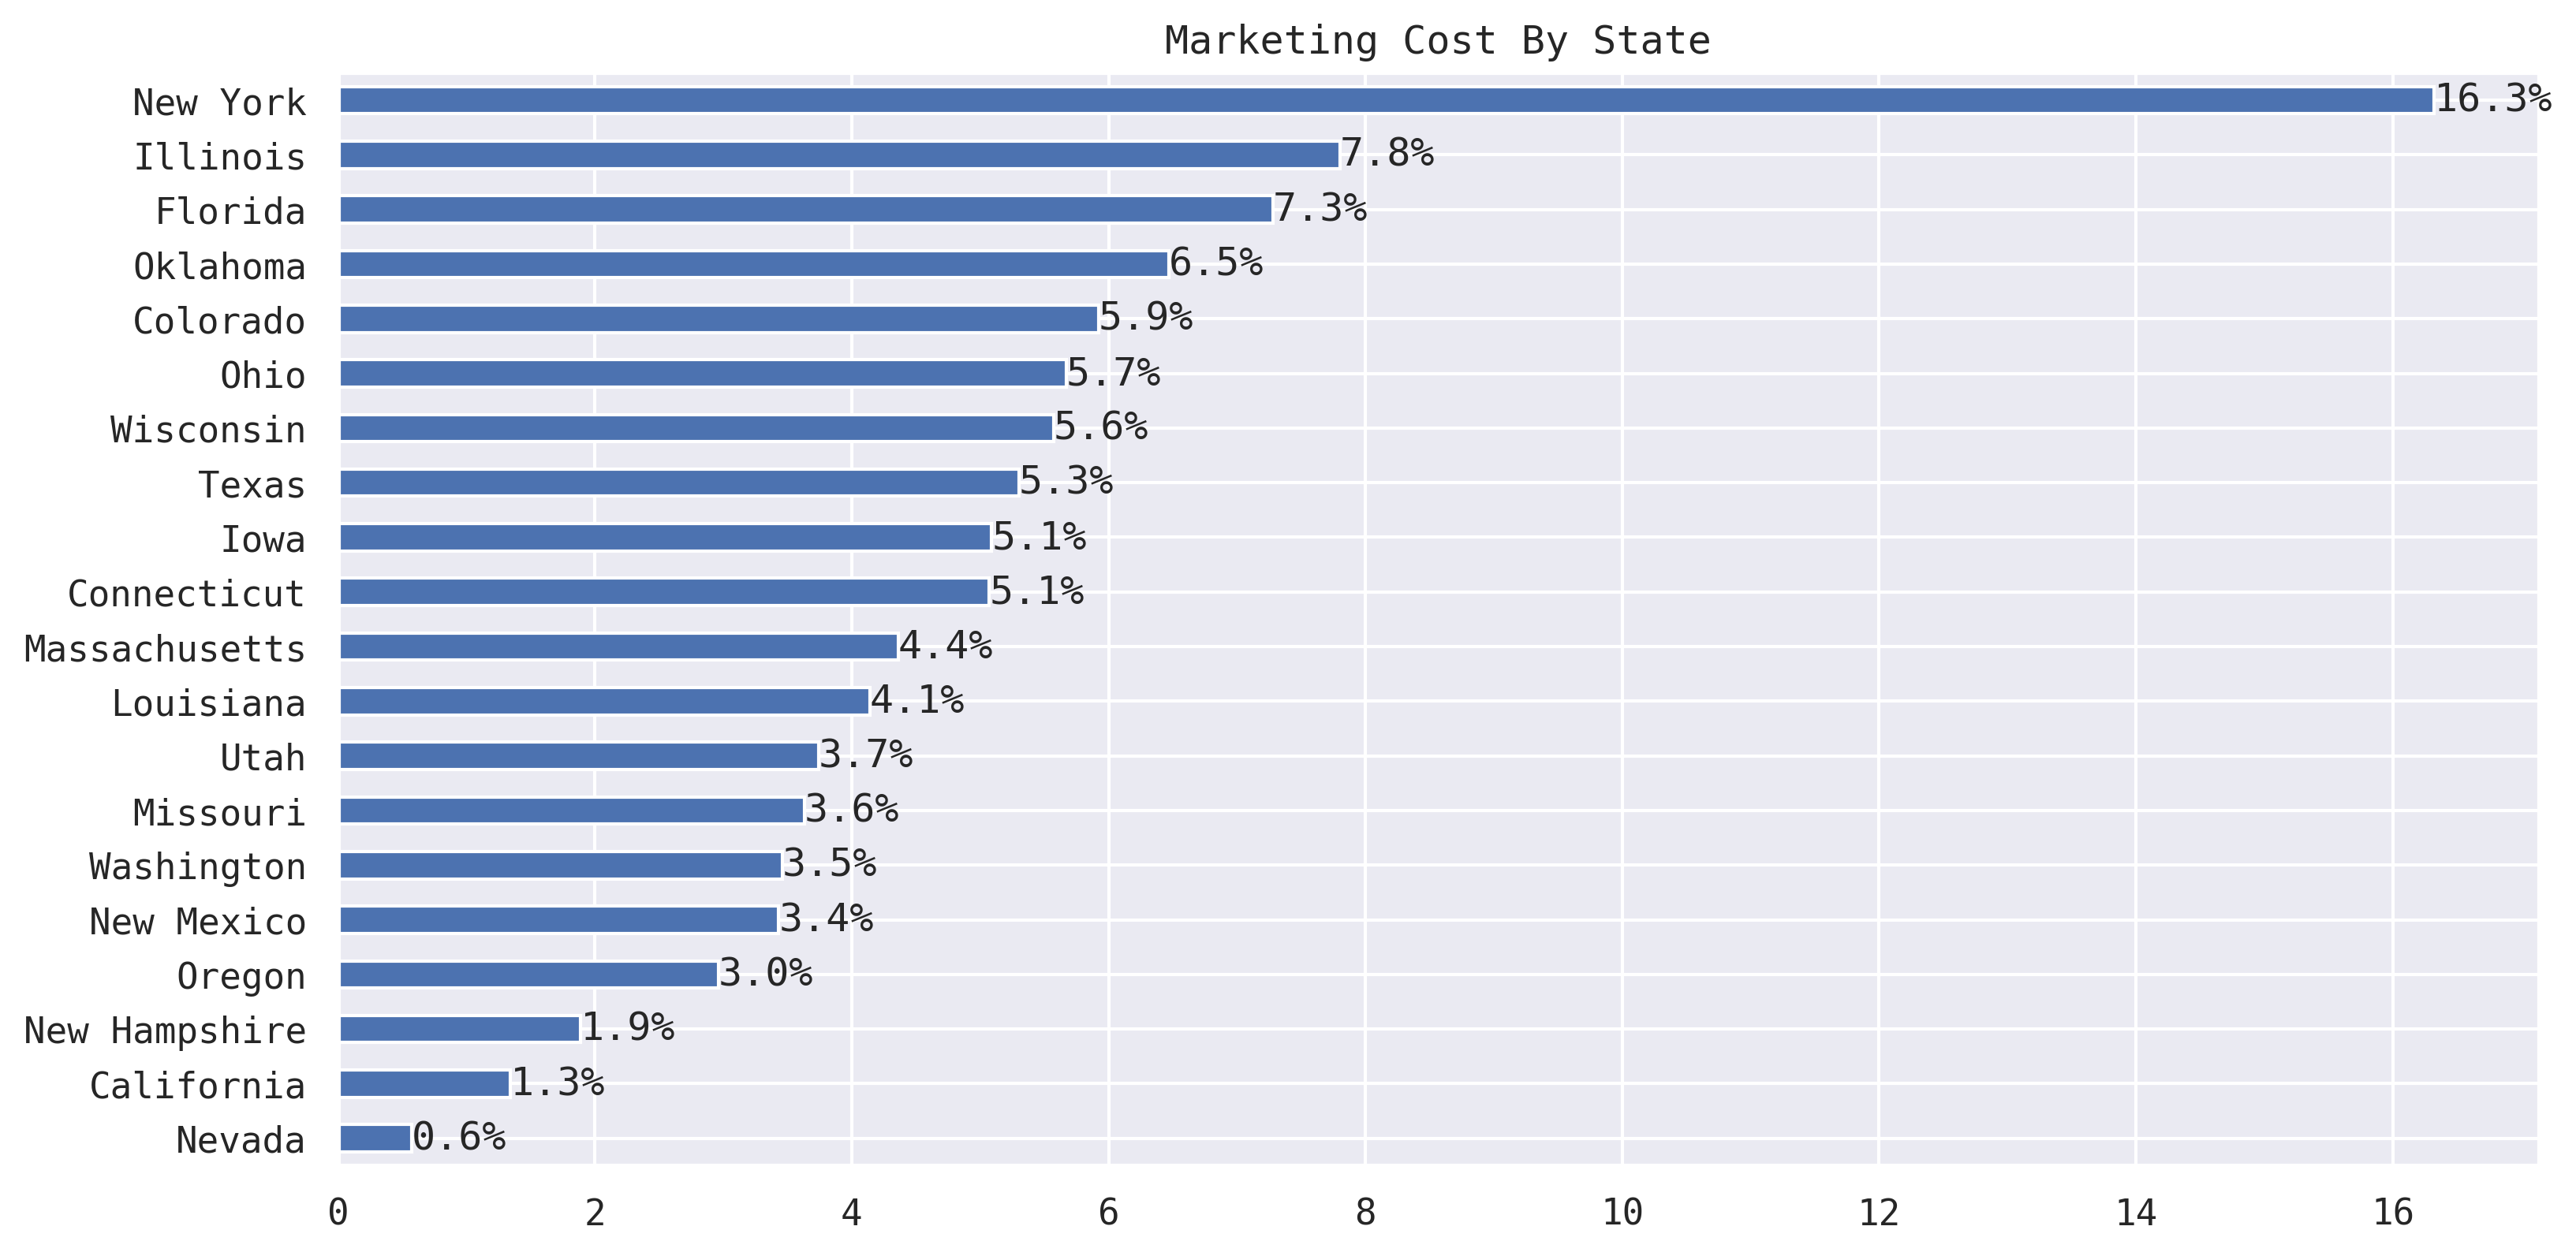

In [27]:
# Marketing cost by state
horizontal_bar_plots(data,'state','marketing','Marketing Cost By State')

### (5). Profit-Target Analysis

In [28]:
def plot_profit_vs_target_difference(data):
    # Group the DataFrame by 'State' and calculate the sum of differences
    grouped = data.groupby('month')[['differencebetweenactualandtargetprofit']].sum()

    # Sort the grouped data in ascending order
    #grouped = grouped.sort_values(by='differencebetweenactualandtargetprofit', ascending=True)

    # Create a bar plot
    ax = grouped.plot(kind='bar', figsize=(12, 6), legend=False)

    # Color bars in red if the difference is negative
    for bar in ax.patches:
        if bar.get_height() < 0:
            bar.set_color('red')

    # Add labels and titles
    plt.xlabel('Month')
    plt.title('Profit-Target Difference By Month')
    plt.xticks(rotation=45);

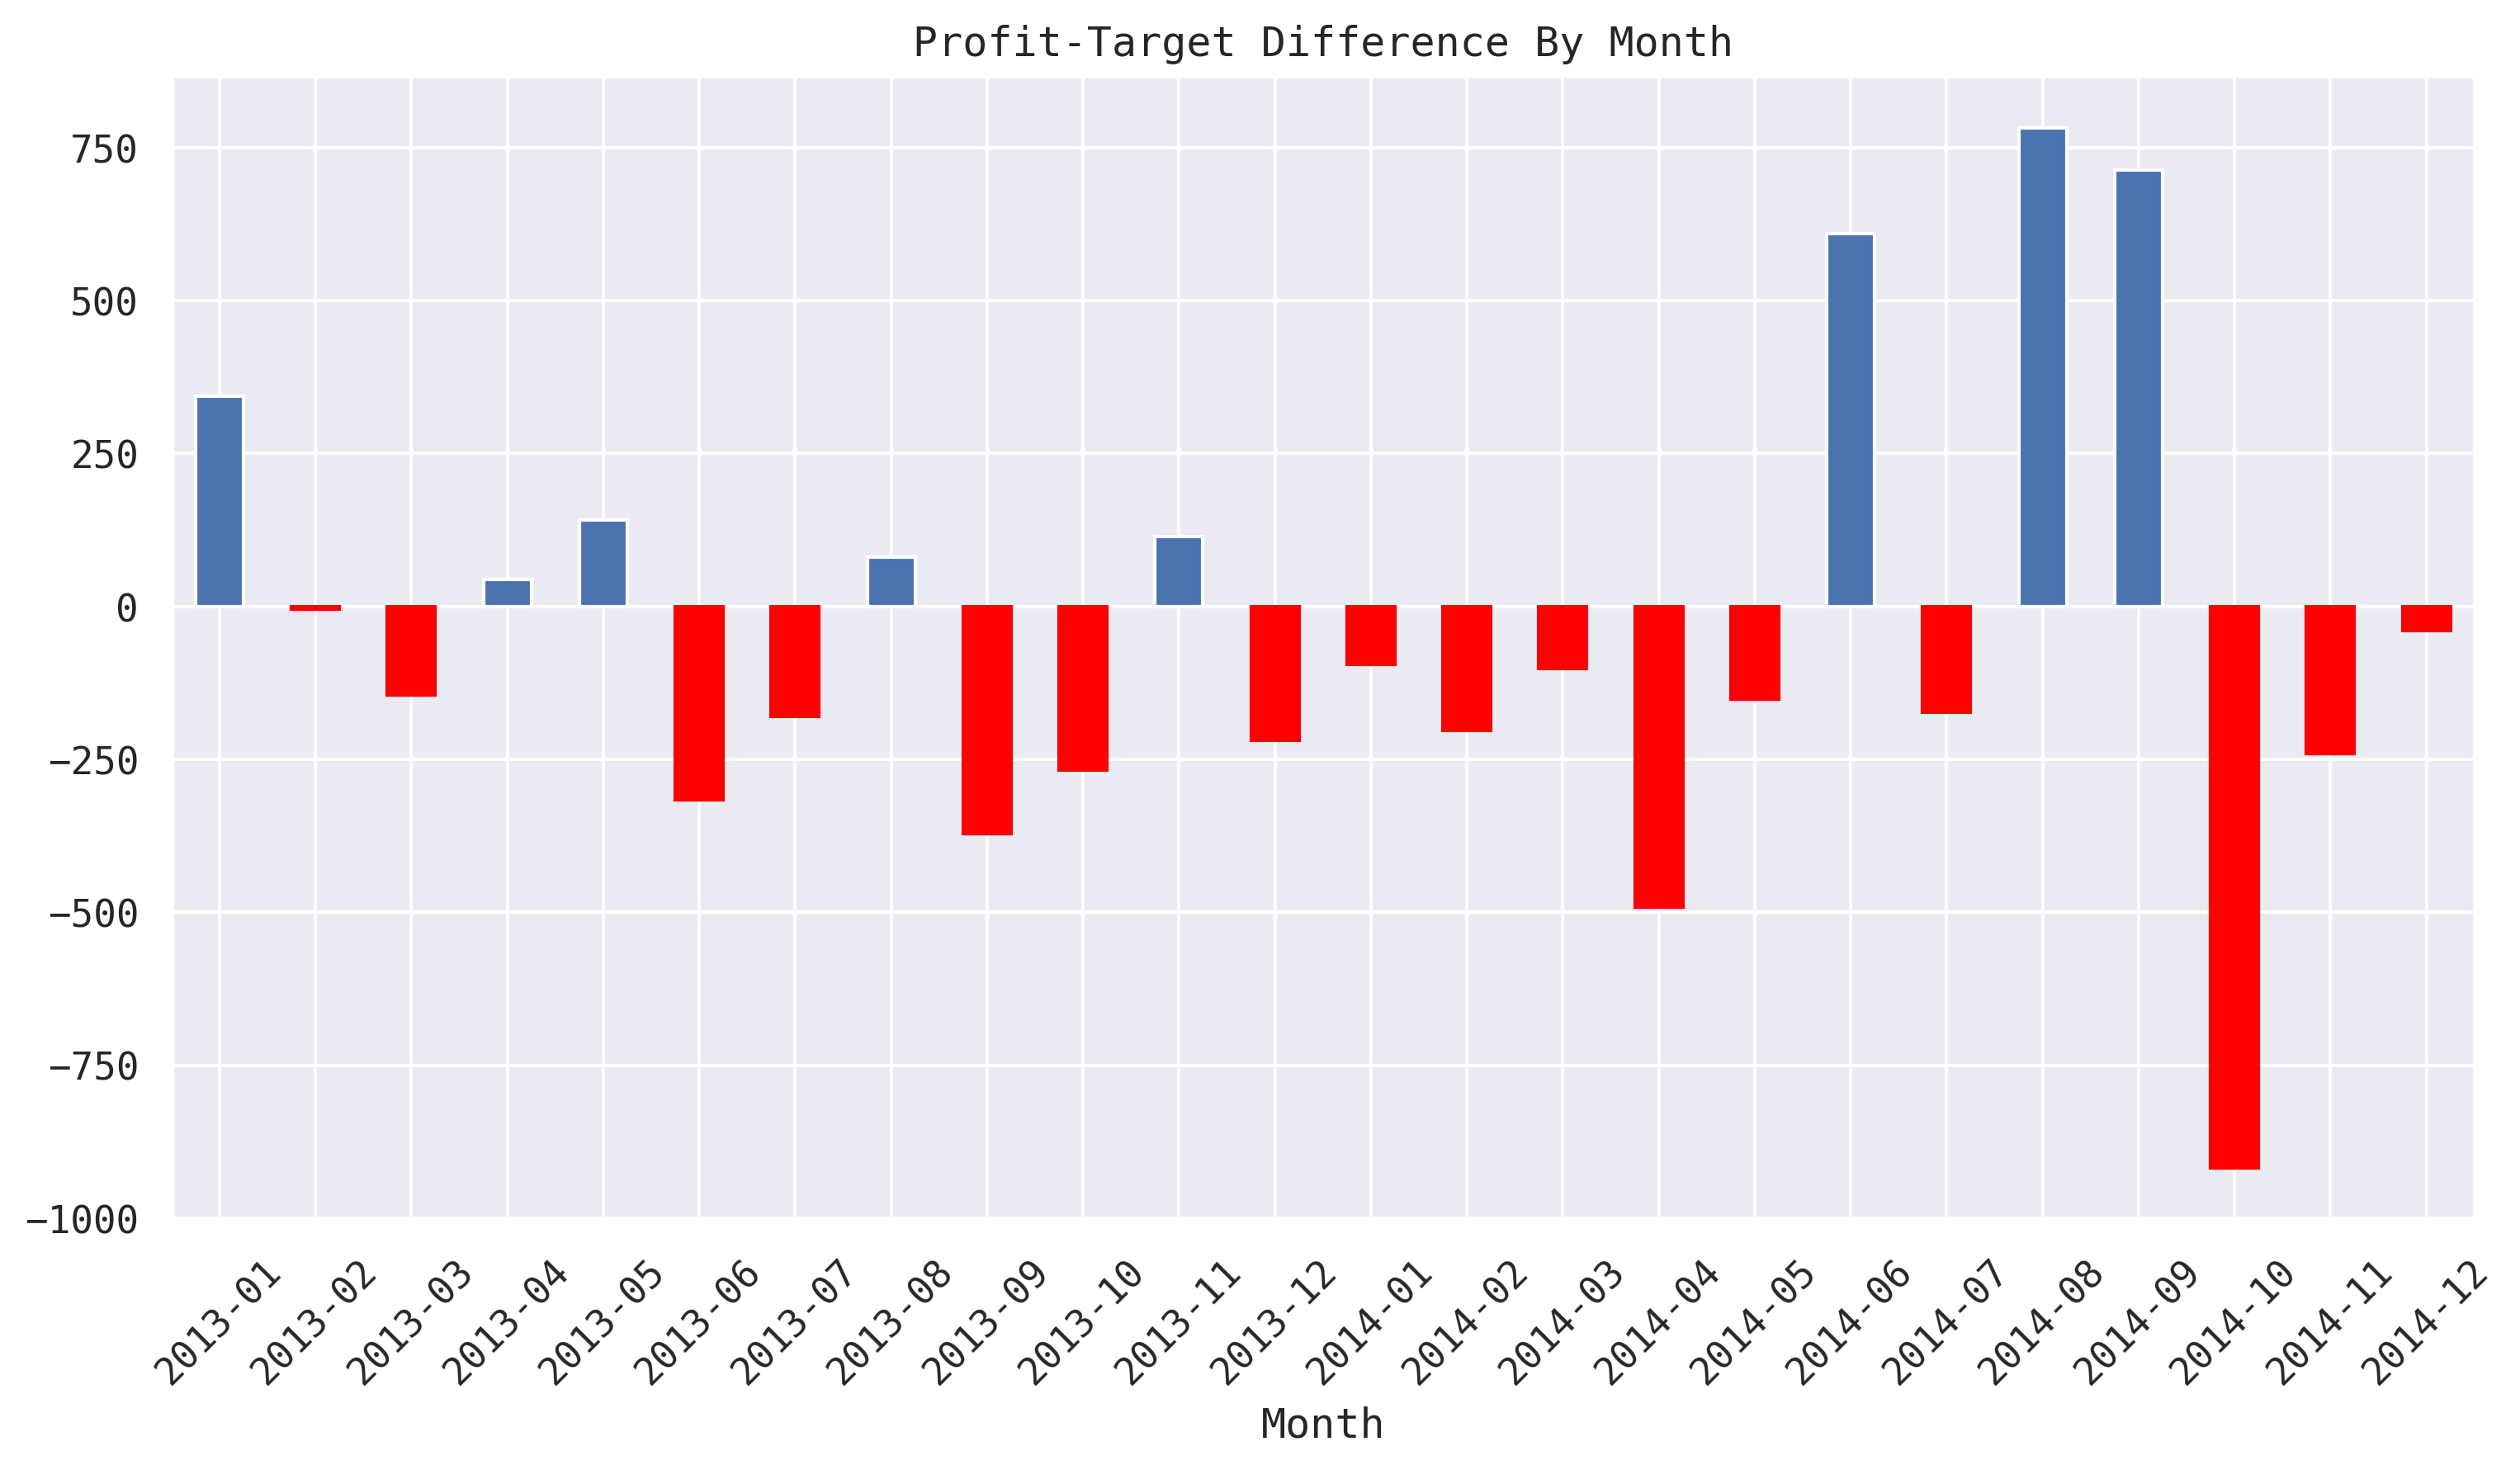

In [29]:
plot_profit_vs_target_difference(data)

## Insights and Recommendations

NOTE: There was no data for the following markets for the indicated months:

 - Central ---> 2014 May to 2014 Aug
 - East ---> 2014 May to June and October through to December
 - West ---> 2014 June to December
 - South ---> 2014 July to December 


### (1). Insights

#### (a). Sales

The total sales was $123,880 and on average it ranges from $87 to $197. From January 2013 to December 2013 the sales values trended horizontally and at the start of the first quarter of 2014 it trended upward to almost end of fourth quarter and dipped towards the start of quarter four of 2014. Central market contributed the most sales by 35.2% of total sales and the West market contributed the least by 12.1%.

#### (b). Profit

The total profit was $39,864 and on average it ranges from $15 to $71. From January 2013 to December 2013 the sales values trended horizontally and at the start of the first quarter of 2014 it trended upward to almost end of fourth quarter and dipped towards the start of quarter four of 2014. Central market contributed the most sales by 35.3% of total sales and the West market contributed the least by 10.1%.

#### (c). Marketing Cost

Market cost Increase with time and the East and Central Markets consume more marketing funds, with the Major market size consuming more marketing finances compared to small market size. 

#### (d). Profit-Target Analysis

66% of the time the business was off the target of profit not even close to breakeven point. 

#### (e). Product

Coffee is the most prefered product category and it generates more sales compared  to oother product types.

### (2). Recommendations

- Reduce the Markets and only focus on two regions; I recommend East and Central.
- Improve marketing Strategies for the small market, whilst ensuring not losing the major market. 

### (3). Further Analysis

- Time series Forecasting.
- Indepth Analysis based on Market segment. 
